<a href="https://colab.research.google.com/github/eyaguirat10/CoWin-Breast-Cancer-Detection/blob/main/Breast_Cancer_Detectionv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Business Understanding

## **Problem Statement**

Breast cancer is one of the most common and life-threatening diseases affecting women worldwide. According to the World Health Organization, it accounts for a significant proportion of cancer-related deaths among women, with **approximately 2.3 million new cases diagnosed each year**. While the highest incidence is usually observed in women aged **40 to 70**, younger women are increasingly being diagnosed, highlighting the need for vigilance across all age groups. Men can also develop breast cancer, though it is much rarer.

Early detection of breast cancer is crucial because survival rates are significantly higher when the disease is identified at an initial stage. However, **late diagnosis remains common**, particularly in regions with limited access to screening programs, diagnostic facilities, or trained specialists. Factors contributing to delayed detection include:
- Socio-economic barriers  
- Lack of awareness about breast health  
- Cultural stigmas  
- Shortages of radiologists or screening centers  

In some areas, women may delay seeking care due to fear, misinformation, or limited healthcare infrastructure — leading to advanced diagnoses when treatment is more difficult and costly.

Breast cancer can manifest in different forms : **ductal carcinoma, lobular carcinoma, and other subtypes** each with distinct characteristics and progression rates. The disease may present **asymptomatically** in its early stages, which is why imaging techniques such as **mammography** are critical for screening. Even with mammograms, subtle signs like **microcalcifications** or small lesions can be easily overlooked, even by experienced radiologists.

This issue is particularly pressing in regions where incidence is high and **medical resources are limited**, such as parts of **North Africa**, the **Middle East**, and **some areas of the United States**, where datasets like **CBIS-DDSM** and **MIAS** have been collected. These datasets demonstrate the variability in breast tissue density and lesion appearance, increasing the challenge of accurate detection.

## Stakeholders Affected

- **Doctors / Radiologists**: Responsible for interpreting mammograms and providing medical decisions. Face diagnostic complexity, heavy workloads, and pressure to avoid errors.
- **Hospitals and Clinics**: Handle screening, treatment, and patient management. Diagnostic support tools can improve outcomes and reduce costs.
- **Public Health Organizations**: Lead screening campaigns and healthcare policy. Better tools improve allocation of resources and reduce mortality.
- **Researchers**: Use datasets and AI models to develop new diagnostic tools and improve early detection performance.


Given these challenges, there is a **critical need for computer-assisted systems** that help healthcare professionals detect breast cancer early, accurately, and efficiently.

Such systems can:
- Generate **predictions** and **personalized recommendations** based on mammography or clinical data  
- Improve clinical **decision-making** while minimizing risk to patients  
- Ensure **role-based access** to data: doctors get detailed results, patients receive **validated, understandable recommendations**  



In summary, breast cancer is a complex issue involving **medical, social, and economic factors**. Our project integrates **artificial intelligence** into the diagnostic workflow to:
- **Enhance early detection**
- **Reduce late diagnoses**
- **Provide safe, actionable guidance for patients**

Ultimately, the project aims to assist all stakeholders and improve breast cancer management outcomes.


---

## **Business Objective (BO)**

1.  ### Determine whether a tumor is malignant or benign based on morphological data extracted from breast tissue imagery, in order to assist clinicians in initial diagnosis.


2.  ### Characterize and differentiate malignant tumor profiles into distinct groups based on their severity or aggressiveness, enabling more targeted follow-up strategies.
   
3.  ### Propose individualized recommendations for new patients by comparing their physiological and biochemical profiles to previously identified cancer risk patterns.  

---

## **Data Science Objectives (DSO)**

1.  ### Develop a classification model to distinguish benign and malignant tumors using WDBC morphological features and evaluate performance with standard metrics.


2.  ### Cluster malignant tumor samples to identify natural groupings and define clinically relevant subtypes.
   
3.  ### Implement a recommendation system that maps new patient profiles (from the Coimbra dataset) to known cluster patterns and delivers personalized insights based on proximity to known cancer risk profiles.

### DSO1: Predict the diagnosis type — **M (Malignant)** or **B (Benign)**

| Modèles             | Liste des variables | Liste des paramètres |
|---------------------|---------------------|-----------------------|
| GRU SVM             |                     |                       |
| SVM                 |                     |                       |
| Linear Regression   |                     |                       |
| MLP                 |                     |                       |
| Nearest Neighbor    |                     |                       |
| Softmax Regression  |                     |                       |
| XGBOOST (new)       |                     |                       |
| Random Forest (new) |                     |                       |


### DSO2: Cluster diagnosis patterns

| Modèles                | Liste des variables | Liste des paramètres |
|------------------------|---------------------|-----------------------|
| Kmeans                 |                     |                       |
| DBSCAN                 |                     |                       |
| Gaussian Mixture Model |                     |                       |


### DSO3: Cluster-based recommendation system

| Modèles               | Liste des variables | Liste des paramètres |
|------------------------|---------------------|-----------------------|
| KNeighborsClassifier   |                     |                       |
| DecisionTreeClassifier |                     |                       |
| Apriori                |                     |                       |



# II. Data Understanding

##II.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

**Dataset Description – Wisconsin Diagnostic Breast Cancer (WDBC)**

The dataset is the **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset.  
It contains measurements computed from **digitized images of a fine needle aspirate (FNA)** of a breast mass.  

The dataset consists of **569 patient records**, each described by **30 numerical features**, along with a  
diagnosis label indicating whether the tumor is **benign** or **malignant**.  


**Structure of the Dataset**

- **569 samples (patients)**  
- **30 numerical features**  
- **1 target variable (`diagnosis`)**  
- Additional columns

 **Organization of Features**

Each of the 10 biological characteristics is recorded in **three variants**, giving 30 features total:

1. **Mean value** (`_mean`)  
2. **Standard error** (`_se`)  
3. **Worst value** (`_worst`) – mean of the three largest values  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Dataset_ML/data.csv"
df = pd.read_csv(path)


In [ ]:
print(f"Dataset Shape: {df.shape}")
print(f"Number of instances: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")


Dataset Shape: (569, 33)
Number of instances: 569
Number of features: 33


In [ ]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]



*   **Count (569 for all features except 'Unnamed: 32')**


*   **Mean**:The mean provide a central point around which the data is distributed.The average value for each feature. For instance, the `radius_mean` is approximately 14.13, and `texture_mean` is around 19.29.


*   **Standard Deviation (std)**: Measures the amount of variation of a set of values. A higher standard deviation indicates that the data points are spread out over a wider range of values. For example, `area_mean` has a standard deviation of 351.91, suggesting a significant spread in tumor sizes.


*   **Min and Max**: These values represent the smallest and largest observations for each feature. The wide range between min and max for many features (`area_mean` from 143.5 to 2501.0, `perimeter_mean` from 43.79 to 188.50) further highlights the variability within the dataset.


*   **25th, 50th (Median), and 75th Percentiles (Q1, Q2, Q3)**: For several features, there's a noticeable difference between the mean and the median (50th percentile). For example, `area_mean` has a mean of ~654.89 and a median of 551.10.



In [ ]:
print("\nCOLUMN STRUCTURE:")
print(df.info())



COLUMN STRUCTURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimet

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)
total_missing = missing_values.sum()
print(f"Missing Values: {total_missing} ({total_missing/df.size*100:.4f}% of total data)")

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Unnamed: 32 column**  --> This column contains only NaN values and should be removed from the dataset.

In [ ]:
df.diagnosis.unique()


array(['M', 'B'], dtype=object)

Text(0.5, 1.0, 'Class Distribution')

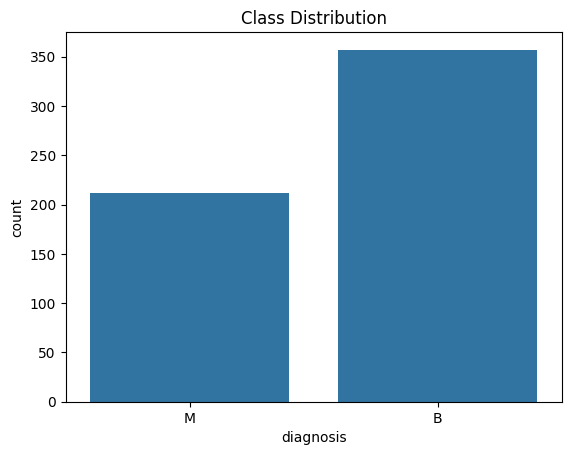

In [ ]:
sns.countplot(x=df['diagnosis'])
plt.title("Class Distribution")


About 62% benign vs 38% malignant --> **Moderate imbalance**;
In medical context, imbalance reflects real-world prevalence.

In [ ]:
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0


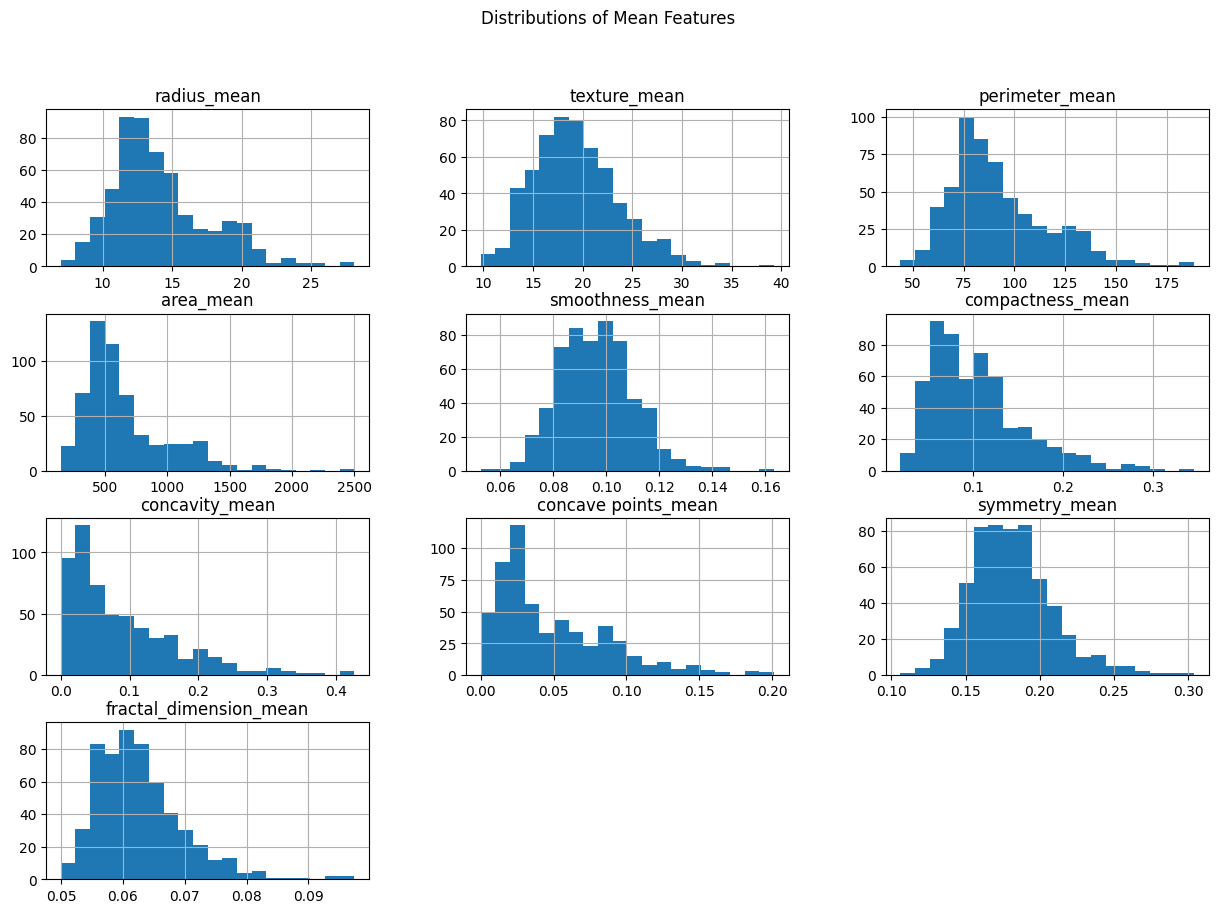

In [ ]:
# Select mean features for simplicity (10 core ones)
mean_features = [col for col in df.columns if '_mean' in col]

# Histograms
df[mean_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distributions of Mean Features')
plt.show()



*   **Shape:**
    *   **Symmetric (Bell-shaped):** Indicates that data points are evenly distributed around the mean.

    *   **Skewed:** If a distribution is skewed,it means the data is concentrated on one side, with a tail extending to the other.
    *   **Bimodal/Multimodal:** If there are two or more peaks, it suggests distinct subgroups within the data.

*   **Central Tendency (Mean/Median):** The peak of the histogram gives an idea of the most frequent values.

*   **Spread (Variance/Standard Deviation):** The width of the histogram indicates the spread or variability of the data. A wider histogram means greater variability.

*   **Outliers:** Long tails or isolated bars far from the main distribution might indicate the presence of outliers.






**Interpretation of Mean Feature Distributions by Predictor Strength**


*   **Strong predictors (high skew, large malignant outliers):**
    *   `area_mean`
    *   `radius_mean`
    *   `perimeter_mean`
    *   `concavity_mean`
    *   `concave points_mean`
    *   `compactness_mean`
    


*   **Moderate predictors (normal-ish distribution, moderate spread):**
    *   `symmetry_mean`
    *   `texture_mean`
    


*   **Weak predictors (low spread, very narrow distributions):**
    *   `fractal_dimension_mean`
    *   `smoothness_mean`
    


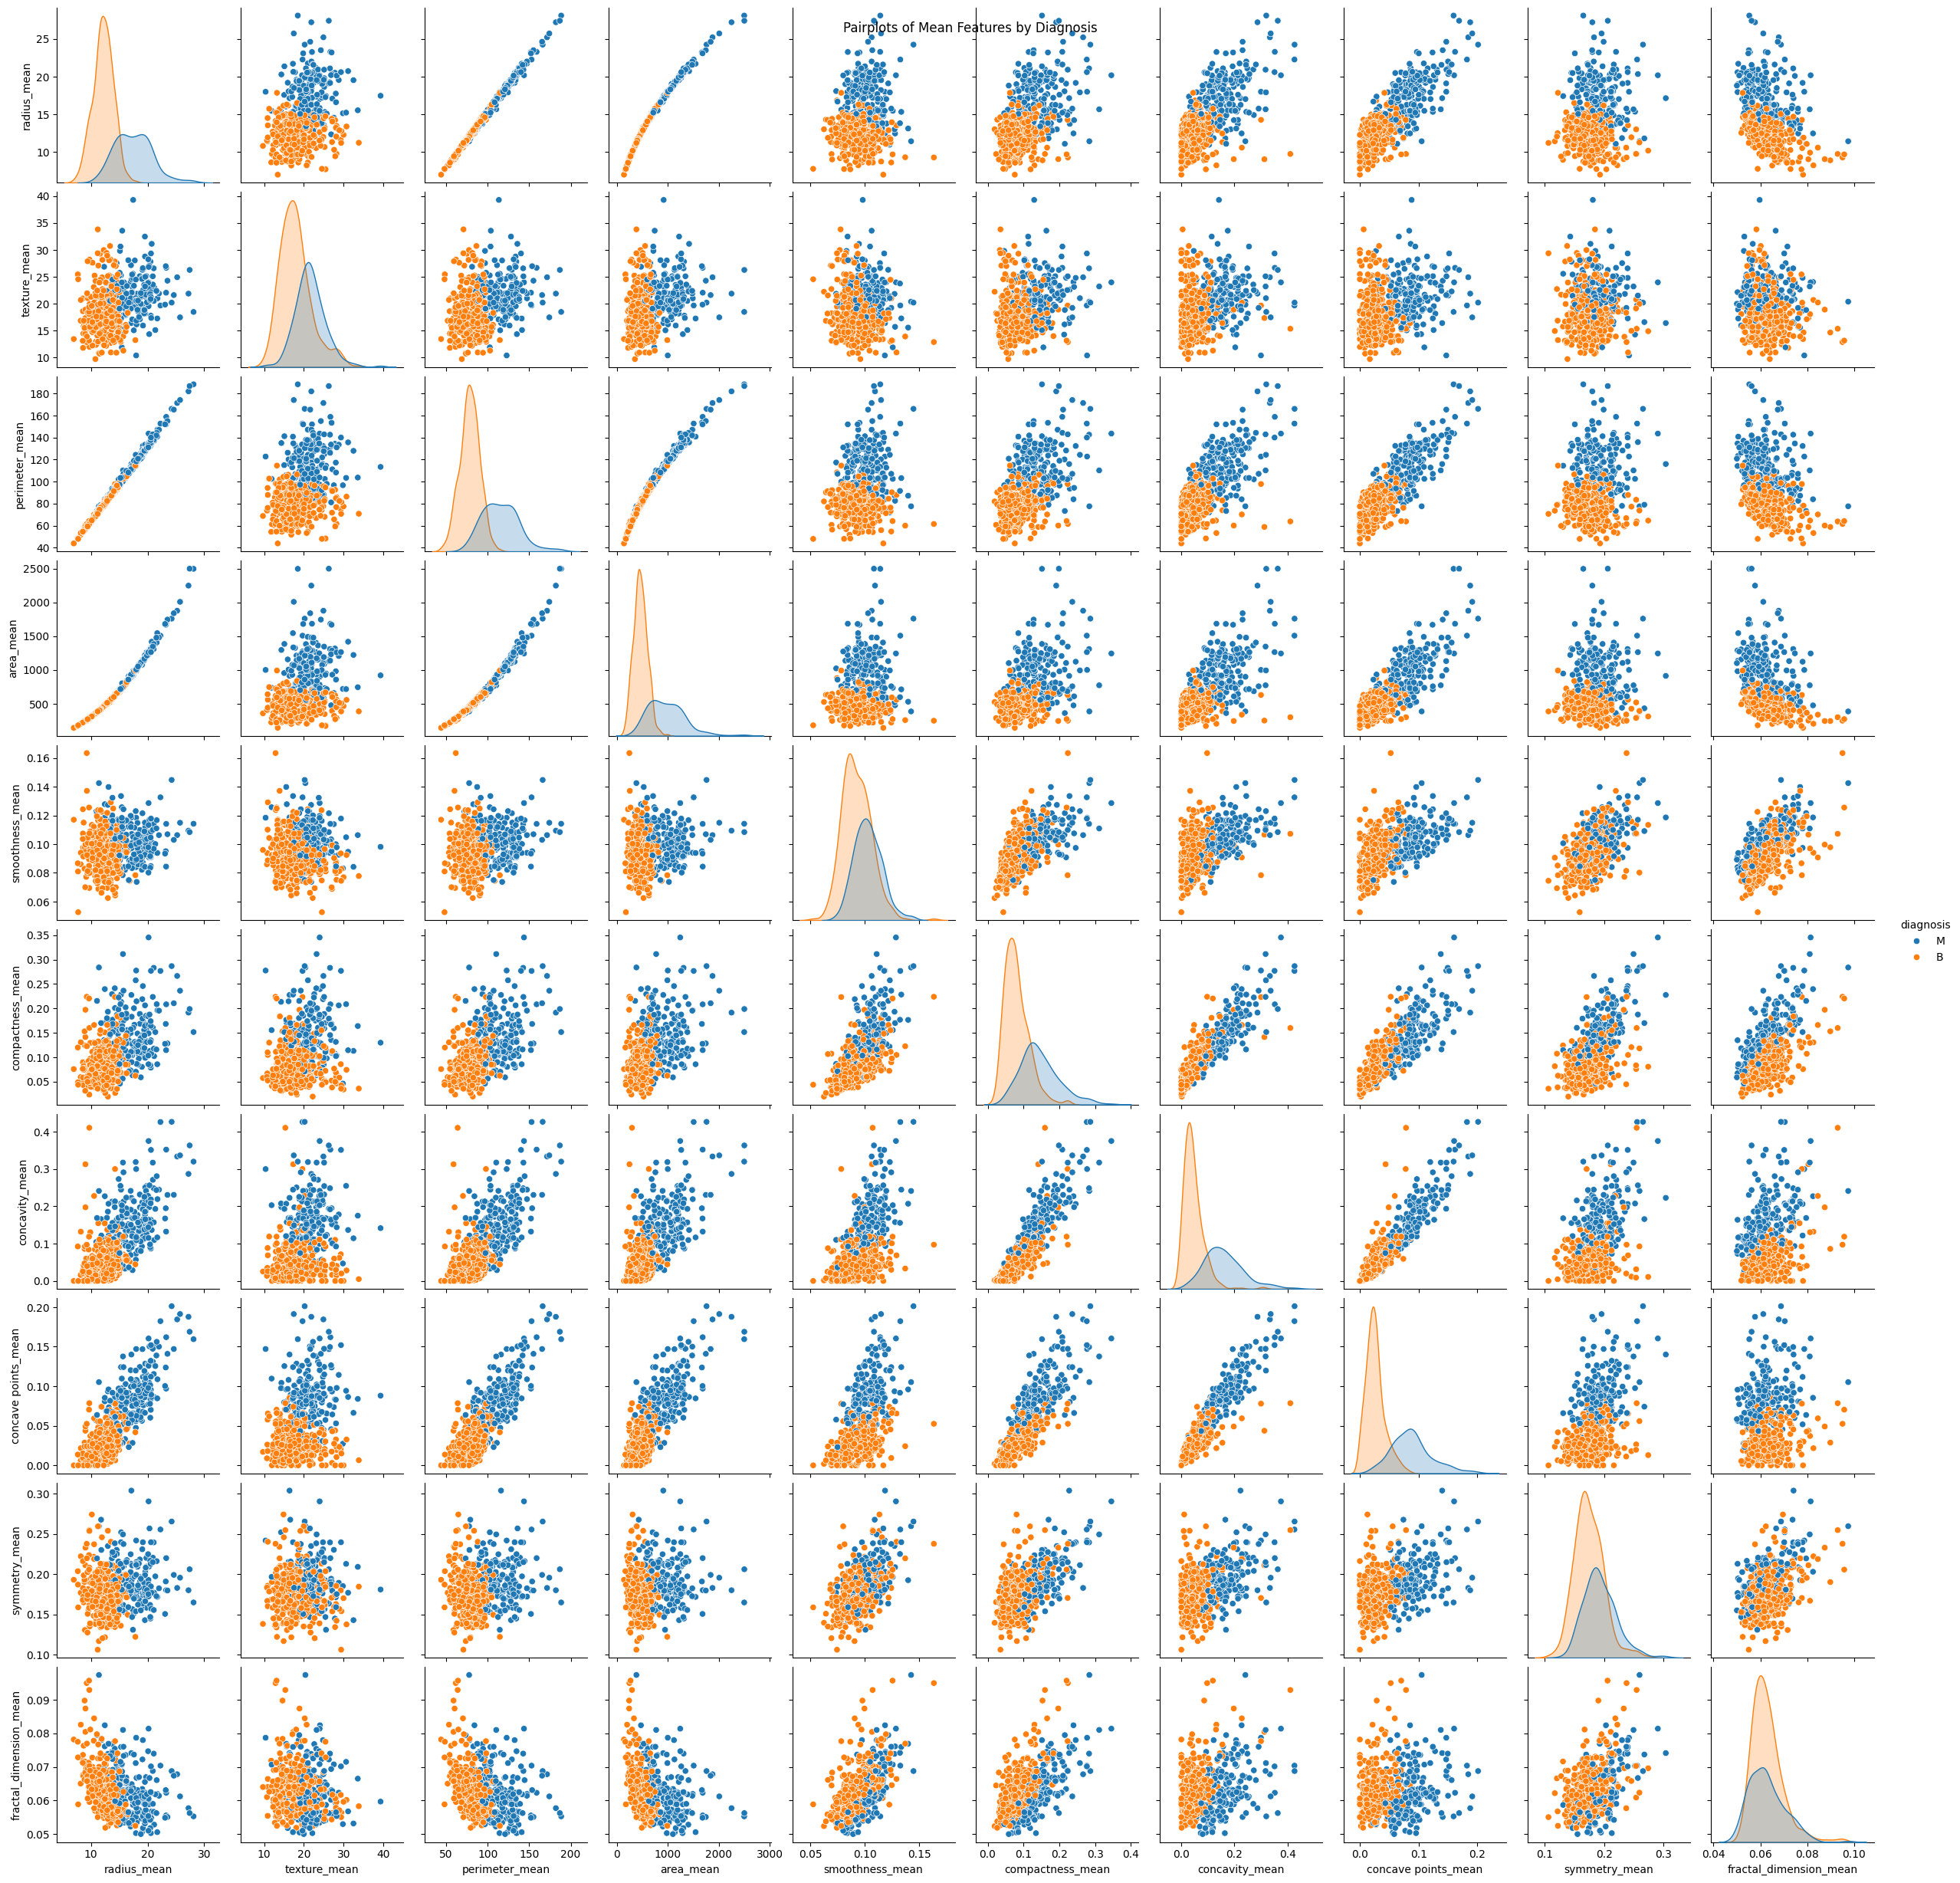

In [ ]:
# Pairplot on a subset to avoid overload (mean features + diagnosis)
sns.pairplot(df[mean_features + ['diagnosis']], hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplots of Mean Features by Diagnosis')
plt.show()

**Diagonal Plots → Distribution differences (single feature separation)**

On the diagonals,Kernel Density Estimate (KDE) curves for each feature split by class (`diagnosis`).

**What we observe:**

*   For `radius_mean`, `perimeter_mean`, `area_mean`, `concavity_mean`, `concave points_mean`, `compactness_mean`:
    *   The blue (Malignant) and orange (Benign) curves are clearly separated.
    *  **These features individually separate malignant from benign tumors very well.**

*   For `symmetry_mean` and `smoothness_mean`:
    *   The curves overlap more, meaning weaker individual discrimination.

*   For `fractal_dimension_mean`:
    *   The curves almost overlap → weakest individual predictor.


---> Size and irregularity features are strong markers of malignancy.Smoothness and fractal dimension are not.



**Off-Diagonal Plots → Scatter plots (pairwise interactions)**

**Strong linear patterns (highly correlated pairs)**

We see almost perfect linear relationship (blue + orange):

*   `radius_mean` vs `perimeter_mean`
*   `radius_mean` vs `area_mean`
*   `area_mean` vs `perimeter_mean`


--> These features are highly redundant and measure the same underlying concept:


*  **Nuclear size** This is why PCA (Principal Component Analysis) often compresses these features into a single component.

**Class separation in 2D**

Look at scatter plots:

*   Malignant (blue) cluster in the upper right corner.
*   Benign (orange) cluster in the lower left.

This appears especially clearly in:

*   `radius_mean` vs `area_mean`
*   `concavity_mean` vs `concave points_mean`
*   `perimeter_mean` vs `compactness_mean`

---> Malignant tumors have larger, more concave, more compact nuclei.Benign tumors have smaller, smoother, symmetric nuclei.




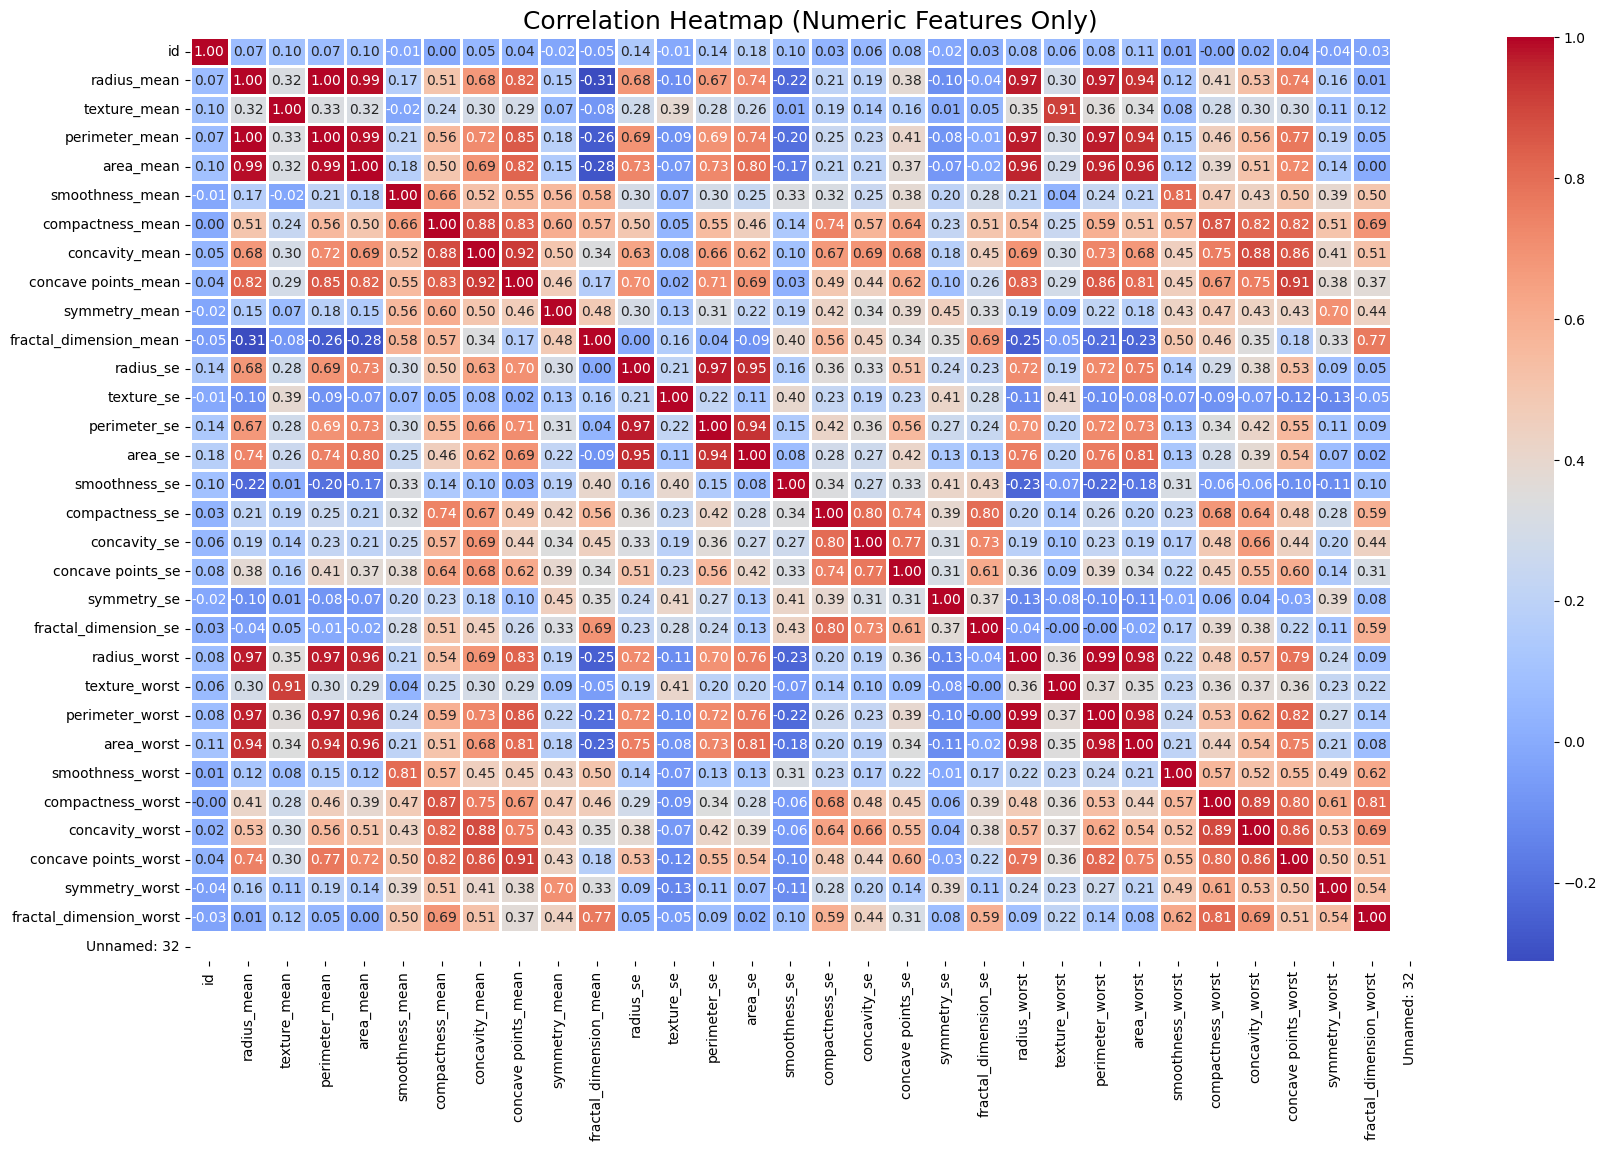

In [ ]:
plt.figure(figsize=(20, 12))

numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    linewidths=1,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=18)
plt.show()



**Key Observations from *This* Heatmap:**

1.  **Strong Positive Correlations :**
    *   Size-related features:radius_mean, perimeter_mean, area_mean ,radius_worst, perimeter_worst, area_worst,radius_se, perimeter_se, area_se --> These features are basically measuring the same physical property: nuclear size(highly redundant).

    *  Irregularity features :compactness_mean, concavity_mean,concave points_mean,compactness_worst ,concavity_worst,concave points_worst

2.  **Low-Correlation Features:**

    *   fractal_dimension_mean, fractal_dimension_se, fractal_dimension_worst

2.  **Correlation with `diagnosis_num` (Target Variable):**
    *  Strong positive correlations with diagnosis_num:
        
        -concave points_worst (0.79)

        -radius_worst (0.77)

        -area_worst (0.76)

        -concavity_worst (0.73)

        -perimeter_worst (0.78)

        -compactness_worst (0.59)


---> **Multicollinearity is very high !**

Many predictors are so correlated they deliver the same information.

In [ ]:
# Outlier detection function (IQR)
def detect_outliers_iqr(feature_series):
    Q1 = feature_series.quantile(0.25)
    Q3 = feature_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = feature_series[(feature_series < lower_bound) | (feature_series > upper_bound)]
    return len(outliers)

print("Outlier count per feature (IQR method):\n")

outlier_summary = {}

for feature in df.columns:
    # Skip non-numeric columns
    if not pd.api.types.is_numeric_dtype(df[feature]):
        print(f"{feature:20s}: SKIPPED (non-numeric)")
        continue

    outlier_count = detect_outliers_iqr(df[feature])
    outlier_percentage = (outlier_count / len(df)) * 100
    outlier_summary[feature] = outlier_count

    print(f"{feature:20s}: {outlier_count:3d} outliers ({outlier_percentage:5.2f}%)")

print("\nTotal numeric features processed:", len(outlier_summary))
print("Total outlier instances across all numeric features:", sum(outlier_summary.values()))


Outlier count per feature (IQR method):

id                  :  81 outliers (14.24%)
diagnosis           : SKIPPED (non-numeric)
radius_mean         :  14 outliers ( 2.46%)
texture_mean        :   7 outliers ( 1.23%)
perimeter_mean      :  13 outliers ( 2.28%)
area_mean           :  25 outliers ( 4.39%)
smoothness_mean     :   6 outliers ( 1.05%)
compactness_mean    :  16 outliers ( 2.81%)
concavity_mean      :  18 outliers ( 3.16%)
concave points_mean :  10 outliers ( 1.76%)
symmetry_mean       :  15 outliers ( 2.64%)
fractal_dimension_mean:  15 outliers ( 2.64%)
radius_se           :  38 outliers ( 6.68%)
texture_se          :  20 outliers ( 3.51%)
perimeter_se        :  38 outliers ( 6.68%)
area_se             :  65 outliers (11.42%)
smoothness_se       :  30 outliers ( 5.27%)
compactness_se      :  28 outliers ( 4.92%)
concavity_se        :  22 outliers ( 3.87%)
concave points_se   :  19 outliers ( 3.34%)
symmetry_se         :  27 outliers ( 4.75%)
fractal_dimension_se:  28 outlier

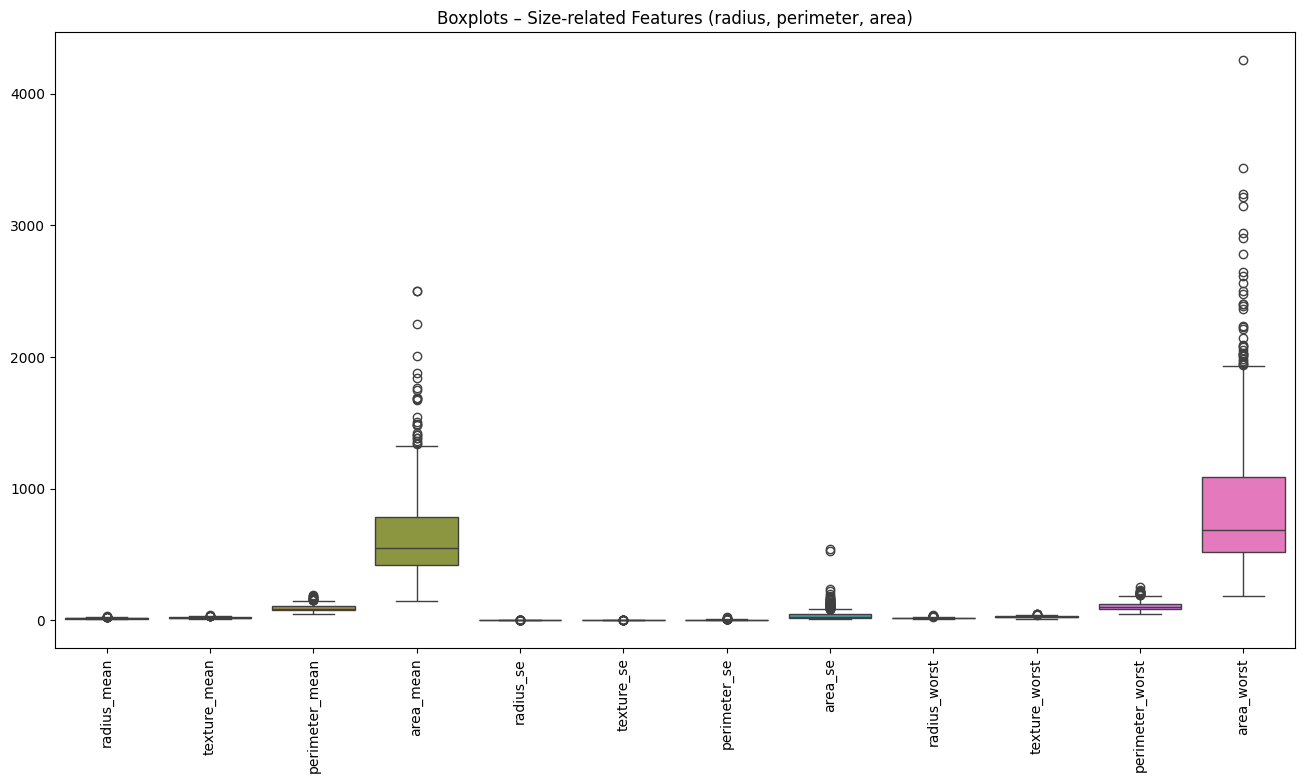

In [ ]:
size_features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst'
]

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[size_features])
plt.xticks(rotation=90)
plt.title("Boxplots – Size-related Features (radius, perimeter, area)")
plt.show()


-Size features (radius, perimeter, area) show the largest ranges

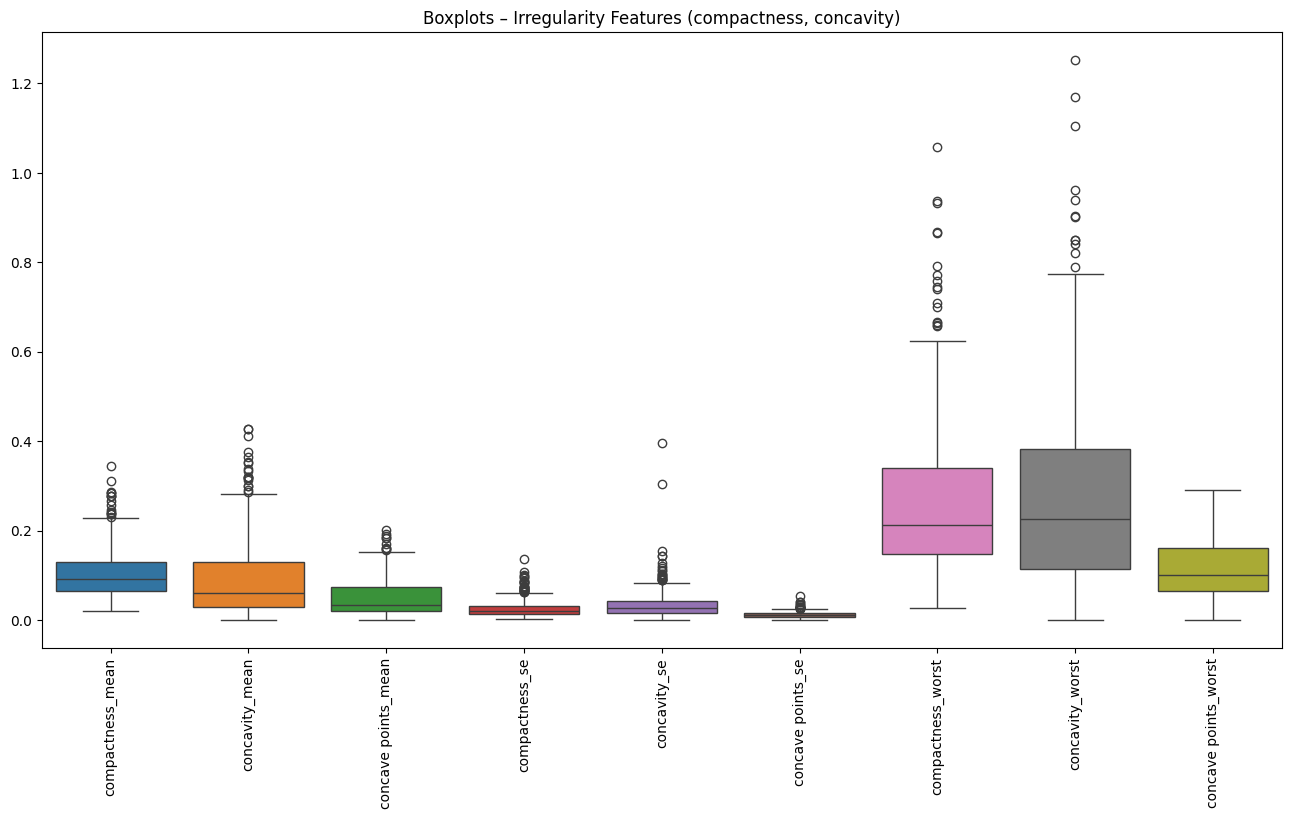

In [ ]:
irregularity_features = [
    'compactness_mean', 'concavity_mean', 'concave points_mean',
    'compactness_se', 'concavity_se', 'concave points_se',
    'compactness_worst', 'concavity_worst', 'concave points_worst'
]

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[irregularity_features])
plt.xticks(rotation=90)
plt.title("Boxplots – Irregularity Features (compactness, concavity)")
plt.show()


-Irregularity featuresdisplay significant outlier behavior.

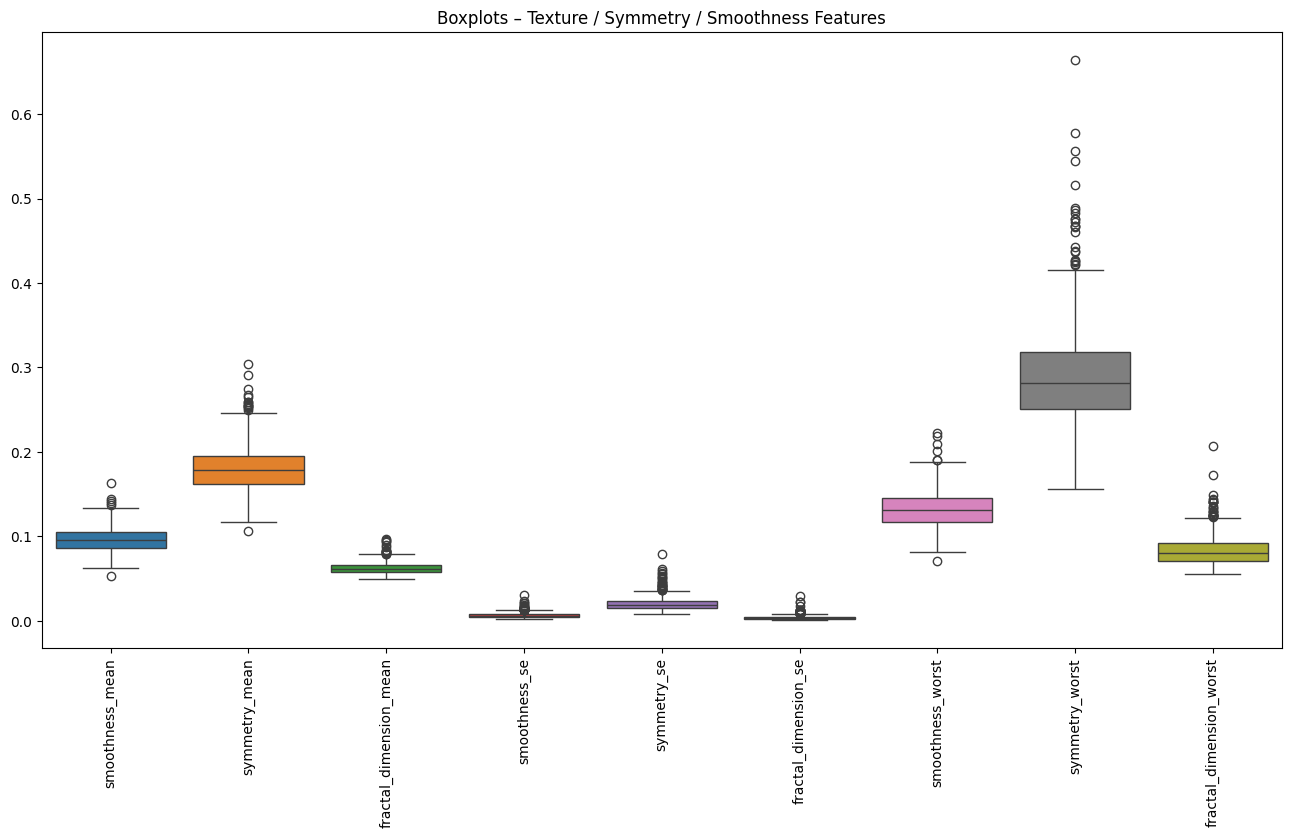

In [ ]:
texture_features = [
    'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'smoothness_se', 'symmetry_se', 'fractal_dimension_se',
    'smoothness_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[texture_features])
plt.xticks(rotation=90)
plt.title("Boxplots – Texture / Symmetry / Smoothness Features")
plt.show()


**Principal Component Analysis (PCA)**

To better understand the structure of the dataset and the relationships between features,  
**Principal Component Analysis (PCA)** was applied as part of the Data Understanding phase

PCA is a dimensionality reduction technique that transforms the original features into a new set of
uncorrelated variables called **principal components (PCs)**. These components capture the maximum
amount of variance present in the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
df_copy = df.drop(["id", "Unnamed: 32"], axis=1, errors="ignore")
# Extract features
X = df_copy.drop("diagnosis", axis=1)
feature_names = X.columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

print("Data scaled → mean ≈ 0, std ≈ 1")
print("Scaled shape:", X_scaled.shape)

Data scaled → mean ≈ 0, std ≈ 1
Scaled shape: (569, 30)


Explained Variance Ratio:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Cumulative Explained Variance:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


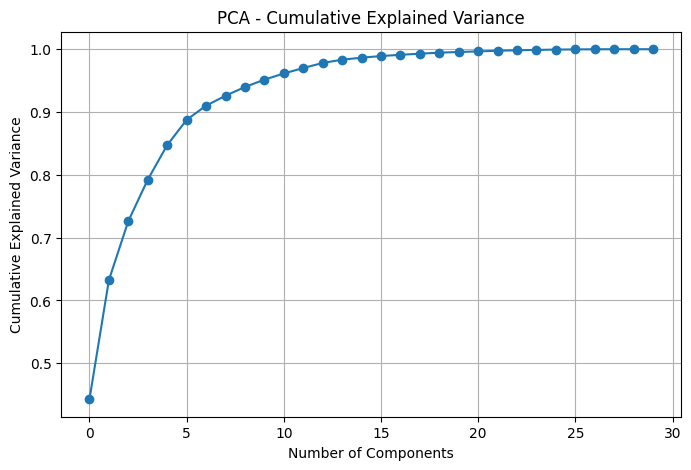

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print("Explained Variance Ratio:")
print(explained_var)

print("\nCumulative Explained Variance:")
print(cumulative_var)

# --- Plot cumulative explained variance ---
plt.figure(figsize=(8,5))
plt.plot(cumulative_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Explained Variance")
plt.grid(True)
plt.show()


The plot shows how much of the dataset’s information is captured by the principal components.

- **PC1 and PC2 already capture most of the important variance.**
- The curve rises quickly, meaning the dataset has many correlated features.
- Around **5–10 components** capture almost all useful information.
- After that, adding more components does not add much value.

This means the dataset’s structure can be well understood using only a few principal components.


In [ ]:
!pip install adjustText

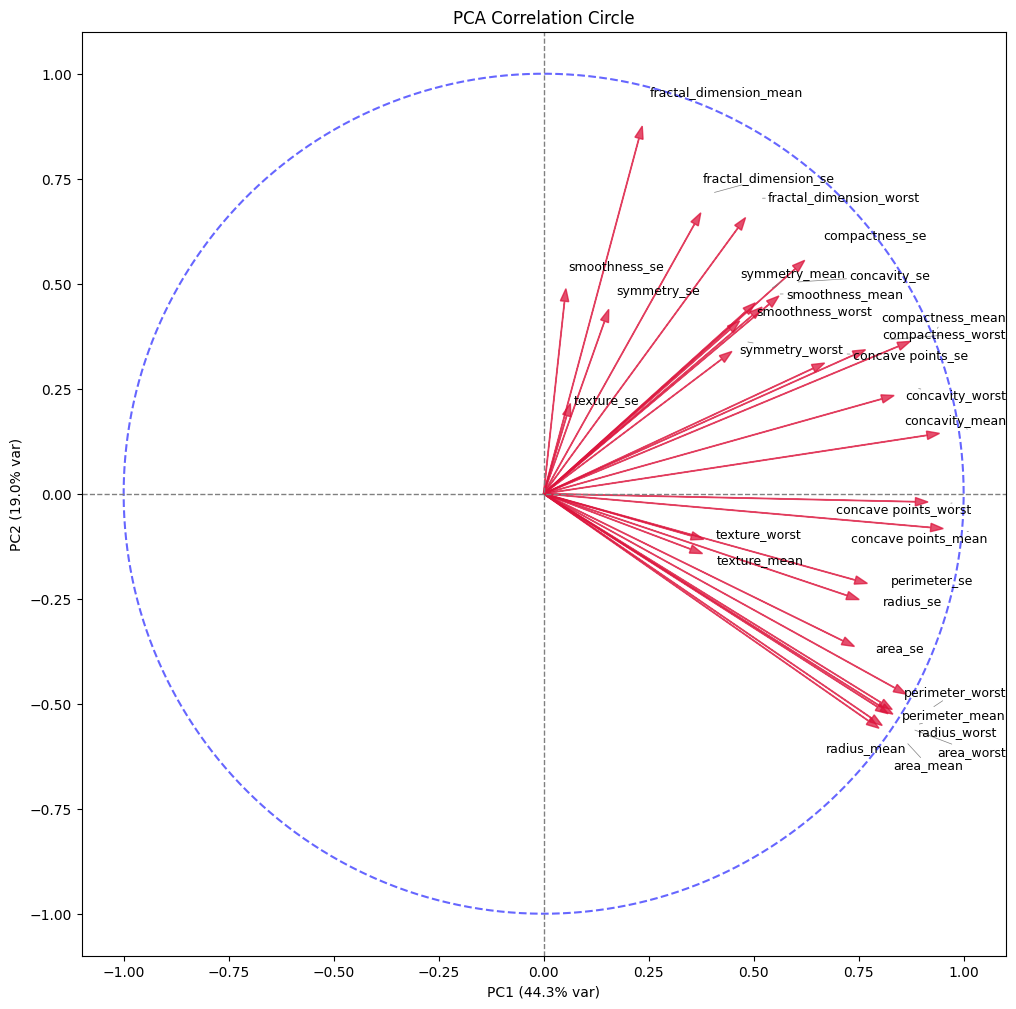

In [ ]:
from adjustText import adjust_text
import matplotlib.pyplot as plt
import numpy as np

eigvals = pca.explained_variance_

# Correlation circle coordinates
loadings_corr = pca.components_.T * np.sqrt(eigvals)

# Plot
fig, ax = plt.subplots(figsize=(12, 12))

# Unit circle
theta = np.linspace(0, 2*np.pi, 500)
ax.plot(np.cos(theta), np.sin(theta), 'b--', alpha=0.6)

names = X.columns
texts = []

# Draw arrows and labels
for i, name in enumerate(names):
    x, y = loadings_corr[i, 0], loadings_corr[i, 1]

    ax.arrow(0, 0, x, y,
             color='crimson',
             alpha=0.75,
             head_width=0.02,
             length_includes_head=True)

    texts.append(ax.text(x*1.07, y*1.07, name, fontsize=9))

# Adjust labels
adjust_text(texts, arrowprops=dict(arrowstyle="-", lw=0.5, color="gray"))

# Add axes & labels
ax.axhline(0, color='grey', lw=1, ls='--')
ax.axvline(0, color='grey', lw=1, ls='--')

ax.set_xlabel(f"PC1 ({explained_var[0]*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({explained_var[1]*100:.1f}% var)")
ax.set_title("PCA Correlation Circle")
ax.set_aspect('equal', 'box')

plt.show()


The PCA correlation circle shows how each original feature contributes to the first two principal components (PC1 and PC2).

### 1. Features strongly linked to PC1
Many features related to **size and shape of the nucleus** (radius, area, perimeter, concavity, compactness) point in the same direction.  
This means they are **highly correlated** and describe the same underlying concept: **larger and more irregular nuclei**.

These features have long arrows, meaning they contribute strongly to PC1, which explains **44.3% of the variance**.

### 2. Features linked to PC2
PC2 (19% variance) is influenced mainly by:
- **fractal_dimension_mean/se/worst**
- some **texture** and **smoothness** measures

These arrows point more vertically, meaning PC2 captures variation related to **texture complexity** rather than size.

### 3. Grouping and angle interpretation
- Features pointing in **similar directions** are positively correlated.  
- Features pointing in **opposite directions** are negatively correlated.  
- Features with **short arrows** contribute weakly to PC1 and PC2 (less important in this 2D view).

---

- **PC1 captures tumor size and irregularity** (dominant pattern in the dataset).  
- **PC2 captures texture and boundary complexity**.  
- Many features are redundant, which explains why PCA can represent the dataset well with only a few components.

The correlation circle confirms that the dataset has strong internal structure and highly correlated feature groups.


**Compute cos²**

cos² helps evaluate **how much trust** we can place in a feature's position in the PCA visualization and which features are **most influential** in shaping the principal components.

In [ ]:
# Loadings matrix
loadings = pca.components_.T   # (n_features, n_components)

# Square of loadings
loadings_sq = loadings**2

# Total squared loadings per variable (row-wise sum)
loadings_sq_sum = loadings_sq.sum(axis=1).reshape(-1, 1)

# cos² matrix
cos2 = loadings_sq / loadings_sq_sum

# Convert to DataFrame (optional but nicer)
cos2_df = pd.DataFrame(cos2, index=X.columns,
                       columns=[f"PC{i+1}" for i in range(cos2.shape[1])])

print("Cos² (quality of representation):")
cos2_df.head()

Cos² (quality of representation):


PC1       PC2       PC3       PC4       PC5       PC6  \
radius_mean      0.047918  0.054689  0.000073  0.001715  0.001428  0.000351   
texture_mean     0.010759  0.003565  0.004167  0.363669  0.002447  0.001035   
perimeter_mean   0.051773  0.046303  0.000087  0.001763  0.001397  0.000300   
area_mean        0.048839  0.053396  0.000824  0.002855  0.000107  0.000004   
smoothness_mean  0.020332  0.034638  0.010877  0.025403  0.133290  0.082010   

                      PC7       PC8       PC9      PC10  ...      PC21  \
radius_mean      0.015398  0.000056  0.049778  0.009118  ...  0.004702   
texture_mean     0.000130  0.017076  0.012701  0.058049  ...  0.201035   
perimeter_mean   0.013105  0.000349  0.050059  0.007462  ...  0.004868   
area_mean        0.002668  0.001202  0.038254  0.005618  ...  0.000340   
smoothness_mean  0.019788  0.083506  0.000041  0.004801  ...  0.014278   

                     PC22          PC23      PC24      PC25      PC26  \
radius_mean      0.005319  9.712634e-03  0.033335  0.000370  0.016764   
texture_mean     0.008987  3.080222e-07  0.009759  0.007182  0.000603   
perimeter_mean   0.005649  1.619636e-03  0.013607  0.000730  0.015689   
area_mean        0.009519  6.048598e-05  0.004879  0.044117  0.131571   
smoothness_mean  0.004073  4.270720e-04  0.004719  0.000838  0.001369   

                     PC27          PC28      PC29          PC30  
radius_mean      0.017299  4.460291e-02  0.044716  4.933856e-01  
texture_mean     0.000301  4.331148e-09  0.000111  7.489035e-08  
perimeter_mean   0.013321  7.112943e-03  0.147322  4.759578e-01  
area_mean        0.217727  7.426079e-02  0.178756  1.085528e-03  
smoothness_mean  0.004857  2.188236e-06  0.000012  2.349785e-05  

[5 rows x 30 columns]

In [ ]:
cos2_df[['PC1', 'PC2']].sort_values(by="PC1", ascending=False)

PC1       PC2
concave points_mean      0.068045  0.001209
concavity_mean           0.066771  0.003620
concave points_worst     0.062944  0.000068
compactness_mean         0.057257  0.023071
perimeter_worst          0.055998  0.039951
concavity_worst          0.052335  0.009597
radius_worst             0.051982  0.048341
perimeter_mean           0.051773  0.046303
area_worst               0.050567  0.048115
area_mean                0.048839  0.053396
radius_mean              0.047918  0.054689
perimeter_se             0.044659  0.008003
compactness_worst        0.044140  0.020619
radius_se                0.042427  0.011141
area_se                  0.041156  0.023193
concave points_se        0.033642  0.016984
compactness_se           0.029034  0.054157
concavity_se             0.023590  0.038891
smoothness_mean          0.020332  0.034638
symmetry_mean            0.019090  0.036233
fractal_dimension_worst  0.017367  0.075812
smoothness_worst         0.016372  0.029689
symmetry_worst           0.015106  0.020131
texture_worst            0.010914  0.002067
texture_mean             0.010759  0.003565
fractal_dimension_se     0.010520  0.078452
fractal_dimension_mean   0.004143  0.134378
symmetry_se              0.001806  0.033800
texture_se               0.000304  0.008096
smoothness_se            0.000211  0.041792

In [ ]:
# Color intensity based on cos² for PC1+PC2
variable_cos2 = cos2_df.loc[name, "PC1"] + cos2_df.loc[name, "PC2"]
ax.arrow(0, 0, x, y,
         color=plt.cm.viridis(variable_cos2),
         alpha=0.9,
         head_width=0.02,
         length_includes_head=True)


**Top 10 Most Important Features**

Top 10 Most Important Features:
                 feature  importance
22       perimeter_worst    0.136217
23            area_worst    0.127233
27  concave points_worst    0.125511
7    concave points_mean    0.098487
20          radius_worst    0.087023
6         concavity_mean    0.051233
3              area_mean    0.047854
2         perimeter_mean    0.047454
0            radius_mean    0.044267
13               area_se    0.035118


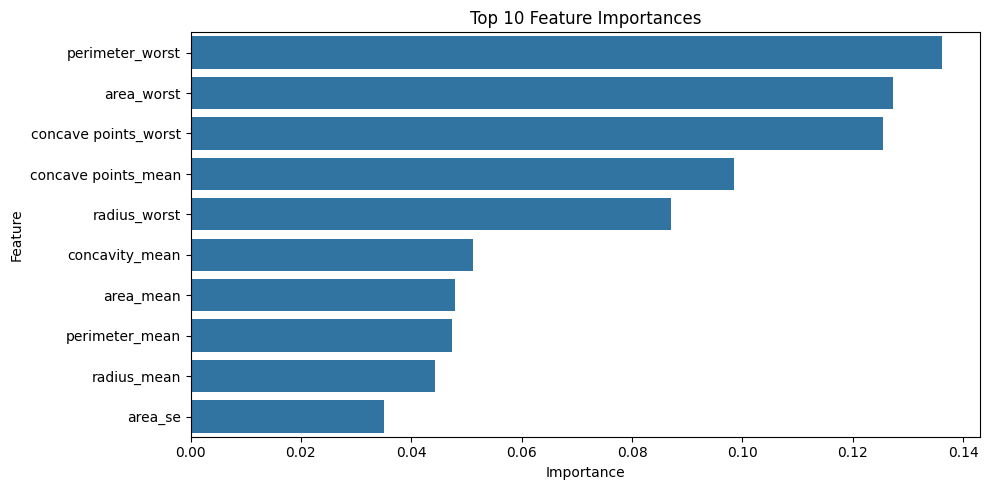

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

y = df_copy["diagnosis"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y_encoded)

importances = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
})

top10 = importances.sort_values(by="importance", ascending=False).head(10)
print("Top 10 Most Important Features:")
print(top10)

plt.figure(figsize=(10,5))
sns.barplot(data=top10, x="importance", y="feature")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Random Forest was used to identify the most important features contributing to the classification of breast tumors.  
The plot highlights the **top 10 features** ranked by their importance scores.

### **1. “Worst” measurements dominate importance**
Features such as **perimeter_worst**, **area_worst**, **concave points_worst**, and **radius_worst** have the highest importance scores.  
These describe the **most severe (largest or most irregular) measurements** of the nucleus and are strong indicators of malignancy.

### **2. Shape irregularity features are highly influential**
- **concave points_mean**
- **concavity_mean**

These features capture how irregular or sharp the nucleus edges are — a known characteristic of malignant tumors.

### **3. Size-related features remain crucial**
- **area_mean**
- **perimeter_mean**
- **radius_mean**

These show that **tumor size characteristics** are still relevant predictors, although less influential than the “worst” values.



##II.2. Dataset 2: DSO2 + DSO3


In [ ]:
path = "/content/drive/MyDrive/Dataset_ML/dataR2.csv"
df2 = pd.read_csv(path)

In [ ]:
df2.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1

In [ ]:
print(f"Dataset Shape: {df2.shape}")
print(f"Number of instances: {df2.shape[0]}")
print(f"Number of features: {df.shape[1]}")


Dataset Shape: (116, 10)
Number of instances: 116
Number of features: 33


In [ ]:
df2.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
df2.describe()

Age         BMI     Glucose     Insulin        HOMA      Leptin  \
count  116.000000  116.000000  116.000000  116.000000  116.000000  116.000000   
mean    57.301724   27.582111   97.793103   10.012086    2.694988   26.615080   
std     16.112766    5.020136   22.525162   10.067768    3.642043   19.183294   
min     24.000000   18.370000   60.000000    2.432000    0.467409    4.311000   
25%     45.000000   22.973205   85.750000    4.359250    0.917966   12.313675   
50%     56.000000   27.662416   92.000000    5.924500    1.380939   20.271000   
75%     71.000000   31.241442  102.000000   11.189250    2.857787   37.378300   
max     89.000000   38.578759  201.000000   58.460000   25.050342   90.280000   

       Adiponectin    Resistin        MCP.1  Classification  
count   116.000000  116.000000   116.000000      116.000000  
mean     10.180874   14.725966   534.647000        1.551724  
std       6.843341   12.390646   345.912663        0.499475  
min       1.656020    3.210000    45.843000        1.000000  
25%       5.474283    6.881763   269.978250        1.000000  
50%       8.352692   10.827740   471.322500        2.000000  
75%      11.815970   17.755207   700.085000        2.000000  
max      38.040000   82.100000  1698.440000        2.000000

In this step, we calculate how many missing (null) values exist in each column of the dataset. This information is important because columns with many missing values may need special handling, such as imputation or removal, to ensure the quality of our analysis and models.

In [ ]:
info_df2 = pd.DataFrame({
        'Column': df2.columns,
        'Non_Null_Count': df2.count(),
        'Null_Count': df2.isnull().sum(),
        'Missing_%': (df2.isnull().sum() / len(df2) * 100).round(2)
    })
print(info_df2.to_string(index=False))


        Column  Non_Null_Count  Null_Count  Missing_%
           Age             116           0        0.0
           BMI             116           0        0.0
       Glucose             116           0        0.0
       Insulin             116           0        0.0
          HOMA             116           0        0.0
        Leptin             116           0        0.0
   Adiponectin             116           0        0.0
      Resistin             116           0        0.0
         MCP.1             116           0        0.0
Classification             116           0        0.0


## II.2.1 Missing Values Analysis

In this step, we calculate how many missing (null) values exist in each column of the dataset. This information is important because columns with many missing values may need special handling, such as imputation or removal, to ensure the quality of our analysis and models.

In [ ]:
info_df2 = pd.DataFrame({
        'Column': df2.columns,
        'Non_Null_Count': df2.count(),
        'Null_Count': df2.isnull().sum(),
        'Missing_%': (df2.isnull().sum() / len(df2) * 100).round(2)
    })
print(info_df2.to_string(index=False))


        Column  Non_Null_Count  Null_Count  Missing_%
           Age             116           0        0.0
           BMI             116           0        0.0
       Glucose             116           0        0.0
       Insulin             116           0        0.0
          HOMA             116           0        0.0
        Leptin             116           0        0.0
   Adiponectin             116           0        0.0
      Resistin             116           0        0.0
         MCP.1             116           0        0.0
Classification             116           0        0.0


## II.2.2 Duplicate Analysis

In this step, we check the dataset for duplicate rows. Duplicate records can skew analysis and models by overrepresenting certain data points.

In [ ]:
duplicate_count = df2.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage: {(duplicate_count/len(df2)*100):.2f}%")
print()


Number of duplicate rows: 0



## II.2.3 Data Visualization

Boxplots are used to visualize the distribution of numerical data and detect outliers. They display the median, quartiles, and potential extreme values for each feature, helping us understand variability and spot anomalies that may need further investigation or treatment.

#### Create boxplots for numerical columns

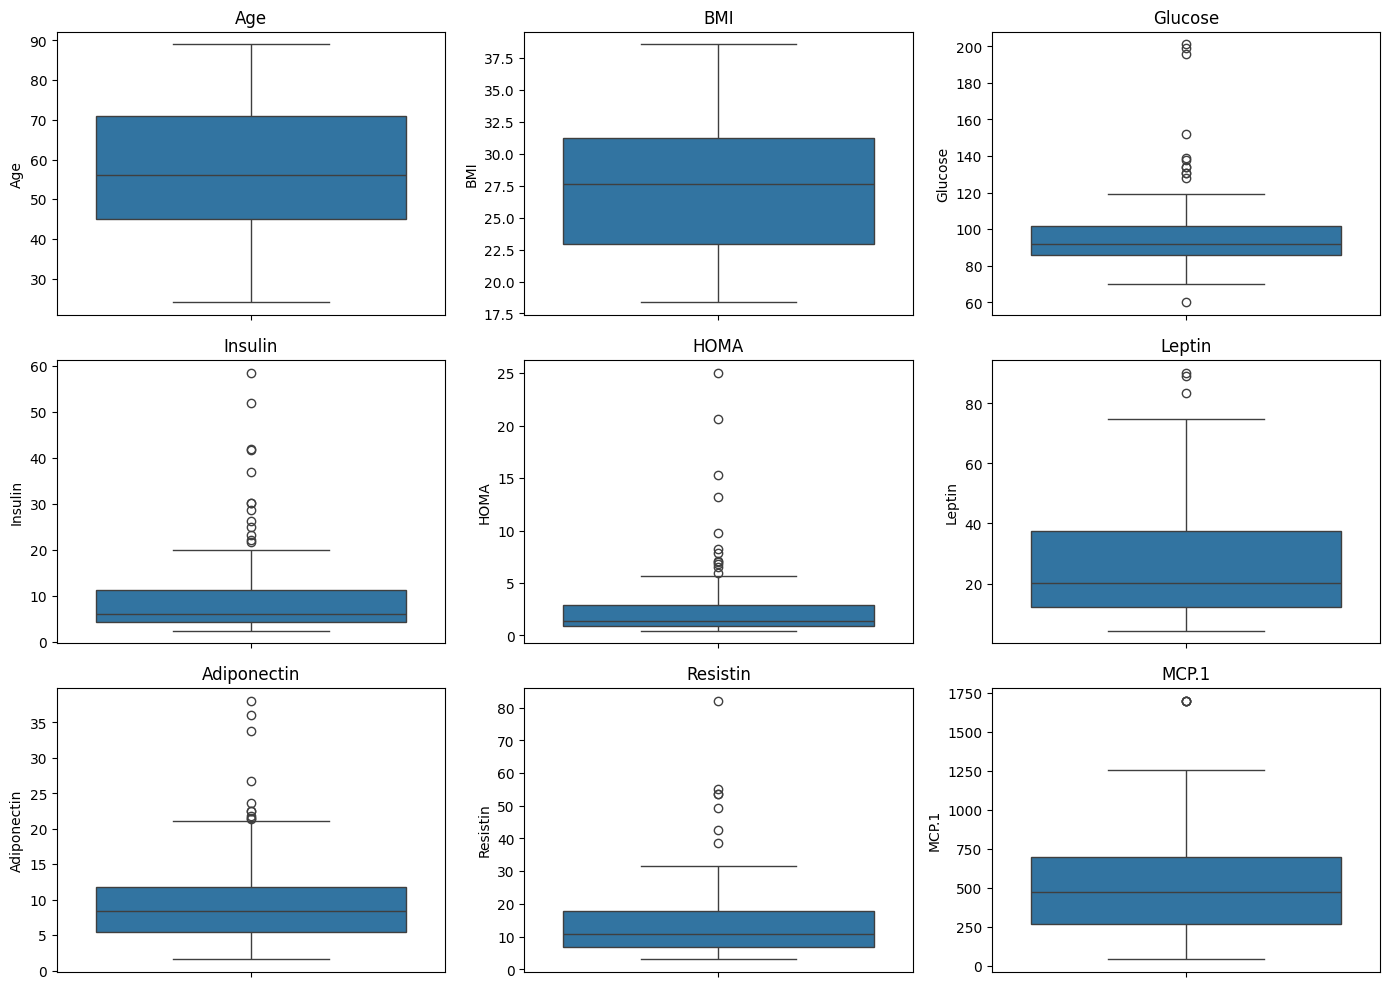

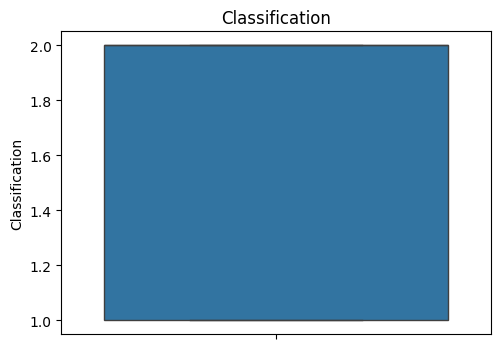

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns

numerical_cols = [col for col in numerical_cols if df2[col].dropna().shape[0] > 0]
cols_per_fig = 9  # number of boxplots per figure

for start in range(0, len(numerical_cols), cols_per_fig):
    end = start + cols_per_fig
    batch = numerical_cols[start:end]

    plt.figure(figsize=(14, 10))
    for i, col in enumerate(batch, 1):
        plt.subplot(3, 3, i)  # 2 rows, 3 columns
        sns.boxplot(y=df2[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()


This dataset was built for research purposes → the outliers are not errors; they are anomalies related to the disease.

Correlation Visualization:

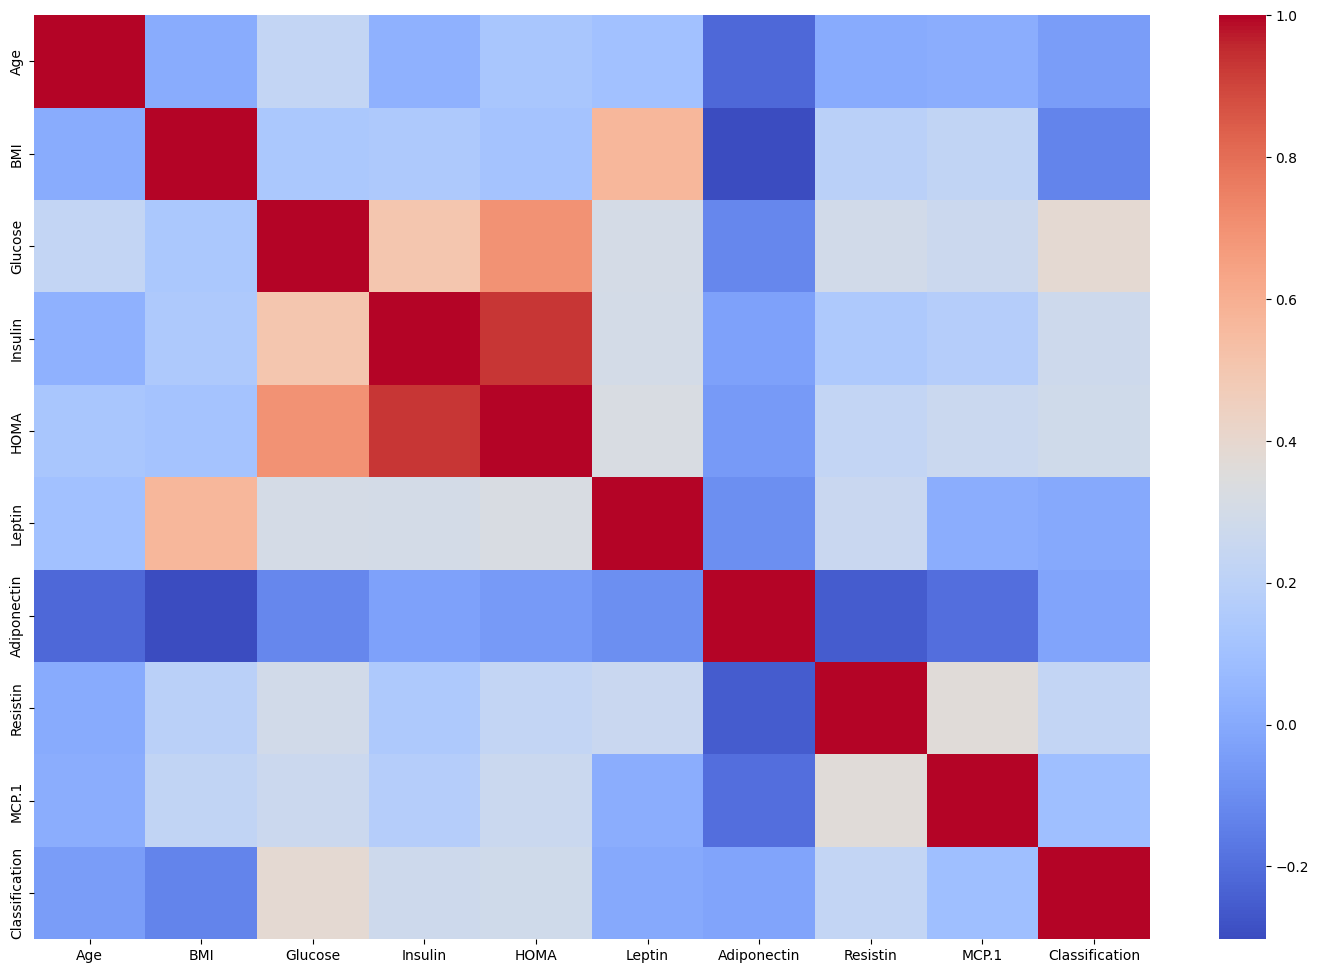

In [ ]:
# matrice de correllation les variables entre eux
df_features2 = df2.drop(columns=['Classification'])
plt.figure(figsize=(18, 12))
sns.heatmap(df2.corr(), annot=False, cmap='coolwarm')
plt.show()


**High Positive Correlation (Red)**: The disease risk variables Insulin, HOMA, Glucose, Leptin, BMI, Resistin, and MCP.1 are all strongly positively correlated with each other and with the final Classification.

**High Negative Correlation (Blue)**: Adiponectin is strongly negatively correlated with Insulin, HOMA, Glucose, and Classification, positioning it opposite the disease indicators.

**Low Correlation (Pale)**: Age shows weak correlation with most other variables.

In [ ]:
# matrice de correllation les variables avec la target
# creation de diagnosis numerique

df2.corr()['Classification'].sort_values(ascending=False)



Classification    1.000000
Glucose           0.384315
HOMA              0.284012
Insulin           0.276804
Resistin          0.227310
MCP.1             0.091381
Leptin           -0.001078
Adiponectin      -0.019490
Age              -0.043555
BMI              -0.132586
Name: Classification, dtype: float64

### Principal Component Analysis (PCA)

In [ ]:
# standardisation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Sélectionner uniquement les variables numériques
X = df2.select_dtypes(include=[np.number])

# --- 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Variance expliquée
print("Variance expliquée par PC1 et PC2 :", pca.explained_variance_ratio_)


Variance expliquée par PC1 et PC2 : [0.3169621  0.16237842]


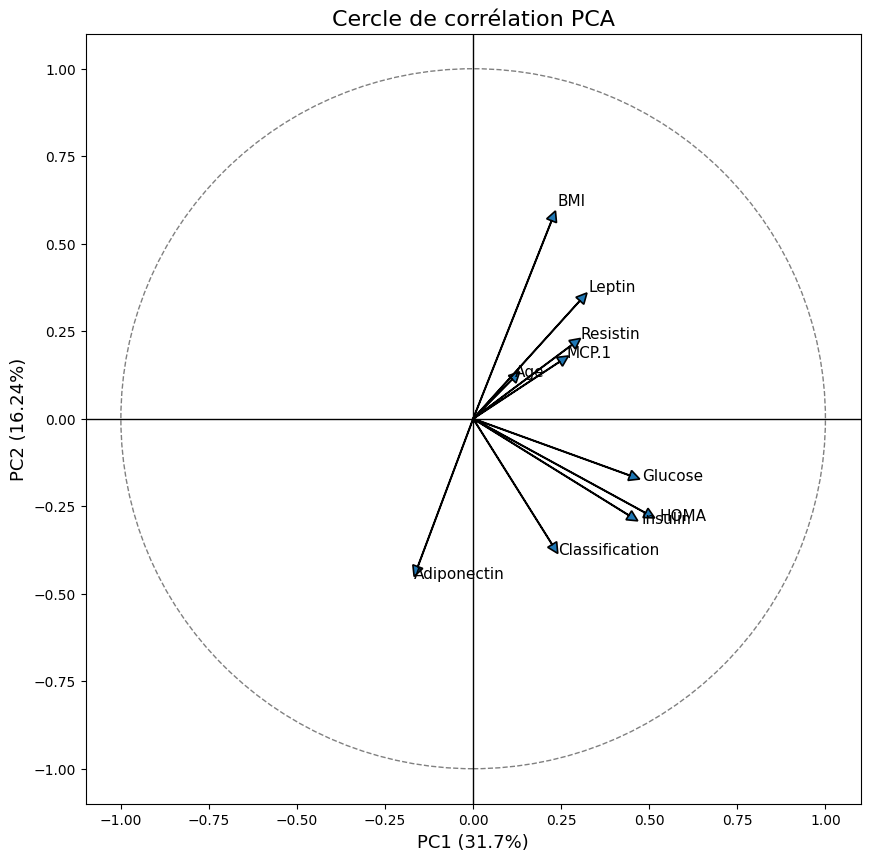

In [ ]:
# ---  cercle de corrélation ---
def plot_correlation_circle(pca, features, dim1=1, dim2=2):
    pcs = pca.components_
    pc1 = pcs[dim1-1]
    pc2 = pcs[dim2-1]

    fig, ax = plt.subplots(figsize=(10,10))

    # Cercle
    circle = plt.Circle((0,0), 1, color='grey', fill=False, linestyle='--')
    ax.add_artist(circle)

    # Axes
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)

    # Variables
    for i, feature in enumerate(features):
        x = pc1[i]
        y = pc2[i]
        ax.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, linewidth=1.2)
        ax.text(x*1.08, y*1.08, feature, fontsize=11)

    ax.set_xlabel(f"PC{dim1} ({round(pca.explained_variance_ratio_[dim1-1]*100,2)}%)", fontsize=13)
    ax.set_ylabel(f"PC{dim2} ({round(pca.explained_variance_ratio_[dim2-1]*100,2)}%)", fontsize=13)
    ax.set_title("Cercle de corrélation PCA", fontsize=16)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    plt.grid(False)
    plt.show()

# --- Appel de la fonction ---
plot_correlation_circle(pca, X.columns)


**Positive Correlations**: The inflammation/obesity markers (BMI, Leptin, Resistin, MCP.1) are highly inter-correlated. Similarly, the insulin resistance indicators (HOMA, Glucose, Classification) form a very tight, positively correlated group.

**Negative Correlation**: Adiponectin is strongly and negatively correlated with all other groups (BMI, Glucose, HOMA).

**Weak Variable**: Age is poorly represented on this plane, showing a weak correlation with the majority of the other variables.

#III. Data Preparation

##III.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

Now we are going to prepare the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
df = df.drop('Unnamed: 32', axis=1)
df = df.drop('id', axis=1)

print("\nMissing values per column:")
print(df.isnull().sum())

duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Removed {duplicates} duplicate rows")

print(f"\nFinal dataset shape after cleaning: {df.shape}")


Missing values per column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Duplicate rows: 0

Final dataset shape after cleaning: (569

In [ ]:
# Encode target variable
# M (Malignant) -> 1, B (Benign) -> 0
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df['diagnosis'].value_counts()

print(df['diagnosis'].value_counts())

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y. shape}")

diagnosis
0    357
1    212
Name: count, dtype: int64

Features shape: (569, 30)
Target shape: (569,)


In [ ]:
# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("\nFeature scaling completed using StandardScaler")
print(f"Scaled features shape: {X_scaled_df.shape}")
print("\nScaled data statistics:")
print(X_scaled_df.describe())


Feature scaling completed using StandardScaler
Scaled features shape: (569, 30)

Scaled data statistics:
        radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17   -1.248757e-16 -2.185325e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17        -4.995028e-17   
std       1.000880e+00      1.000880e+00    1.0

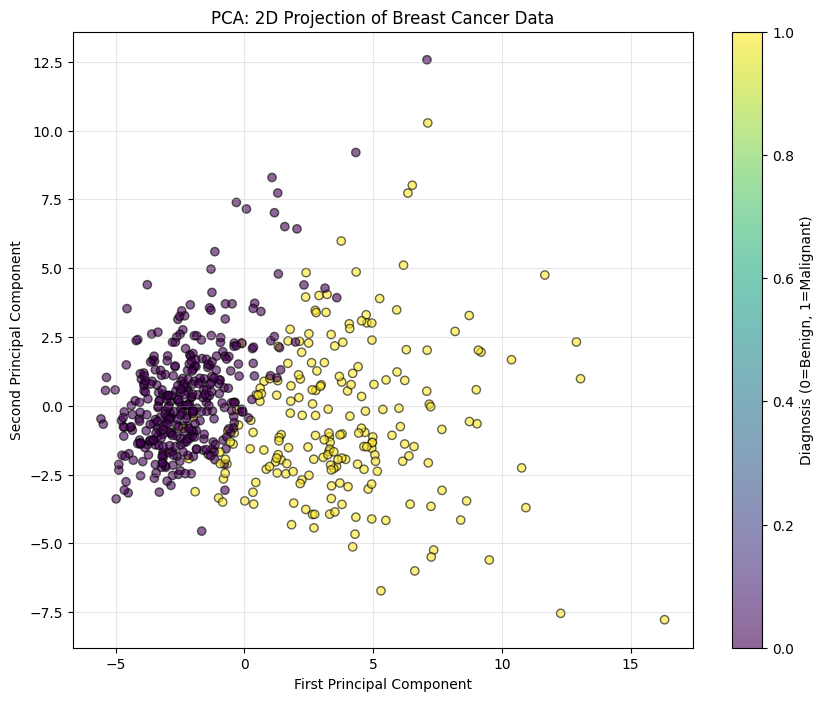


Explained variance by 2 components: 63.24%

Components needed for 95% variance: 10
Total explained variance: 95.16%


In [ ]:
# Apply PCA for visualization
pca_viz = PCA(n_components=2)
X_pca_2d = pca_viz.fit_transform(X_scaled)

# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                     c=y, cmap='viridis', alpha=0.6, edgecolors='k')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: 2D Projection of Breast Cancer Data')
plt. colorbar(scatter, label='Diagnosis (0=Benign, 1=Malignant)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nExplained variance by 2 components: {pca_viz. explained_variance_ratio_. sum():.2%}")

# Determine optimal number of components
pca_full = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca_full.fit_transform(X_scaled)

print(f"\nComponents needed for 95% variance: {pca_full.n_components_}")
print(f"Total explained variance: {pca_full. explained_variance_ratio_.sum():.2%}")

In [ ]:
from imblearn.over_sampling import SMOTE

# Check if SMOTE is needed
class_distribution = y.value_counts()
minority_ratio = class_distribution. min() / class_distribution.max()

print(f"\nClass imbalance ratio: {minority_ratio:.2f}")

if minority_ratio < 0.7:  # Apply SMOTE if minority class < 70%
    print("Applying SMOTE to balance classes...")
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote. fit_resample(X_scaled, y)

    print(f"Before SMOTE: {X_scaled.shape}")
    print(f"After SMOTE: {X_balanced. shape}")
    print(f"\nClass distribution after SMOTE:")
    print(pd.Series(y_balanced).value_counts())
else:
    print("Class distribution acceptable - SMOTE not applied")
    X_balanced, y_balanced = X_scaled, y


Class imbalance ratio: 0.59
Applying SMOTE to balance classes...
Before SMOTE: (569, 30)
After SMOTE: (714, 30)

Class distribution after SMOTE:
diagnosis
1    357
0    357
Name: count, dtype: int64


Balancing Train–Test Split (50% Benign / 50% Malignant)

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# --- Original Split (keeps proportions but we will balance manually) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,         # 70% train / 30% test
    random_state=42,
    stratify=y
)

# Convert to DataFrames for easy manipulation
train_df = pd.DataFrame(X_train, columns=X.columns)
train_df['diagnosis'] = y_train.values

test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['diagnosis'] = y_test.values

# --- BALANCE THE TRAINING SET ---
train_min = train_df['diagnosis'].value_counts().min()

train_m = train_df[train_df['diagnosis'] == 1].sample(train_min, random_state=42)
train_b = train_df[train_df['diagnosis'] == 0].sample(train_min, random_state=42)
train_balanced = pd.concat([train_m, train_b]).sample(frac=1, random_state=42)

X_train_bal = train_balanced.drop('diagnosis', axis=1).values
y_train_bal = train_balanced['diagnosis'].values

# --- BALANCE THE TEST SET ---
test_min = test_df['diagnosis'].value_counts().min()

test_m = test_df[test_df['diagnosis'] == 1].sample(test_min, random_state=42)
test_b = test_df[test_df['diagnosis'] == 0].sample(test_min, random_state=42)
test_balanced = pd.concat([test_m, test_b]).sample(frac=1, random_state=42)

X_test_bal = test_balanced.drop('diagnosis', axis=1).values
y_test_bal = test_balanced['diagnosis'].values

# --- Check class balance ---
print("Balanced Training Set:")
print(pd.Series(y_train_bal).value_counts())

print("\nBalanced Test Set:")
print(pd.Series(y_test_bal).value_counts())

Balanced Training Set:
0    148
1    148
Name: count, dtype: int64

Balanced Test Set:
1    64
0    64
Name: count, dtype: int64


Because the original dataset is imbalanced (more Benign cases than Malignant), we applied a balancing strategy after splitting the data. The goal was to ensure that **both the training set (70%) and test set (30%) contain an equal number of Benign and Malignant samples**.

##III.2. Dataset 2 DSO2 + DSO3

## III.2.1 Data Transformation


In [ ]:
features2 = [col for col in df2.columns if col != "Classification"]
X = df2[features2].values
y = df2["Classification"].values


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X_scaled2 = scaler.fit_transform(X)



#IV. Modeling

##IV.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

###IV.1.1. Applying the XGboost (Extreme Gradient Boosting)


**XGBoost (Extreme Gradient Boosting)** is a fast and powerful machine learning algorithm based on **gradient-boosted decision trees**. It builds many trees sequentially, where each new tree corrects the errors of the previous ones.

**Architecture**

- Uses **boosting**: trees are added one after another.
- Each tree learns from the **residual errors** of the previous model.
- Includes **regularization** to reduce overfitting.
- Can handle missing values automatically.


**Key Parameters**

- **n_estimators** → number of trees.
- **max_depth** → how deep each tree can grow (model complexity).
- **learning_rate** → shrinkage applied to each tree’s contribution.
- **subsample** → % of rows used for each tree (prevents overfitting).
- **colsample_bytree** → % of features used per tree.
- **gamma** → minimum loss reduction needed to split a node.
- **min_child_weight** → minimum data needed in a leaf.



In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
xg=xgb.XGBClassifier()

In [ ]:
xg.fit(X_train_bal,y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5, 10],
    'min_child_weight': [1, 2, 5, 10]
}

rnd_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,        # number of sampled combinations
    cv=5,
    scoring='roc_auc',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rnd_search_xgb.fit(X_train_bal, y_train_bal)
print("Best Params:", rnd_search_xgb.best_params_)
print(f"Best Cross-Validation Score: {rnd_search_xgb.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:17:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Best Cross-Validation Score: 0.9923


###IV.1.2. Applying Random Forest






**Random Forest** is an ensemble learning algorithm that builds many **independent decision trees** and combines their predictions.  


**Architecture**

- Builds **multiple decision trees** using different random subsets of the data and features.
- Each tree learns patterns independently.
- The final prediction is made by **majority vote** (classification).
- Randomness in sampling and feature selection makes the model more generalizable and stable.


**Key Parameters**

- **n_estimators** → number of trees in the forest.  
- **max_depth** → maximum depth of each tree (complexity control).  
- **min_samples_split** → minimum samples required to split a node.  
- **min_samples_leaf** → minimum samples required in a leaf node.  
- **max_features** → number of features considered when splitting a node.  
- **bootstrap** → whether trees are trained on bootstrapped samples.  


In [ ]:
# Defensive copies
X_model = X.copy()
y_model = y.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# Fit on training data only
rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(class_weight='balanced', random_state=42)

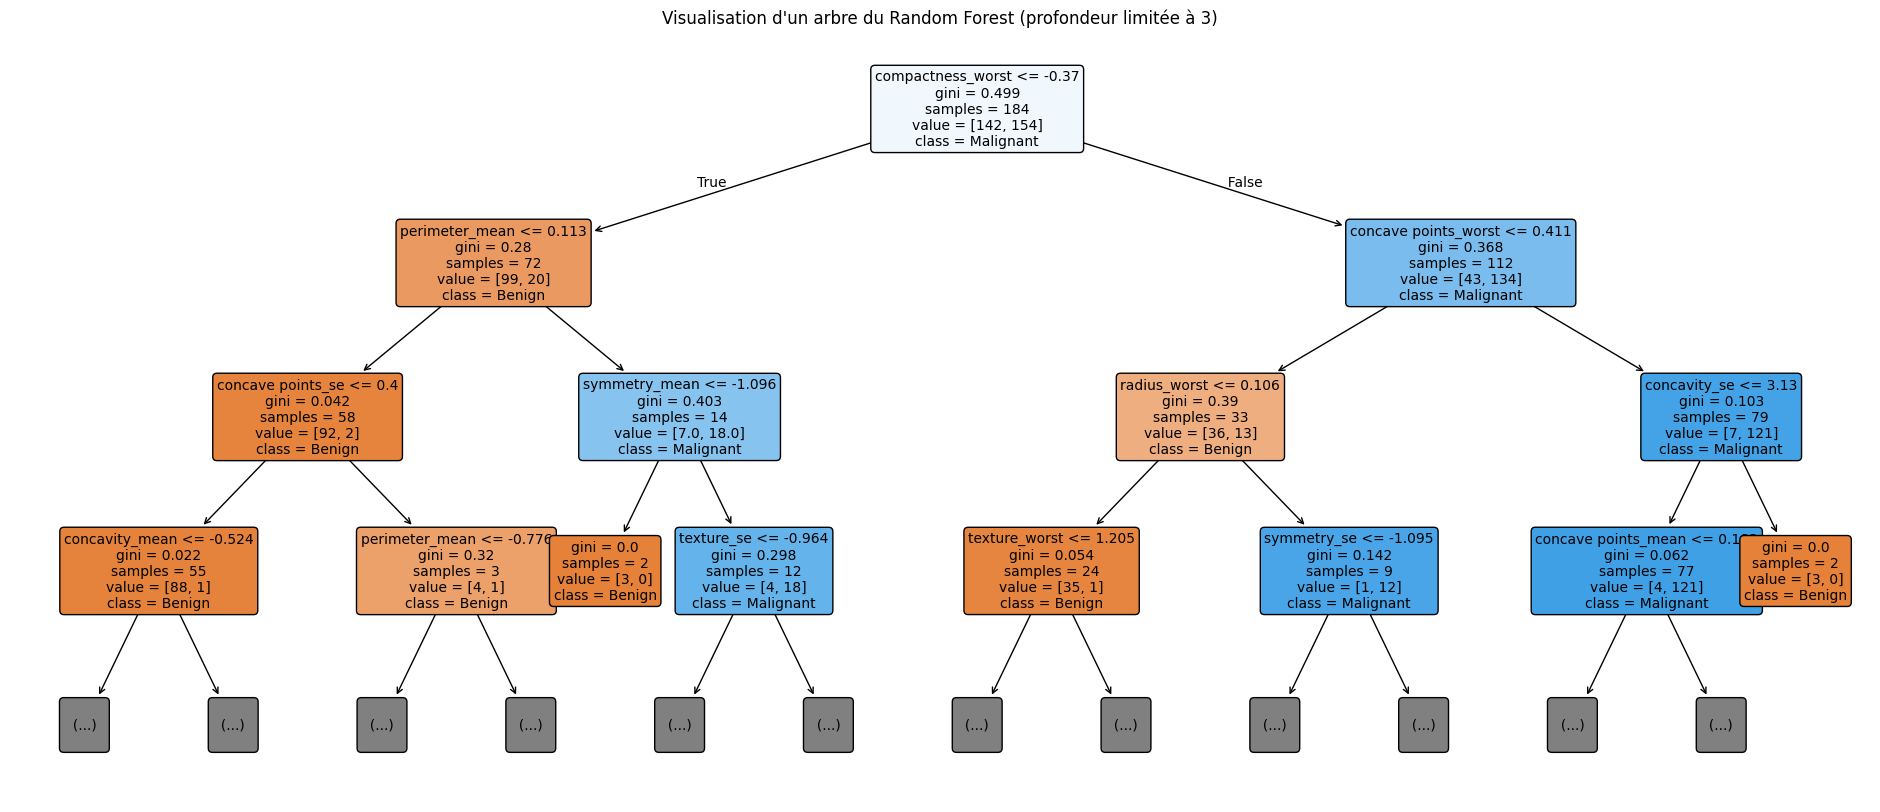

In [ ]:
from sklearn.tree import plot_tree
# The variable `X` was reassigned to a NumPy array, losing the `.columns` attribute.
# We need to get the feature names from the original DataFrame `df`.
# The `all_features` variable from cell `THThjmb317ks` already contains the correct column names.
features = df.drop(columns=["diagnosis"]).columns
estimator = rf.estimators_[5]
plt.figure(figsize=(24, 10))
plot_tree(
    estimator,
    feature_names=features,
    class_names=["Benign", "Malignant"],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Visualisation d'un arbre du Random Forest (profondeur limitée à 3)")
plt.show()

###IV.1.3. Applying K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a simple and intuitive machine learning algorithm that makes predictions based on the **closest data points** in the feature space.

**Architecture**

- To classify a new point, KNN:
  1. Computes the **distance** to all training samples.
  2. Selects the **k nearest neighbors**.
  3. Predicts the class based on **majority vote** among these neighbors.
- Uses distance metrics like **Euclidean**, **Manhattan**, or **Minkowski**.



**Key Parameters**

- **n_neighbors (k)** → number of neighbors used for voting.  
- **weights** → `'uniform'` (equal vote) or `'distance'` (closer points have more influence).  
- **metric** → distance measure (`'euclidean'`).  
- **p** → power parameter for Minkowski distance (p=2 → Euclidean, p=1 → Manhattan).






In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scores = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_bal, y_train_bal)
    scores.append(knn.score(X_test_bal, y_test_bal))

best_k = scores.index(max(scores)) + 1
print("Meilleur k =", best_k)


Meilleur k = 4


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train_bal, y_train_bal)

KNeighborsClassifier(n_neighbors=4, weights='distance')

###IV.1.4. Applying Linear Regression

**Linear Regression** is a simple and widely used algorithm that models the relationship between input features and a target variable by fitting a **straight line ** to the data.  


**Architecture**

Linear Regression assumes the target value can be expressed as a **linear combination of the input features**:

\[
y = w1 x1 + w2 x2 + ... + wn xn + b
\]


Where:
- \( wi \) = weight (importance) of each feature  
- \( b \) = bias term  


The model learns these weights by minimizing the **Mean Squared Error (MSE)** between predicted and true values.


**Key Parameters**

- **fit_intercept** → whether the model should learn the bias term.  
- **normalize** → whether to normalize features before training (less used today).  
- **copy_X** → whether to copy the input data.  
- **n_jobs** → number of CPU cores used for computation.




In [ ]:
from sklearn.linear_model import LinearRegression

# Modèle
modelLR = LinearRegression()
modelLR.fit(X_train_bal, y_train_bal)


LinearRegression()

###IV.1.5. Applying Softmax regression


**Softmax Regression**  is a classification algorithm that extends logistic regression to handle multiple classes.  



**Architecture**

Softmax Regression computes a linear combination of the input features:

\[
z_k = w_{k1}x_1 + w_{k2}x_2 + \dots + w_{kn}x_n + b_k
\]

Then applies the **softmax function** to obtain class probabilities:

\[
P(y = k \mid x) = \frac{e^{z_k}}{\sum_{j=1}^{C} e^{z_j}}
\]

Where:  
- \( z_k \) = score for class \( k \)  
- \( C \) = number of classes  
- The output is a **probability for each class**, and the predicted class is the one with the highest probability.

For binary classification, Softmax Regression reduces to **Logistic Regression**.


**Key Parameters**

- **solver** → optimization algorithm (`lbfgs`, `saga`).  
- **max_iter** → maximum number of training iterations.  
- **C** → inverse of regularization strength (smaller C = stronger regularization).  
- **penalty** → type of regularization (`l2` is default).  
- **multi_class** → `'auto'`, `'multinomial'`, or `'ovr'`.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pipeline = Pipeline([
    ('scaler', StandardScaler()),          # normalize all features
    ('pca', PCA(n_components=0.95,         # keep 95% variance → ~10 features
                random_state=42))
])
# fit PCA on TRAIN ONLY
X_train_ready = pipeline.fit_transform(X_train_bal)
X_test_ready  = pipeline.transform(X_test_bal)

print(f"Original features: {X_train_bal.shape[1]}")
print(f"After PCA       : {X_train_ready.shape[1]}")
print(f"Train shape     : {X_train_ready.shape}")
print(f"Test shape      : {X_test_ready.shape}")

Original features: 30
After PCA       : 10
Train shape     : (296, 10)
Test shape      : (128, 10)


In [ ]:
softmax_model = LogisticRegression(
    solver='lbfgs',
    max_iter=2000,
    multi_class='auto',
    random_state=42
)

softmax_model.fit(X_train_ready, y_train_bal)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='auto', random_state=42)

###IV.1.6. Applying SVM (Support Vector Machine)

**Support Vector Machine (SVM)** is a powerful classification algorithm that finds the **best separating boundary (hyperplane)** between classes.  

**Architecture**

SVM tries to find a decision function of the form:

\[
f(x) = w \cdot x + b
\]

It chooses the hyperplane that **maximizes the margin** between classes:

- Points closest to the hyperplane are the **support vectors**.  
- A wider margin → better generalization.
- SVM can handle non-linear data using **kernels**, which map data to higher dimensions.

Common kernels:
- **linear**
- **rbf** (Gaussian)
- **poly**
- **sigmoid**


**Key Parameters**

- **C** → controls the trade-off between maximizing margin and minimizing classification errors  
  (small C = wider margin, large C = stricter classification)

- **kernel** → type of transformation applied to the data (`linear`, `rbf`, `poly`, `sigmoid`)

- **gamma** → controls how far the influence of a single training example reaches  
  (high gamma = more complex decision boundary)

- **degree** → degree of the polynomial kernel (used when `kernel='poly'`)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC(kernel='linear', C=1)
svm.fit(X_train_bal, y_train_bal)


SVC(C=1, kernel='linear')

In [ ]:
svm_all_models = {}
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for k in kernels:
    model = SVC(kernel=k, C=1, gamma='scale')
    model.fit(X_train_bal, y_train_bal)
    svm_all_models[k] = model


Selecting top 10 most important features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Load Top 10 RF features
top_features = top10["feature"].tolist()
print("Top 10 features:", top_features)

# Rebuild DataFrames from balanced arrays
all_features = df.drop(columns=["diagnosis"]).columns

X_train_bal_df = pd.DataFrame(X_train_bal, columns=all_features)
X_test_bal_df  = pd.DataFrame(X_test_bal,  columns=all_features)

# select only your top 10 features
X_train_sel = X_train_bal_df[top_features]
X_test_sel  = X_test_bal_df[top_features]

#  Scale AFTER feature selection
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled  = scaler.transform(X_test_sel)


# === 5. Entraînement SVM avec plusieurs kernels ===
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
svm_top10_models = {}

for k in kernels:
    model = SVC(kernel=k, C=1, gamma='scale')
    model.fit(X_train_scaled, y_train_bal)
    svm_top10_models[k] = model    # On stocke pour l'évaluation





Top 10 features: ['perimeter_worst', 'area_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'concavity_mean', 'area_mean', 'perimeter_mean', 'radius_mean', 'area_se']


###IV.1.7. Applying the MLP (Multilayer Perceptron)

A **Multilayer Perceptron (MLP)** is a type of **feedforward neural network** made of multiple layers of neurons.  


**Architecture**

An MLP consists of:

- **Input layer** → receives the features  
- **Hidden layers** → one or more layers of neurons with activation functions  
- **Output layer** → produces the final prediction


**Key Parameters**

- **hidden_layer_sizes** → number and size of hidden layers
- **activation** → function used in hidden layers (`relu`, `tanh`, `logistic`)  
- **solver** → optimization algorithm (`adam`, `sgd`, `lbfgs`)  
- **learning_rate** → controls how fast the model learns  
- **max_iter** → maximum training iterations  
- **alpha** → L2 regularization strength (prevents overfitting)  




In [ ]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


mlp_paper = Sequential([
    Dense(500, activation='relu', input_shape=(X_train_bal.shape[1],)), # Use dynamic input_shape for robustness
    Dropout(0.5),                                       # 50% dropout
    Dense(500, activation='relu'),                      # Second layer
    Dropout(0.5),
    Dense(500, activation='relu'),                      # Third layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')                     # Output
])

mlp_paper.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("MLP arch (3×500 neurons + 50% dropout)")
print(mlp_paper.summary())

MLP arch (3×500 neurons + 50% dropout)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │        15,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 517,001 (1.97 MB)

 Trainable params: 517,001 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

print("Training  MLP... ")
history = mlp_paper.fit(
    X_train_bal, y_train_bal,
    validation_split=0.2,
    epochs=3000,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
print(f"Stopped at epoch {len(history.history['loss'])}")

Training  MLP... 
Epoch 1/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - accuracy: 0.5654 - loss: 0.6556 - val_accuracy: 0.8500 - val_loss: 0.4583
Epoch 2/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8821 - loss: 0.4075 - val_accuracy: 0.8667 - val_loss: 0.3322
Epoch 3/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9424 - loss: 0.2437 - val_accuracy: 0.8833 - val_loss: 0.2586
Epoch 4/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9559 - loss: 0.1711 - val_accuracy: 0.9167 - val_loss: 0.2206
Epoch 5/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9535 - loss: 0.1392 - val_accuracy: 0.9167 - val_loss: 0.1836
Epoch 6/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.9672 - loss: 0.1178 - val_accuracy: 0.9833 - val_loss: 0.1506
Epoch 7/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9672 - loss: 0.0893 - val_accuracy: 0.9833 - val_loss: 0.1387
Epoch 8/3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9724 - loss: 0.0813 - val

###IV.1.8. Applying the GRU-SVM


**GRU-SVM** is a hybrid model that combines a **Gated Recurrent Unit (GRU)** neural network with a **Support Vector Machine (SVM)** classifier.  

**Architecture**

The GRU-SVM model works in two main steps:

**1. GRU Feature Extraction**

The GRU includes:
- **Update gate (z)** → controls how much of the past information to keep  
- **Reset gate (r)** → decides how much past information to forget  
- **Candidate state** → generates a new memory state  

This allows the model to capture complex dependencies in the data.

**2. SVM Classification**
The final GRU output is passed to an SVM classifier:

The SVM learns the decision boundary and performs the final classification (benign vs malignant).


**Key Parameters**

**GRU Parameters**
- **units** → number of GRU neurons  
- **dropout** → prevents overfitting  
- **learning_rate** → controls GRU training speed  
- **epochs** and **batch_size** → training configuration  

**SVM Parameters**
- **kernel** → usually `'rbf'` or `'linear'`  
- **C** → regularization strength  
- **gamma** → controls decision boundary flexibility  



              PCA-reduced features (10 dims)
                           │
                           ▼
        ┌──────────────────────────────────────┐
        │              GRU Layer               │
        │                                      │
        └──────────────────────────────────────┘
                           │
                128-dimensional embedding
                           │
                           ▼
        ┌──────────────────────────────────────┐
        │                  SVM                 │
        │     (linear classifier, C=5)         │
        └──────────────────────────────────────┘
                           │
                           ▼
                 Prediction: Benign / Malignant


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Exact hyperparams from the table
HYPERPARAMS = {
    'batch_size': 128,
    'gru_units': 128,
    'dropout_rate': 0.5,
    'epochs': 3000,
    'learning_rate': 1e-3,
    'svm_c': 5
}

| Hyperparameter           | Meaning                                     |  Explanation                                                    |
| ------------------------ | ------------------------------------------- | -------------------------------------------------------------------- |
| **batch_size = 128**     | Number of samples per gradient update       | Larger batch → more stable training                                  |
| **gru_units = 128**      | Number of hidden units in the GRU layer     | Controls model capacity (higher = more expressive)                   |
| **dropout_rate = 0.5**   | Fraction of neurons dropped during training | Prevents overfitting, adds regularization                            |
| **epochs = 3000**       | Maximum training iterations                 | Large value; rely on early stopping to avoid overfitting             |
| **learning_rate = 1e-3** | Step size for weight updates                | Standard LR for Adam, stable and effective                           |
| **svm_c = 5**            | Regularization strength for SVM classifier  | Higher C → stricter separation, less tolerance for misclassification |


**We will use as an input 10 features selected by PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping



# 2. Prepare data for GRU
n_features = X_train_ready.shape[1]  # Number of PCA components

X_train_gru = X_train_ready.reshape(-1, n_features, 1)
X_test_gru = X_test_ready.reshape(-1, n_features, 1)

print(f"\nGRU Input Shapes:")
print(f"X_train_gru shape: {X_train_gru.shape}")
print(f"X_test_gru shape: {X_test_gru.shape}")

# 3. Build the GRU model
gru_extractor = Sequential([
    GRU(units=128, input_shape=(n_features, 1), return_sequences=False,
        kernel_regularizer='l2'),
    Dropout(0.5)
], name="GRU_Extractor")

# Add classifier head
gru_full = Sequential([
    gru_extractor,
    Dense(1, activation='sigmoid')
])

gru_full.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4. Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=50,
                          restore_best_weights=True, verbose=1)

print("\nTraining GRU on PCA features...")
history = gru_full.fit(
    X_train_gru, y_train_bal,  # Use balanced labels
    validation_data=(X_test_gru, y_test_bal),
    epochs=3000,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)
print("GRU training finished!")


GRU Input Shapes:
X_train_gru shape: (296, 10, 1)
X_test_gru shape: (128, 10, 1)

Training GRU on PCA features...
Epoch 1/3000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 617ms/step - accuracy: 0.4910 - loss: 0.7113 - val_accuracy: 0.6016 - val_loss: 0.7068
Epoch 2/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 0.5750 - loss: 0.7068 - val_accuracy: 0.5781 - val_loss: 0.7020
Epoch 3/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.5723 - loss: 0.7027 - val_accuracy: 0.6094 - val_loss: 0.6954
Epoch 4/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.5486 - loss: 0.6990 - val_accuracy: 0.6094 - val_loss: 0.6852
Epoch 5/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5723 - loss: 0.6912 - val_accuracy: 0.6406 - val_loss: 0.6686
Epoch 6/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.5977 - loss: 0.6767 - val_accuracy: 0.6875 - val_loss: 0.6400
Epoch 7/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.6264 - loss: 0.6566 - val_accuracy: 0.7188 - val_loss: 0.5939
Epoch 8/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - accuracy: 0.6803 - loss: 0.6255 - val_accuracy: 0.7500 - val_lo

In [ ]:
X_train_features = gru_extractor.predict(X_train_gru, verbose=0)
X_test_features  = gru_extractor.predict(X_test_gru,  verbose=0)

print(f"Features extracted successfully!")
print(f"Train features shape: {X_train_features.shape}")
print(f"Test  features shape: {X_test_features.shape}")

Features extracted successfully!
Train features shape: (296, 128)
Test  features shape: (128, 128)


In [ ]:

# SVM
svm_gru = SVC(kernel='rbf', C=5.0, random_state=42)
svm_gru.fit(X_train_features, y_train_bal)


SVC(C=5.0, random_state=42)

##IV.2. DSO2 : Cluster diagnosis patterns (types of cancers)

In [ ]:
# 1) Garder seulement les malades
df_cancer = df2[df2["Classification"] == 2].copy() #df2 contenant les malades seulement
df_non_cancer = df2[df2["Classification"] == 1].copy() #df2 contenant les non malades seulement
print(df_cancer.shape)  # nombre de patientes malades

(64, 10)


IV.2.1 : Model 1 (K-means)

In [ ]:


# 2) Features = toutes les colonnes explicatives SANS Classification
features2 = [col for col in df_cancer.columns if col != "Classification"]
X_cancer = df_cancer[features2].values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)


K=2: silhouette=0.231
K=3: silhouette=0.219
K=4: silhouette=0.209


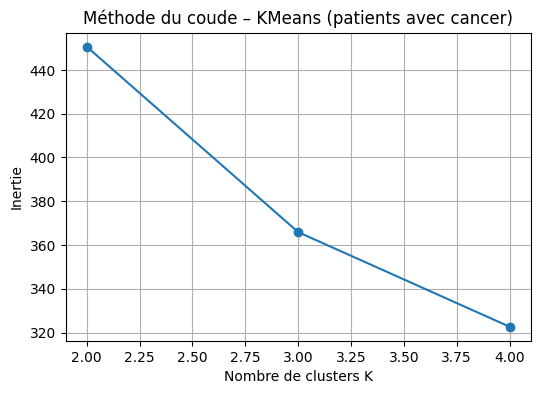

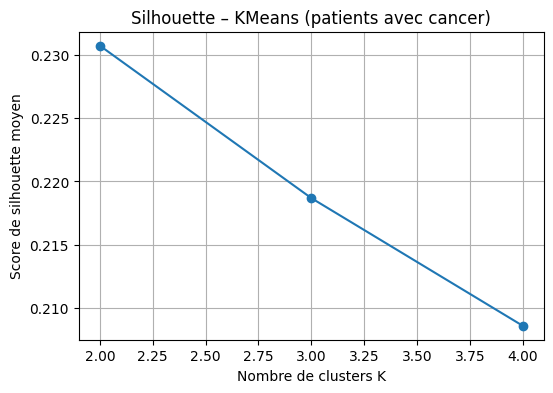

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
K_range = range(2, 5)  # K = 2, 3, 4 pour les sous-types de cancer

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cancer_scaled)
    inertias.append(km.inertia_)
    labels = km.labels_
    sil = silhouette_score(X_cancer_scaled, labels)
    sil_scores.append(sil)
    print(f"K={k}: silhouette={sil:.3f}")

# Coude
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie")
plt.title("Méthode du coude – KMeans (patients avec cancer)")
plt.grid(True)
plt.show()

# Silhouette
plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Score de silhouette moyen")
plt.title("Silhouette – KMeans (patients avec cancer)")
plt.grid(True)
plt.show()


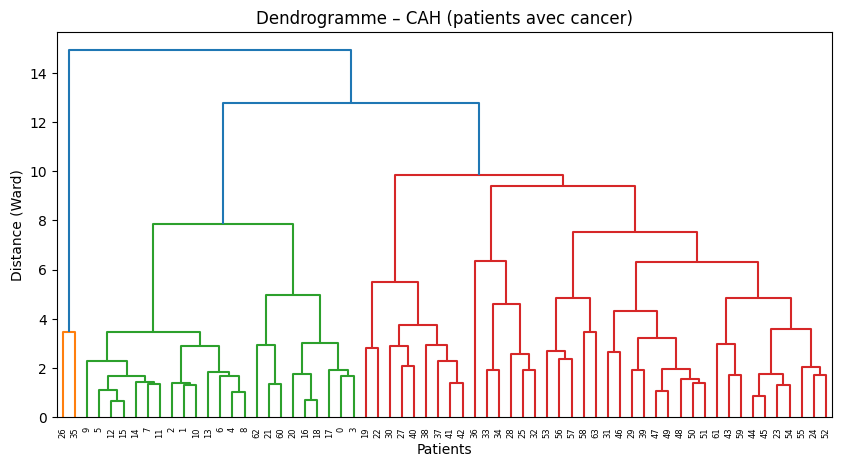

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Lien hiérarchique avec critère de Ward (adapté aux données continues standardisées)
Z = linkage(X_cancer_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode=None, color_threshold=None)
plt.title("Dendrogramme – CAH (patients avec cancer)")
plt.xlabel("Patients")
plt.ylabel("Distance (Ward)")
plt.show()


pour k=2

In [ ]:
best_k = 2

kmeans_cancer = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_cancer.fit(X_cancer_scaled)

cluster_labels_cancer = kmeans_cancer.labels_

# Ajouter les labels de cluster dans df_cancer
df_cancer["cluster_kmeans_cancer"] = cluster_labels_cancer

# Si tu veux réintégrer dans le df complet (NaN pour les non malades)
df2["cluster_kmeans_cancer"] = np.nan
df2.loc[df_cancer.index, "cluster_kmeans_cancer"] = cluster_labels_cancer


In [ ]:
# Moyenne des variables par cluster
cluster_profile = df_cancer.groupby("cluster_kmeans_cancer")[features2].mean()
print(cluster_profile)

# Nombre de patientes par cluster
print(df_cancer["cluster_kmeans_cancer"].value_counts())


                             Age        BMI  Glucose    Insulin      HOMA  \
cluster_kmeans_cancer                                                       
0                      52.975000  24.661490   94.875   7.094225  1.668641   
1                      62.833333  30.856824  123.375  21.544875  6.881176   

                          Leptin  Adiponectin   Resistin      MCP.1  
cluster_kmeans_cancer                                                
0                      16.935700    10.423703  16.408309  494.80115  
1                      42.697867     9.456941  18.662891  676.70875  
cluster_kmeans_cancer
0    40
1    24
Name: count, dtype: int64


In [ ]:
from sklearn.decomposition import PCA

# Projection PCA 2D pour les patientes avec cancer
pca_vis = PCA(n_components=2)
X_cancer_pca = pca_vis.fit_transform(X_cancer_scaled)

# IMPORTANT : ajouter les colonnes dans df_cancer
df_cancer = df_cancer.copy()
df_cancer["PC1"] = X_cancer_pca[:, 0]
df_cancer["PC2"] = X_cancer_pca[:, 1]


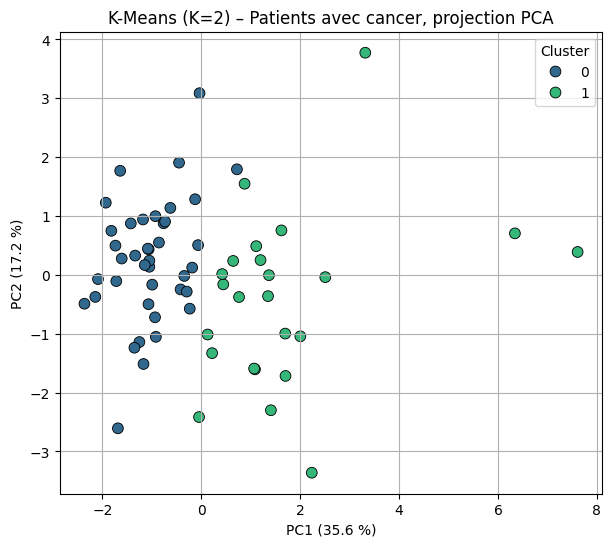

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1", y="PC2",
    hue="cluster_kmeans_cancer",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_vis.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_vis.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("K-Means (K=2) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Cluster 0:

Younger age, lower BMI, and significantly lower Glucose, Insulin, and HOMA than Cluster 1 $\rightarrow$ less disturbed metabolic profile.Leptin, Resistin, and MCP.1 are also lower, which is consistent with more moderate obesity/inflammation.A coherent name: "Cancers with Moderate Metabolic Risk" or "Moderate Metabolic Subtype."

Cluster 1:

Higher average age ($\approx 63$ years vs. $\approx 53$ years), significantly higher BMI ($\approx 31$), very high Glucose ($\approx 123$), and Insulin and HOMA multiplied by 3–4 $\rightarrow$ strong insulin resistance / metabolic syndrome.Leptin and MCP.1 are much higher, Resistin is also higher $\rightarrow$ profile of marked obesity and greater systemic inflammation.A coherent name: "Cancers with High Metabolic Risk (Obesity and Insulin Resistance)" or, shorter, "Severe Metabolic Subtype."

pour k=3

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# On part de df_cancer, features, X_cancer_scaled déjà définis
best_k = 3

kmeans_cancer_3 = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_cancer_3.fit(X_cancer_scaled)

cluster_labels_cancer_3 = kmeans_cancer_3.labels_
df_cancer["cluster_kmeans_cancer_3"] = cluster_labels_cancer_3

# Qualité interne
sil_3 = silhouette_score(X_cancer_scaled, cluster_labels_cancer_3)
print("Silhouette K=3 (cancers) :", sil_3)


Silhouette K=3 (cancers) : 0.21868320395349716


In [ ]:
df_cancer.head(50)

Age        BMI  Glucose  Insulin       HOMA   Leptin  Adiponectin  \
52    45  21.303949      102   13.852   3.485163   7.6476    21.056625   
53    45  20.829995       74    4.560   0.832352   7.7529     8.237405   
54    49  20.956608       94   12.305   2.853119  11.2406     8.412175   
55    34  24.242424       92   21.699   4.924226  16.7353    21.823745   
56    42  21.359915       93    2.999   0.687971  19.0826     8.462915   
57    68  21.082813      102    6.200   1.559920   9.6994     8.574655   
58    51  19.132653       93    4.364   1.001102  11.0816     5.807620   
59    62  22.656250       92    3.482   0.790182   9.8648    11.236235   
60    38  22.499637       95    5.261   1.232828   8.4380     4.771920   
61    69  21.513859      112    6.683   1.846290  32.5800     4.138025   
62    49  21.367521       78    2.640   0.507936   6.3339     3.886145   
63    51  22.892820      103    2.740   0.696143   8.0163     9.349775   
64    59  22.832879       98    6.862   1.658774  14.9037     4.230105   
65    45  23.140496      116    4.902   1.402626  17.9973     4.294705   
66    54  24.218750       86    3.730   0.791257   8.6874     3.705230   
67    64  22.222222       98    5.700   1.377880  12.1905     4.783985   
68    46  20.830000       88    3.420   0.742368  12.8700    18.550000   
69    44  19.560000      114   15.890   4.468268  13.0800    20.370000   
70    45  20.260000       92    3.440   0.780651   7.6500    16.670000   
71    44  24.740000      106   58.460  15.285341  18.1600    16.100000   
72    51  18.370000      105    6.030   1.561770   9.6200    12.760000   
73    72  23.620000      105    4.420   1.144780  21.7800    17.860000   
74    46  22.210000       86   36.940   7.836205  10.1600     9.760000   
75    43  26.562500      101   10.555   2.629602   9.8000     6.420295   
76    55  31.975015       92   16.635   3.775036  37.2234    11.018455   
77    43  31.250000      103    4.328   1.099601  25.7816    12.718960   
78    86  26.666667      201   41.611  20.630734  47.6470     5.357135   
79    41  26.672763       97   22.033   5.271762  44.7059    13.494865   
80    59  28.672626       77    3.188   0.605507  17.0220    16.440480   
81    81  31.640368      100    9.669   2.385020  38.8066    10.636525   
82    48  32.461911       99   28.677   7.002923  46.0760    21.570000   
83    71  25.510204      112   10.395   2.871792  19.0653     5.486100   
84    42  29.296875       98    4.172   1.008511  12.2617     6.695585   
85    65  29.666548       85   14.649   3.071407  26.5166     7.282870   
86    48  28.125000       90    2.540   0.563880  15.5325    10.222310   
87    85  27.688778      196   51.814  25.050342  70.8824     7.901685   
88    48  31.250000      199   12.162   5.969920  18.1314     4.104105   
89    58  29.154519      139   16.582   5.685415  22.8884    10.262660   
90    40  30.836531      128   41.894  13.227332  31.0385     6.160995   
91    82  31.217482      100   18.077   4.458993  31.6453     9.923650   
92    52  30.801249       87   30.212   6.483495  29.2739     6.268540   
93    49  32.461911      134   24.887   8.225983  42.3914    10.793940   
94    60  31.231410      131   30.130   9.736007  37.8430     8.404430   
95    49  29.777778       70    8.396   1.449709  51.3387    10.731740   
96    44  27.887617       99    9.208   2.248594  12.6757     5.478170   
97    40  27.636054      103    2.432   0.617890  14.3224     6.783870   
98    71  27.915519      104   18.200   4.668907  53.4997     1.656020   
99    69  28.444444      108    8.808   2.346451  14.7485     5.288025   
100   74  28.650138       88    3.012   0.653805  31.1233     7.652220   
101   66  26.562500       89    6.524   1.432235  14.9084     8.429960   

     Resistin     MCP.1  Classification  cluster_kmeans_cancer       PC1  \
52   23.03408   552.444               2                      0 -1.050763   
53   28.03230   382.955               2                      0 -1.931268   
54

In [ ]:
# Nombre de patientes par cluster
print(df_cancer["cluster_kmeans_cancer_3"].value_counts())

# Moyenne des variables par cluster
cluster_profile_3 = df_cancer.groupby("cluster_kmeans_cancer_3")[features2].mean()
print(cluster_profile_3)


cluster_kmeans_cancer_3
0    39
1    22
2     3
Name: count, dtype: int64
                               Age        BMI     Glucose    Insulin  \
cluster_kmeans_cancer_3                                                
0                        53.076923  24.530303   95.512821   7.060846   
1                        60.818182  31.124368  110.681818  19.085727   
2                        73.000000  28.535148  198.666667  35.195667   

                              HOMA     Leptin  Adiponectin   Resistin  \
cluster_kmeans_cancer_3                                                 
0                         1.674255  16.053572    10.415805  16.296522   
1                         5.224861  42.701214    10.015245  15.248236   
2                        17.216999  45.553600     5.787642  44.405400   

                               MCP.1  
cluster_kmeans_cancer_3               
0                         492.040000  
1                         562.193500  
2                        1491.746333  


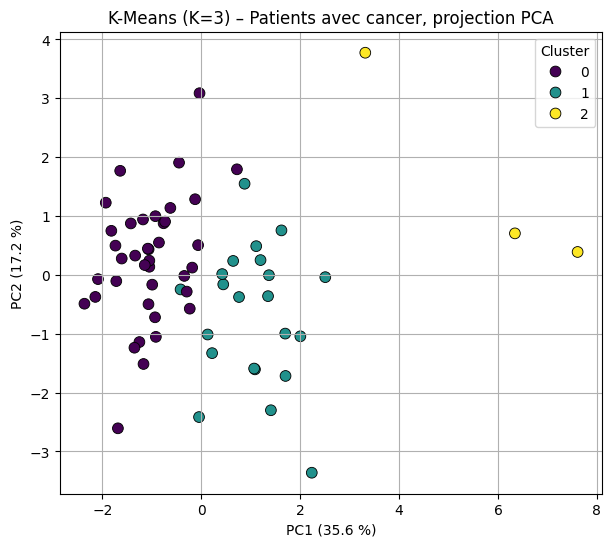

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca_vis_3 = PCA(n_components=2)
X_cancer_pca_3 = pca_vis_3.fit_transform(X_cancer_scaled)

df_cancer["PC1_3"] = X_cancer_pca_3[:, 0]
df_cancer["PC2_3"] = X_cancer_pca_3[:, 1]

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_3", y="PC2_3",
    hue="cluster_kmeans_cancer_3",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_vis_3.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_vis_3.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("K-Means (K=3) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


Cluster 0:

"Moderate Metabolic Cancers"
The least disturbed metabolic profile among the patients.

Cluster 1:

 "Intermediate Metabolic Risk Cancers"
Clear but not extreme metabolic anomalies, the central group.

Cluster 2:

"Severe Metabolic Cancers (Extreme Profiles)"
A few patients with very marked dysregulations, located at the extreme end of PC1.

IV.2.2 : Model 2 (Agglomerative)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Modèle CAH avec k = 3
agg_cancer_3 = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"       # euclidean + Ward
)

labels_agg_3 = agg_cancer_3.fit_predict(X_cancer_scaled)

# Ajouter les labels dans df_cancer
df_cancer["cluster_agg_3"] = labels_agg_3

# (optionnel) remettre dans le df complet
df["cluster_agg_3"] = np.nan
df.loc[df_cancer.index, "cluster_agg_3"] = labels_agg_3

# Silhouette pour évaluer la qualité (facultatif mais utile pour comparaison avec KMeans)
sil_agg_3 = silhouette_score(X_cancer_scaled, labels_agg_3)
print("Silhouette CAH k= :", sil_agg_3)


Silhouette CAH k= : 0.16333552353660807


In [ ]:
df_cancer.head(50)

Age        BMI  Glucose  Insulin       HOMA   Leptin  Adiponectin  \
52    45  21.303949      102   13.852   3.485163   7.6476    21.056625   
53    45  20.829995       74    4.560   0.832352   7.7529     8.237405   
54    49  20.956608       94   12.305   2.853119  11.2406     8.412175   
55    34  24.242424       92   21.699   4.924226  16.7353    21.823745   
56    42  21.359915       93    2.999   0.687971  19.0826     8.462915   
57    68  21.082813      102    6.200   1.559920   9.6994     8.574655   
58    51  19.132653       93    4.364   1.001102  11.0816     5.807620   
59    62  22.656250       92    3.482   0.790182   9.8648    11.236235   
60    38  22.499637       95    5.261   1.232828   8.4380     4.771920   
61    69  21.513859      112    6.683   1.846290  32.5800     4.138025   
62    49  21.367521       78    2.640   0.507936   6.3339     3.886145   
63    51  22.892820      103    2.740   0.696143   8.0163     9.349775   
64    59  22.832879       98    6.862   1.658774  14.9037     4.230105   
65    45  23.140496      116    4.902   1.402626  17.9973     4.294705   
66    54  24.218750       86    3.730   0.791257   8.6874     3.705230   
67    64  22.222222       98    5.700   1.377880  12.1905     4.783985   
68    46  20.830000       88    3.420   0.742368  12.8700    18.550000   
69    44  19.560000      114   15.890   4.468268  13.0800    20.370000   
70    45  20.260000       92    3.440   0.780651   7.6500    16.670000   
71    44  24.740000      106   58.460  15.285341  18.1600    16.100000   
72    51  18.370000      105    6.030   1.561770   9.6200    12.760000   
73    72  23.620000      105    4.420   1.144780  21.7800    17.860000   
74    46  22.210000       86   36.940   7.836205  10.1600     9.760000   
75    43  26.562500      101   10.555   2.629602   9.8000     6.420295   
76    55  31.975015       92   16.635   3.775036  37.2234    11.018455   
77    43  31.250000      103    4.328   1.099601  25.7816    12.718960   
78    86  26.666667      201   41.611  20.630734  47.6470     5.357135   
79    41  26.672763       97   22.033   5.271762  44.7059    13.494865   
80    59  28.672626       77    3.188   0.605507  17.0220    16.440480   
81    81  31.640368      100    9.669   2.385020  38.8066    10.636525   
82    48  32.461911       99   28.677   7.002923  46.0760    21.570000   
83    71  25.510204      112   10.395   2.871792  19.0653     5.486100   
84    42  29.296875       98    4.172   1.008511  12.2617     6.695585   
85    65  29.666548       85   14.649   3.071407  26.5166     7.282870   
86    48  28.125000       90    2.540   0.563880  15.5325    10.222310   
87    85  27.688778      196   51.814  25.050342  70.8824     7.901685   
88    48  31.250000      199   12.162   5.969920  18.1314     4.104105   
89    58  29.154519      139   16.582   5.685415  22.8884    10.262660   
90    40  30.836531      128   41.894  13.227332  31.0385     6.160995   
91    82  31.217482      100   18.077   4.458993  31.6453     9.923650   
92    52  30.801249       87   30.212   6.483495  29.2739     6.268540   
93    49  32.461911      134   24.887   8.225983  42.3914    10.793940   
94    60  31.231410      131   30.130   9.736007  37.8430     8.404430   
95    49  29.777778       70    8.396   1.449709  51.3387    10.731740   
96    44  27.887617       99    9.208   2.248594  12.6757     5.478170   
97    40  27.636054      103    2.432   0.617890  14.3224     6.783870   
98    71  27.915519      104   18.200   4.668907  53.4997     1.656020   
99    69  28.444444      108    8.808   2.346451  14.7485     5.288025   
100   74  28.650138       88    3.012   0.653805  31.1233     7.652220   
101   66  26.562500       89    6.524   1.432235  14.9084     8.429960   

     Resistin     MCP.1  Classification  cluster_kmeans_cancer       PC1  \
52   23.03408   552.444               2                      0 -1.050763   
53   28.03230   382.955               2                      0 -1.931268   
54

In [ ]:
cluster_profile_agg_3 = df_cancer.groupby("cluster_agg_3")[features2].mean()
print(cluster_profile_agg_3)

print(df_cancer["cluster_agg_3"].value_counts())


                     Age        BMI     Glucose    Insulin       HOMA  \
cluster_agg_3                                                           
0              57.410256  29.880644  106.282051  14.330564   3.850754   
1              85.500000  27.177722  198.500000  46.712500  22.840538   
2              52.913043  22.057513   96.260870   6.457783   1.566669   

                 Leptin  Adiponectin   Resistin        MCP.1  
cluster_agg_3                                                 
0              32.79450     9.141144  19.044226   606.100231  
1              59.26470     6.629410  39.792700  1388.399500  
2              13.24617    11.919620  12.257892   418.189043  
cluster_agg_3
0    39
2    23
1     2
Name: count, dtype: int64


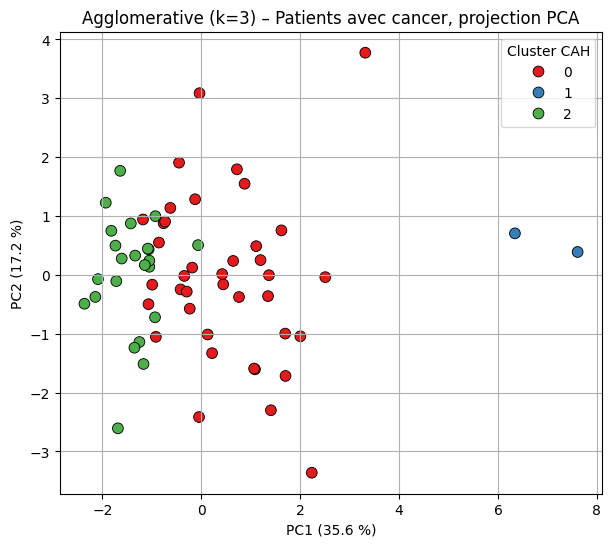

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# On part de X_cancer_scaled (patients avec cancer, standardisées)
pca_agg = PCA(n_components=2)
X_cancer_pca_agg = pca_agg.fit_transform(X_cancer_scaled)

# Ajouter les composantes au df_cancer
df_cancer["PC1_agg"] = X_cancer_pca_agg[:, 0]
df_cancer["PC2_agg"] = X_cancer_pca_agg[:, 1]

plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_agg", y="PC2_agg",
    hue="cluster_agg_3",        # labels CAH (0 et 1)
    palette="Set1",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_agg.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_agg.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("Agglomerative (k=3) – Patients avec cancer, projection PCA")
plt.legend(title="Cluster CAH")
plt.grid(True)
plt.show()


IV.2.3 : Model 3 (Gaussian Mixture Model)

GMM k=2: silhouette=0.258
GMM k=3: silhouette=0.168
GMM k=4: silhouette=0.152


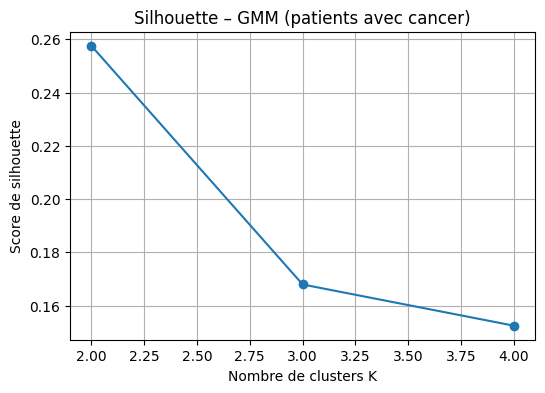

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Tester k = 2, 3, 4
K_range = range(2, 5)
sil_scores_gmm = []

for k in K_range:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type="full",
        random_state=42
    )
    gmm.fit(X_cancer_scaled)

    labels = gmm.predict(X_cancer_scaled)
    sil = silhouette_score(X_cancer_scaled, labels)
    sil_scores_gmm.append(sil)

    print(f"GMM k={k}: silhouette={sil:.3f}")

# Graphique silhouette
plt.figure(figsize=(6, 4))
plt.plot(K_range, sil_scores_gmm, marker='o')
plt.xlabel("Nombre de clusters K")
plt.ylabel("Score de silhouette")
plt.title("Silhouette – GMM (patients avec cancer)")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Choisir le meilleur k
best_k_gmm = 3   # (ou le meilleur selon silhouette)

gmm_final = GaussianMixture(
    n_components=best_k_gmm,
    covariance_type="full",
    random_state=42
)
gmm_final.fit(X_cancer_scaled)

# Labels clusters
labels_gmm = gmm_final.predict(X_cancer_scaled)

# Ajouter au df_cancer
df_cancer["cluster_gmm"] = labels_gmm

# Intégrer dans df complet
df["cluster_gmm"] = np.nan
df.loc[df_cancer.index, "cluster_gmm"] = labels_gmm

# Qualité du clustering
sil_gmm = silhouette_score(X_cancer_scaled, labels_gmm)
print("Silhouette GMM :", sil_gmm)

# Nombre de patientes par cluster
print(df_cancer["cluster_gmm"].value_counts())

# Profil moyen des clusters
cluster_profile_gmm = df_cancer.groupby("cluster_gmm")[features2].mean()
print(cluster_profile_gmm)


Silhouette GMM : 0.16794200374270676
cluster_gmm
0    38
1    16
2    10
Name: count, dtype: int64
                   Age        BMI     Glucose    Insulin      HOMA     Leptin  \
cluster_gmm                                                                     
0            55.236842  26.287609   94.736842   7.391053  1.739184  21.215153   
1            63.625000  31.181117  136.812500  22.157187  7.840632  46.906756   
2            51.000000  22.919637   96.700000  16.547100  4.035479  14.549290   

             Adiponectin   Resistin       MCP.1  
cluster_gmm                                      
0               7.739978  18.645044  585.524711  
1               9.527198  19.263164  659.854625  
2              19.736037   8.751942  322.544300  


In [ ]:
df_cancer.head(50)

Age        BMI  Glucose  Insulin       HOMA   Leptin  Adiponectin  \
52    45  21.303949      102   13.852   3.485163   7.6476    21.056625   
53    45  20.829995       74    4.560   0.832352   7.7529     8.237405   
54    49  20.956608       94   12.305   2.853119  11.2406     8.412175   
55    34  24.242424       92   21.699   4.924226  16.7353    21.823745   
56    42  21.359915       93    2.999   0.687971  19.0826     8.462915   
57    68  21.082813      102    6.200   1.559920   9.6994     8.574655   
58    51  19.132653       93    4.364   1.001102  11.0816     5.807620   
59    62  22.656250       92    3.482   0.790182   9.8648    11.236235   
60    38  22.499637       95    5.261   1.232828   8.4380     4.771920   
61    69  21.513859      112    6.683   1.846290  32.5800     4.138025   
62    49  21.367521       78    2.640   0.507936   6.3339     3.886145   
63    51  22.892820      103    2.740   0.696143   8.0163     9.349775   
64    59  22.832879       98    6.862   1.658774  14.9037     4.230105   
65    45  23.140496      116    4.902   1.402626  17.9973     4.294705   
66    54  24.218750       86    3.730   0.791257   8.6874     3.705230   
67    64  22.222222       98    5.700   1.377880  12.1905     4.783985   
68    46  20.830000       88    3.420   0.742368  12.8700    18.550000   
69    44  19.560000      114   15.890   4.468268  13.0800    20.370000   
70    45  20.260000       92    3.440   0.780651   7.6500    16.670000   
71    44  24.740000      106   58.460  15.285341  18.1600    16.100000   
72    51  18.370000      105    6.030   1.561770   9.6200    12.760000   
73    72  23.620000      105    4.420   1.144780  21.7800    17.860000   
74    46  22.210000       86   36.940   7.836205  10.1600     9.760000   
75    43  26.562500      101   10.555   2.629602   9.8000     6.420295   
76    55  31.975015       92   16.635   3.775036  37.2234    11.018455   
77    43  31.250000      103    4.328   1.099601  25.7816    12.718960   
78    86  26.666667      201   41.611  20.630734  47.6470     5.357135   
79    41  26.672763       97   22.033   5.271762  44.7059    13.494865   
80    59  28.672626       77    3.188   0.605507  17.0220    16.440480   
81    81  31.640368      100    9.669   2.385020  38.8066    10.636525   
82    48  32.461911       99   28.677   7.002923  46.0760    21.570000   
83    71  25.510204      112   10.395   2.871792  19.0653     5.486100   
84    42  29.296875       98    4.172   1.008511  12.2617     6.695585   
85    65  29.666548       85   14.649   3.071407  26.5166     7.282870   
86    48  28.125000       90    2.540   0.563880  15.5325    10.222310   
87    85  27.688778      196   51.814  25.050342  70.8824     7.901685   
88    48  31.250000      199   12.162   5.969920  18.1314     4.104105   
89    58  29.154519      139   16.582   5.685415  22.8884    10.262660   
90    40  30.836531      128   41.894  13.227332  31.0385     6.160995   
91    82  31.217482      100   18.077   4.458993  31.6453     9.923650   
92    52  30.801249       87   30.212   6.483495  29.2739     6.268540   
93    49  32.461911      134   24.887   8.225983  42.3914    10.793940   
94    60  31.231410      131   30.130   9.736007  37.8430     8.404430   
95    49  29.777778       70    8.396   1.449709  51.3387    10.731740   
96    44  27.887617       99    9.208   2.248594  12.6757     5.478170   
97    40  27.636054      103    2.432   0.617890  14.3224     6.783870   
98    71  27.915519      104   18.200   4.668907  53.4997     1.656020   
99    69  28.444444      108    8.808   2.346451  14.7485     5.288025   
100   74  28.650138       88    3.012   0.653805  31.1233     7.652220   
101   66  26.562500       89    6.524   1.432235  14.9084     8.429960   

     Resistin     MCP.1  Classification  cluster_kmeans_cancer       PC1  \
52   23.03408   552.444               2                      0 -1.050763   
53   28.03230   382.955               2                      0 -1.931268   
54

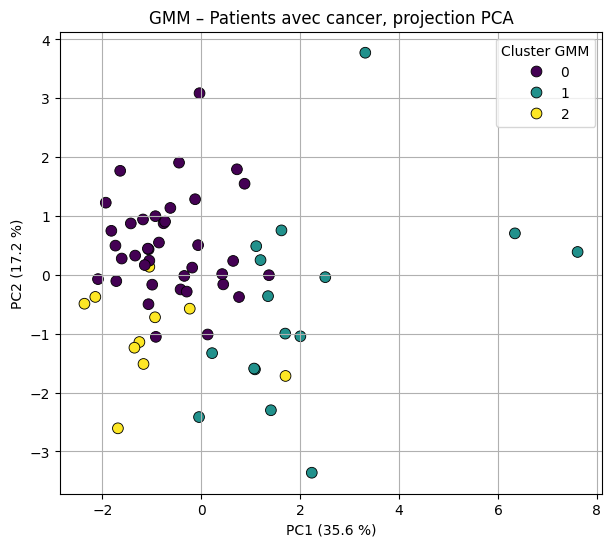

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA 2D
pca_gmm = PCA(n_components=2)
X_cancer_pca_gmm = pca_gmm.fit_transform(X_cancer_scaled)

df_cancer["PC1_gmm"] = X_cancer_pca_gmm[:, 0]
df_cancer["PC2_gmm"] = X_cancer_pca_gmm[:, 1]

# Scatterplot
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=df_cancer,
    x="PC1_gmm",
    y="PC2_gmm",
    hue="cluster_gmm",
    palette="viridis",
    s=60,
    edgecolor="k"
)
plt.xlabel(f"PC1 ({pca_gmm.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca_gmm.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("GMM – Patients avec cancer, projection PCA")
plt.legend(title="Cluster GMM")
plt.grid(True)
plt.show()


In [ ]:
cols_to_drop = ["PC1", "PC2", "PC1_3", "PC2_3", "PC1_agg", "PC2_agg", "PC1_gmm","PC2_gmm"]
df_cancer = df_cancer.drop(columns=cols_to_drop, errors="ignore")


In [ ]:
df_cancer.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
52   45  21.303949      102   13.852  3.485163   7.6476    21.056625   
53   45  20.829995       74    4.560  0.832352   7.7529     8.237405   
54   49  20.956608       94   12.305  2.853119  11.2406     8.412175   
55   34  24.242424       92   21.699  4.924226  16.7353    21.823745   
56   42  21.359915       93    2.999  0.687971  19.0826     8.462915   

    Resistin    MCP.1  Classification  cluster_kmeans_cancer  \
52  23.03408  552.444               2                      0   
53  28.03230  382.955               2                      0   
54  23.11770  573.630               2                      0   
55  12.06534  481.949               2                      0   
56  17.37615  321.919               2                      0   

    cluster_kmeans_cancer_3  cluster_agg_3  cluster_gmm  
52                        0              2            2  
53                        0              2            0  
54                        0              2            0  
55                        0              2            2  
56                        0              2            0

In [ ]:
#attribuer le cluster au non malade
df_non_cancer["cluster_kmeans_cancer"] = 3
df_non_cancer["cluster_kmeans_cancer_3"] = 3
df_non_cancer["cluster_agg_3"] = 3
df_non_cancer["cluster_gmm"] = 3

In [ ]:
df_non_cancer.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  cluster_kmeans_cancer  cluster_kmeans_cancer_3  \
0  417.114               1                      3                        3   
1  468.786               1                      3                        3   
2  554.697               1                      3                        3   
3  928.220               1                      3                        3   
4  773.920               1                      3                        3   

   cluster_agg_3  cluster_gmm  
0              3            3  
1              3            3  
2              3            3  
3              3            3  
4              3            3

In [ ]:
#fusionner les dfs
df_complet = pd.concat([df_cancer, df_non_cancer], axis=0)
df_complet = df_complet.sort_index()


In [ ]:
print(df_complet["cluster_kmeans_cancer"].value_counts())
print(df_complet["cluster_kmeans_cancer_3"].value_counts())
print(df_complet["cluster_agg_3"].value_counts())
print(df_complet["cluster_gmm"].value_counts())


cluster_kmeans_cancer
3    52
0    40
1    24
Name: count, dtype: int64
cluster_kmeans_cancer_3
3    52
0    39
1    22
2     3
Name: count, dtype: int64
cluster_agg_3
3    52
0    39
2    23
1     2
Name: count, dtype: int64
cluster_gmm
3    52
0    38
1    16
2    10
Name: count, dtype: int64


##IV.3. DSO3 : Implementing a recommendation system for patient's clusters

*We are going to prepare the Coimbra Dataset for the reccomendation system*

In [ ]:
df_complete = df_complet.copy()

In [ ]:
df_complete.drop(columns=["Classification"], inplace=True)
df_complete.drop(columns=["cluster_kmeans_cancer_3"], inplace=True)
df_complete.drop(columns=["cluster_agg_3"], inplace=True)
df_complete.drop(columns=["cluster_gmm"], inplace=True)

In [ ]:
df_complete = df_complete.rename(columns={
    "cluster_kmeans_cancer": "cluster_final"
})

In [ ]:
df_complete.columns

In [ ]:
df_complete.dtypes

In [ ]:
df_complete.head()

In [162]:
df_complete.tail()

Age    BMI  Glucose  Insulin      HOMA  Leptin  Adiponectin  Resistin  \
111   45  26.85       92     3.33  0.755688   54.68        12.10     10.96   
112   62  26.84      100     4.53  1.117400   12.45        21.42      7.32   
113   65  32.05       97     5.73  1.370998   61.48        22.54     10.33   
114   72  25.59       82     2.82  0.570392   24.96        33.75      3.27   
115   86  27.18      138    19.91  6.777364   90.28        14.11      4.35   

      MCP.1  cluster_final  ...  overall_severity  \
111  268.23              0  ...          0.111111   
112  330.16              0  ...          0.222222   
113  314.05              1  ...          0.444444   
114  392.46              0  ...          0.333333   
115   90.09              1  ...          1.555556   

                                    Age_interpretation   BMI_interpretation  \
111                                Within normal range  Within normal range   
112                                Within normal range  Within normal range   
113                                Within normal range  Within normal range   
114                                Within normal range  Within normal range   
115  High: Increased cancer risk; prioritize screening  Within normal range   

                                Glucose_interpretation  \
111                                Within normal range   
112  High: Target glycemic control to reduce cancer...   
113                                Within normal range   
114                                Within normal range   
115  High: Target glycemic control to reduce cancer...   

                                Insulin_interpretation  \
111                                Within normal range   
112                                Within normal range   
113                                Within normal range   
114                                Within normal range   
115  High: Insulin-sensitizing drugs may reduce can...   

                                   HOMA_interpretation  \
111                                Within normal range   
112                                Within normal range   
113                                Within normal range   
114                                Within normal range   
115  High: Lifestyle modification and metformin can...   

                                 Leptin_interpretation  \
111  High: Leptin resistance in obesity; target vis...   
112                                Within normal range   
113  High: Leptin resistance in obesity; target vis...   
114                                Within normal range   
115  High: Leptin resistance in obesity; target vis...   

                            Adiponectin_interpretation  \
111                                Within normal range   
112  High: Protective; associated with better metab...   
113  High: Protective; associated with better metab...   
114  High: Protective; associated with better metab...   
115                                Within normal range   

     Resistin_interpretation                            MCP.1_interpretation  
111      Within normal range                             Within normal range  
112      Within normal range                             Within normal range  
113      Within normal range                             Within normal range  
114      Within normal range                             Within normal range  
115      Within normal range  Low: Reduced inflammatory signaling; favorable  

[5 rows x 38 columns]

In [ ]:
features = [col for col in df_complete.columns if col != "cluster_final"]
df_cancer_rec = df_complete[df_complete["cluster_final"].isin([0, 1, 2])].copy()
df_non_cancer_rec = df_complete[df_complete["cluster_final"] == 3].copy()

In [ ]:
df_non_cancer_rec.tail()

Age   BMI  Glucose  Insulin      HOMA  Leptin  Adiponectin  Resistin  \
47   78  25.3       60    3.508  0.519184   6.633    10.567295   4.66380   
48   69  29.4       89   10.704  2.349885  45.272     8.286300   4.53000   
49   85  26.6       96    4.462  1.056602   7.850     7.931700   9.61350   
50   76  27.1      110   26.211  7.111918  21.778     4.935635   8.49395   
51   77  25.9       85    4.580  0.960273  13.740     9.753260  11.77400   

      MCP.1  cluster_final  
47  209.749              3  
48  215.769              3  
49  232.006              3  
50   45.843              3  
51  488.829              3

In [ ]:
baseline_stats = df_non_cancer_rec[features].describe().T
baseline_stats = baseline_stats[['mean', 'std', 'min', 'max']]
baseline_stats['5th_percentile'] =  df_non_cancer_rec[features].quantile(0.05)
baseline_stats['95th_percentile'] = df_non_cancer_rec[features].quantile(0.95)

In [ ]:
print("=== HEALTHY REFERENCE RANGES ===")
print(baseline_stats)

=== HEALTHY REFERENCE RANGES ===
                   mean         std        min          max  5th_percentile  \
Age           58.076923   18.957999  24.000000    89.000000       28.550000   
BMI           28.317336    5.427465  18.670000    38.578759       20.953111   
Glucose       88.230769   10.191529  60.000000   118.000000       75.550000   
Insulin        6.933769    4.859793   2.707000    26.211000        3.176050   
HOMA           1.552398    1.218256   0.467409     7.111918        0.602499   
Leptin        26.637933   19.334699   4.311000    83.482100        6.669520   
Adiponectin   10.328205    7.631281   2.194280    38.040000        3.494112   
Resistin      11.614813   11.447053   3.291750    82.100000        4.142948   
MCP.1        499.730692  292.242157  45.843000  1256.083000      152.345750   

             95th_percentile  
Age                83.900000  
BMI                36.637525  
Glucose           104.350000  
Insulin            16.677800  
HOMA                3

Mean → typical healthy value

Std → natural variability

Min / Max → extreme observed healthy values


5th percentile → the lower boundary of what is still considered normal


95th percentile → the upper boundary of what is still considered normal


**the dataset contains healthy women around 58, slightly overweight (28) they have a normal metabolic glucose profile (88mg/dL) and normal insulin sensitivity (6.9µU/m)**

###How far each patient is from the healthy average

In [ ]:
def calculate_z_scores(df, baseline):
    z_scores = pd.DataFrame(index=df.index, columns=features)

    for feature in features:
        mean = baseline.loc[feature, 'mean']
        std = baseline.loc[feature, 'std']
        z_scores[feature] = (df[feature] - mean) / std

    return z_scores

z_scores_all = calculate_z_scores(df_complete, baseline_stats)


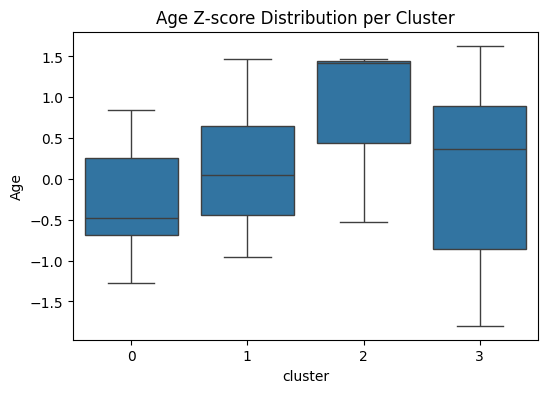

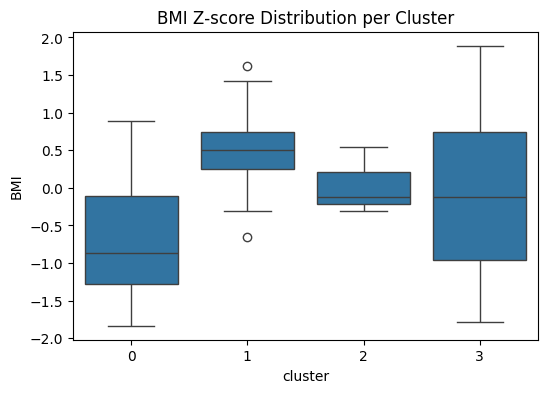

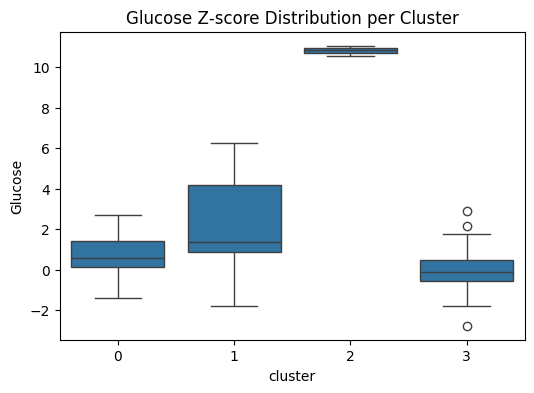

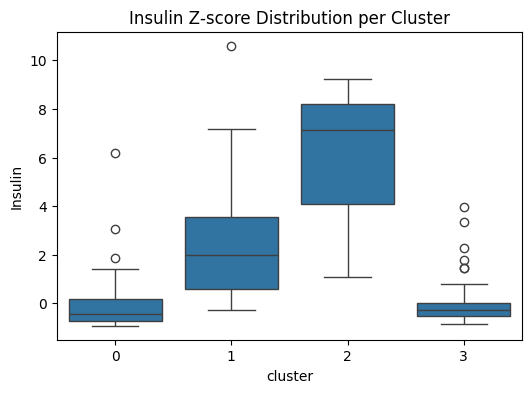

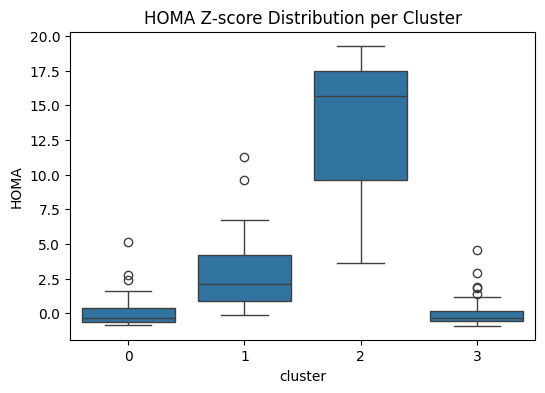

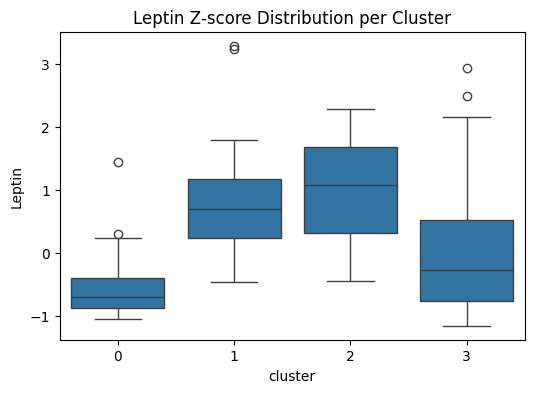

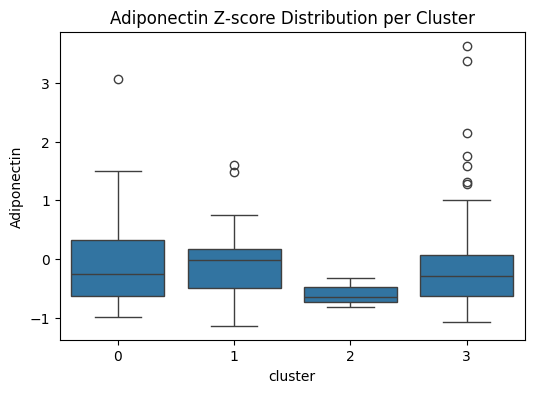

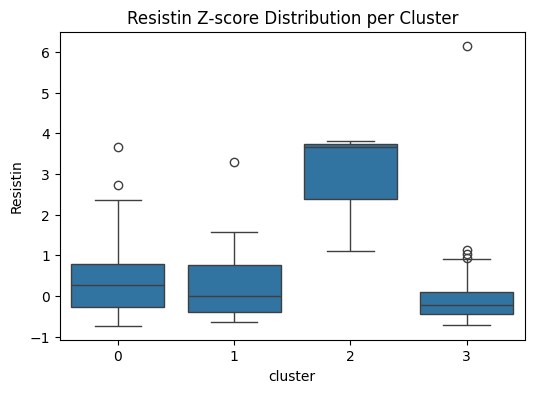

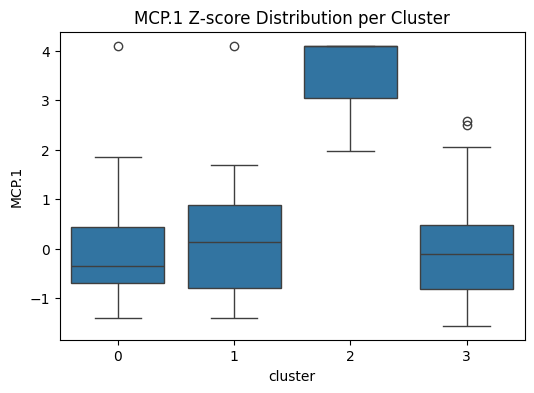

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Put all your 9 biomarkers in a list
features = ["Age","BMI","Glucose","Insulin","HOMA","Leptin",
            "Adiponectin","Resistin","MCP.1"]


df_z_with_cluster = z_scores_all.copy()
df_z_with_cluster["cluster"] = df_complete["cluster_final"]


# One boxplot per feature
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_z_with_cluster, x="cluster", y=feature)
    plt.title(f"{feature} Z‑score Distribution per Cluster")
    plt.show()


**What is shown in these plots**

Each boxplot represents the **distribution of Z-scores** for a given variable  
(**Age, BMI, Insulin, Leptin, Adiponectin, Resistin, MCP-1**) across the different clusters.

Z-scores indicate how far a patient’s value deviates from the dataset average:
- **Z = 0** → average value  
- **Z > 0** → higher than average  
- **Z < 0** → lower than average  


**Variable-specific interpretation logic**

The following interpretations apply to all boxplots:

- **Age**  
  Positive Z-scores indicate **older** patients, while negative Z-scores indicate **younger** patients.

- **BMI**  
  Higher Z-scores correspond to **higher body mass index** relative to the average.

- **Insulin & HOMA**  
  Higher Z-scores indicate **higher insulin levels** and **greater insulin resistance**.

- **Leptin & Resistin**  
  Higher Z-scores suggest **altered adipokine levels**, often associated with metabolic imbalance.

- **Adiponectin**  
  Lower Z-scores indicate **reduced levels**, commonly linked to metabolic dysfunction.

- **MCP-1**  
  Higher Z-scores reflect **increased inflammatory activity**.


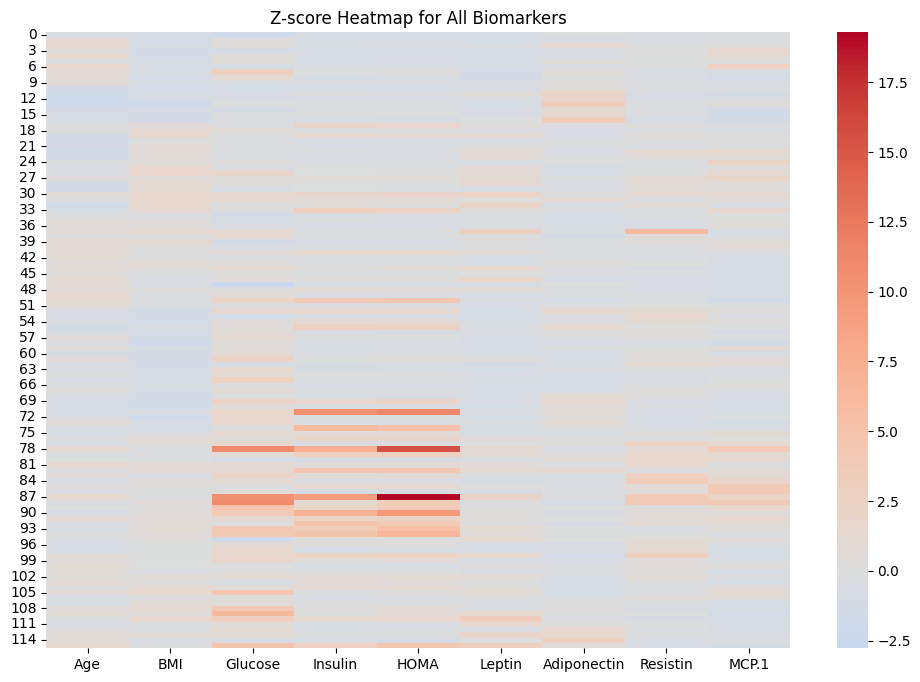

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.heatmap(z_scores_all, cmap="coolwarm", center=0)
plt.title("Z-score Heatmap for All Biomarkers")
plt.show()


**Most patients are near normal(light colors)** : biomarker values close to healthy individuals.
* 0  → the patient is close to the healthy average


* Blue → the patient is below the healthy average


* Red → the patient is above the healthy average


* Darker colors → stronger deviation


* Rows = individual patients


* Columns = biomarkers
The biggest deviation is in glucose regulation:


* High insulin


* High glucose


* High HOMA


####Convert Z-score to interpretable severity label

In [ ]:
def label_deviation(z_value):

    abs_z = abs(z_value)
    if abs_z < 1.0:
        return "Normal"
    elif abs_z < 1.5:
        return "Mild"
    elif abs_z < 2.5:
        return "Moderate"
    else:
        return "Severe"


deviation_labels = z_scores_all.applymap(label_deviation)
deviation_labels.columns = [f"{col}_deviation" for col in deviation_labels.columns]

/tmp/ipython-input-1552124486.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  deviation_labels = z_scores_all.applymap(label_deviation)


<Figure size 1400x600 with 0 Axes>

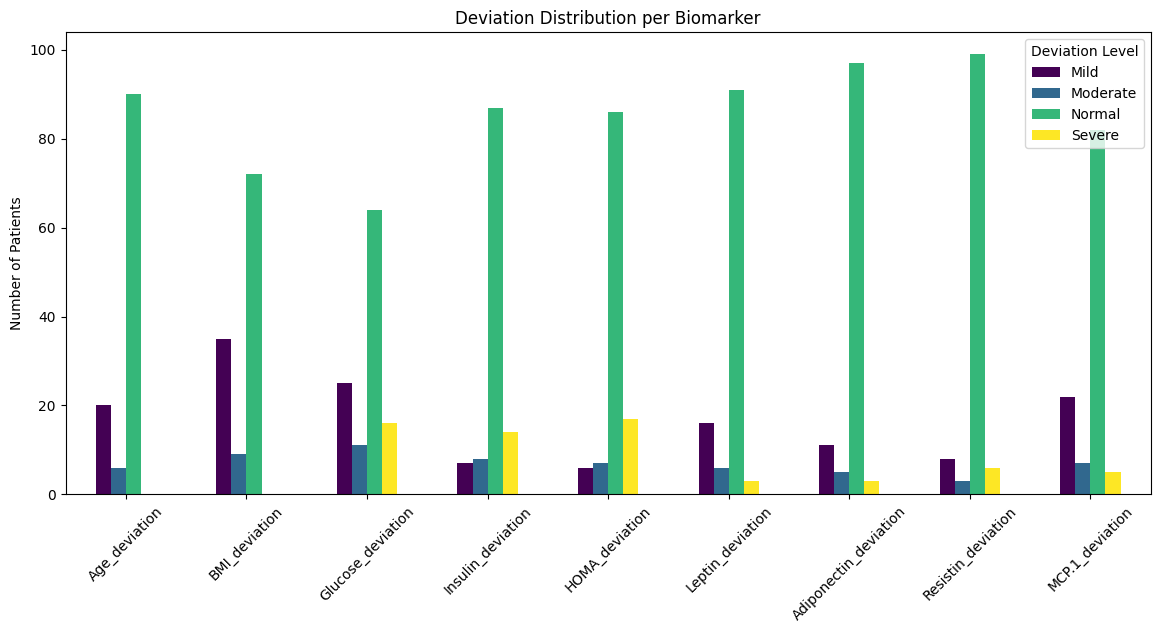

In [ ]:
import pandas as pd

plt.figure(figsize=(14, 6))
deviation_counts = deviation_labels.apply(pd.Series.value_counts)

deviation_counts.T.plot(kind="bar", figsize=(14, 6), colormap="viridis")
plt.title("Deviation Distribution per Biomarker")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.legend(title="Deviation Level")
plt.show()


create biological meaning dictioctioannry

In [ ]:
biological_meaning = {
    "Age": {
        "full_name": "Age",
        "meaning": "Patient's age in years; cancer risk increases with age",
        "unit": "years",
        "clinical_significance": "Age >50 associated with higher breast cancer risk",
        "mechanism": "Accumulation of genetic mutations over time",
        "normal_range": None,
        "interpretation": {
            "High": "Increased cancer risk; prioritize screening",
            "Low": "Lower baseline risk but not protective"
        }
    },
    "BMI": {
        "full_name": "Body Mass Index",
        "meaning": "Body fat measure; obesity linked to estrogen production and inflammation",
        "unit": "kg/m²",
        "clinical_significance": "BMI >30 increases breast cancer risk by 30-50%",
        "mechanism": "Adipose tissue produces estrogen and inflammatory cytokines",
        "normal_range": (18.5, 24.9),
        "interpretation": {
            "High": "Weight reduction reduces cancer risk and improves metabolic health",
            "Low": "Rule out malnutrition or cachexia"
        }
    },
    "Glucose": {
        "full_name": "Fasting Blood Glucose",
        "meaning": "Primary energy source; elevated in insulin resistance and diabetes",
        "unit": "mg/dL",
        "clinical_significance": "Hyperglycemia fuels cancer cell growth (Warburg effect)",
        "mechanism": "Cancer cells preferentially use glucose for rapid proliferation",
        "normal_range": (70, 100),
        "interpretation": {
            "High": "Target glycemic control to reduce cancer progression risk",
            "Low": "Risk of hypoglycemia; adjust medications"
        }
    },
    "Insulin": {
        "full_name": "Fasting Insulin",
        "meaning": "Hormone that regulates glucose uptake; elevated in insulin resistance",
        "unit": "µU/mL",
        "clinical_significance": "Hyperinsulinemia activates IGF-1 pathway promoting cancer growth",
        "mechanism": "Insulin binds to IGF-1 receptors on cancer cells, stimulating proliferation",
        "normal_range": (2.6, 24.9),
        "interpretation": {
            "High": "Insulin-sensitizing drugs may reduce cancer risk and progression",
            "Low": "Check C-peptide; may indicate beta-cell dysfunction"
        }
    },
    "HOMA": {
        "full_name": "Homeostatic Model Assessment for Insulin Resistance",
        "meaning": "Calculated index of insulin resistance; HOMA = (Glucose × Insulin) / 405",
        "unit": "ratio",
        "clinical_significance": "HOMA >2.5 indicates insulin resistance, linked to poor cancer outcomes",
        "mechanism": "Insulin resistance creates pro-growth, pro-inflammatory environment",
        "normal_range": (0.5, 2.5),
        "interpretation": {
            "High": "Lifestyle modification and metformin can improve insulin sensitivity",
            "Low": "Normal insulin sensitivity; maintain healthy habits"
        }
    },
    "Leptin": {
        "full_name": "Leptin",
        "meaning": "Satiety hormone from adipose tissue; signals energy stores to brain",
        "unit": "ng/mL",
        "clinical_significance": "Elevated leptin in obesity promotes cancer via JAK/STAT pathway",
        "mechanism": "Leptin activates pro-survival and anti-apoptotic signals in cancer cells",
        "normal_range": (4, 25),
        "interpretation": {
            "High": "Leptin resistance in obesity; target visceral fat reduction",
            "Low": "May indicate low body fat or leptin deficiency"
        }
    },
    "Adiponectin": {
        "full_name": "Adiponectin",
        "meaning": "Anti-inflammatory adipokine; inversely related to body fat",
        "unit": "µg/mL",
        "clinical_significance": "Low adiponectin linked to cancer risk; protective molecule",
        "mechanism": "Activates AMPK pathway, inhibits mTOR (cancer suppression)",
        "normal_range": (5, 30),
        "interpretation": {
            "High": "Protective; associated with better metabolic health",
            "Low": "Metabolic dysfunction; increase through exercise and weight loss"
        }
    },
    "Resistin": {
        "full_name": "Resistin",
        "meaning": "Pro-inflammatory protein from adipose tissue; promotes insulin resistance",
        "unit": "ng/mL",
        "clinical_significance": "Elevated in inflammation and obesity; linked to cancer progression",
        "mechanism": "Induces NF-κB pathway activation, promoting inflammation and angiogenesis",
        "normal_range": (4, 12),
        "interpretation": {
            "High": "Anti-inflammatory interventions critical; monitor CRP",
            "Low": "Low inflammatory state; favorable"
        }
    },
    "MCP.1": {
        "full_name": "Monocyte Chemoattractant Protein-1",
        "meaning": "Chemokine that recruits immune cells to sites of inflammation",
        "unit": "pg/dL",
        "clinical_significance": "Elevated MCP-1 promotes tumor-associated macrophage infiltration",
        "mechanism": "Creates pro-tumor microenvironment via M2 macrophage polarization",
        "normal_range": (300, 600),
        "interpretation": {
            "High": "Chronic inflammation; consider anti-inflammatory diet and omega-3s",
            "Low": "Reduced inflammatory signaling; favorable"
        }
    }
}


print("✓ Biological meaning dictionary created for", len(biological_meaning), "features")



✓ Biological meaning dictionary created for 9 features


Add biological Interpretations to baseline stats

In [ ]:
# Add new columns to baseline_stats
baseline_stats['biological_meaning'] = ""
baseline_stats['unit'] = ""
baseline_stats['clinical_significance'] = ""


for feature in features:
    if feature in biological_meaning:
        baseline_stats.loc[feature, 'biological_meaning'] = biological_meaning[feature]['meaning']
        baseline_stats.loc[feature, 'unit'] = biological_meaning[feature]['unit']
        baseline_stats.loc[feature, 'clinical_significance'] = biological_meaning[feature]['clinical_significance']


# Display enriched baseline
print("=" * 100)
print("ENRICHED BASELINE STATISTICS (Healthy Population Reference)")
print("=" * 100)
print(baseline_stats.head())
print("\n✓ Baseline stats enriched with biological meaning")

ENRICHED BASELINE STATISTICS (Healthy Population Reference)
              mean        std        min         max  5th_percentile  \
Age      58.076923  18.957999  24.000000   89.000000       28.550000   
BMI      28.317336   5.427465  18.670000   38.578759       20.953111   
Glucose  88.230769  10.191529  60.000000  118.000000       75.550000   
Insulin   6.933769   4.859793   2.707000   26.211000        3.176050   
HOMA      1.552398   1.218256   0.467409    7.111918        0.602499   

         95th_percentile                                 biological_meaning  \
Age            83.900000  Patient's age in years; cancer risk increases ...   
BMI            36.637525  Body fat measure; obesity linked to estrogen p...   
Glucose       104.350000  Primary energy source; elevated in insulin res...   
Insulin        16.677800  Hormone that regulates glucose uptake; elevate...   
HOMA            3.825984  Calculated index of insulin resistance; HOMA =...   

          unit                  

Add Z_score and deviation labels to df_complete

In [ ]:
for col in z_scores_all.columns:
    df_complete[f"{col}_zscore"] = z_scores_all[col]


print("✓ Z-scores added to df_complete")
print(f"  New shape: {df_complete.shape}")
print(f"  Z-score columns: {[col for col in df_complete.columns if '_zscore' in col][:3]}...")


df_complete = pd.concat([df_complete, deviation_labels], axis=1)


print("✓ Deviation labels added to df_complete")
print(f"  New shape: {df_complete.shape}")
print(f"  Deviation columns: {[col for col in df_complete.columns if '_deviation' in col][:3]}...")



✓ Z-scores added to df_complete
  New shape: (116, 19)
  Z-score columns: ['Age_zscore', 'BMI_zscore', 'Glucose_zscore']...
✓ Deviation labels added to df_complete
  New shape: (116, 28)
  Deviation columns: ['Age_deviation', 'BMI_deviation', 'Glucose_deviation']...


In [ ]:
df_complete.head()

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  cluster_final  ...  MCP.1_zscore  Age_deviation  BMI_deviation  \
0  417.114              3  ...     -0.282699         Normal         Normal   
1  468.786              3  ...     -0.105887           Mild           Mild   
2  554.697              3  ...      0.188085           Mild         Normal   
3  928.220              3  ...      1.466213         Normal           Mild   
4  773.920              3  ...      0.938226           Mild           Mild   

   Glucose_deviation  Insulin_deviation  HOMA_deviation  Leptin_deviation  \
0           Moderate             Normal          Normal            Normal   
1             Normal             Normal          Normal            Normal   
2             Normal             Normal          Normal            Normal   
3               Mild             Normal          Normal            Normal   
4             Normal             Normal          Normal              Mild   

   Adiponectin_deviation  Resistin_deviation MCP.1_deviation  
0                 Normal              Normal          Normal  
1                 Normal              Normal          Normal  
2               Moderate              Normal          Normal  
3                 Normal              Normal            Mild  
4                 Normal              Normal          Normal  

[5 rows x 28 columns]

Calculate overall seveeruty score

**Now the question is: “Overall… how sick does this patient look?”**


**This is intensity-based.**


Two patients can be in the same cluster




*  one is mildly abnormal
*  the other is very abnormal

In [ ]:
# Create severity mapping
severity_map = {
    "Normal": 0,
    "Mild": 1,
    "Moderate": 2,
    "Severe": 3
}


# Convert deviation labels to numeric scores
severity_scores = deviation_labels.applymap(lambda x: severity_map[x])


# Calculate average severity across all biomarkers for each patient
df_complete['overall_severity'] = severity_scores.mean(axis=1)


print(f"✓ Overall severity score calculated")
print(f"  Range: {df_complete['overall_severity'].min():.2f} - {df_complete['overall_severity'].max():.2f}")
print(f"  Mean: {df_complete['overall_severity'].mean():.2f}")


# Show distribution by cluster
print("\nSeverity by Cluster:")
print(df_complete.groupby('cluster_final')['overall_severity'].agg(['mean', 'std', 'min', 'max']))


# Preview some patients
print("\nExample patients with different severity levels:")
print(df_complete[['cluster_final', 'overall_severity']].head(10))




✓ Overall severity score calculated
  Range: 0.00 - 1.89
  Mean: 0.45

Severity by Cluster:
                   mean       std       min       max
cluster_final                                        
0              0.304843  0.267005  0.000000  1.111111
1              0.762626  0.358479  0.000000  1.555556
2              1.666667  0.222222  1.444444  1.888889
3              0.348291  0.286067  0.000000  1.111111

Example patients with different severity levels:
   cluster_final  overall_severity
0              3          0.222222
1              3          0.222222
2              3          0.333333
3              3          0.333333
4              3          0.333333
5              3          0.222222
6              3          0.888889
7              3          0.444444
8              3          0.333333
9              3          0.000000


/tmp/ipython-input-2481862173.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  severity_scores = deviation_labels.applymap(lambda x: severity_map[x])


#### Add Biological Interpretations for Each Patient

**We convert numerical biomarker deviations into human-readable biological
interpretations by evaluating deviation magnitude, direction (high/low),
and predefined medical knowledge for each biomarker.**




```text
┌───────────────────────────────────────────────┐
│            INPUT (Per Patient)                │
│                                               │
│  Biomarker Z-score (e.g. Glucose_zscore)      │
│                                               │
│  Example: Z = +2.1                             │
└───────────────────────┬───────────────────────┘
                        │
                        ▼
┌───────────────────────────────────────────────┐
│   Is |Z-score| < 1 ?                           │
│                                               │
│   YES → "Within normal range"                  │
│   NO  → Continue                              │
└───────────────────────┬───────────────────────┘
                        │
                        ▼
┌───────────────────────────────────────────────┐
│        Determine Direction                    │
│                                               │
│   Z-score > 0  → HIGH                         │
│   Z-score < 0  → LOW                          │
└───────────────────────┬───────────────────────┘
                        │
                        ▼
┌───────────────────────────────────────────────┐
│   Lookup Biological Meaning                   │
│                                               │
│   Feature = Glucose / Insulin / HOMA / ...    │
│   Direction = HIGH or LOW                     │
│                                               │
│   Use predefined medical interpretation       │
└───────────────────────┬───────────────────────┘
                        │
                        ▼
┌───────────────────────────────────────────────┐
│        OUTPUT (Human Explanation)              │
│                                               │
│   "High glucose → impaired regulation"        │
│   "Low adiponectin → metabolic risk"           │
│                                               │
│   One sentence per biomarker                  │
└───────────────────────────────────────────────┘


In [ ]:
def interpret_deviation(feature, z_score):
    """Get biological interpretation for a specific deviation"""
    if abs(z_score) < 1.0:
        return "Within normal range"


    direction = "High" if z_score > 0 else "Low"


    if feature in biological_meaning:
        interpretation = biological_meaning[feature]["interpretation"].get(
            direction,
            "Abnormal value - consult specialist"
        )
        return f"{direction}: {interpretation}"


    return f"{direction} value detected"


#### Add interpretation columns for each feature

In [ ]:
print("Adding interpretation columns...")
for feature in features:
    df_complete[f"{feature}_interpretation"] = df_complete.apply(
        lambda row: interpret_deviation(feature, row[f"{feature}_zscore"]),
        axis=1
    )


print(f"✓ Biological interpretations added for {len(features)} features")


Adding interpretation columns...
✓ Biological interpretations added for 9 features


In [ ]:
print("\n" + "-"*80)
print("EXAMPLE: Patient Interpretations")
print("-"*80)
sample_patient_idx = df_cancer_rec.index[0]  # First cancer patient
print(f"\nPatient ID: {sample_patient_idx}")
print(f"Cluster: {df_complete.loc[sample_patient_idx, 'cluster_final']}")
print(f"Overall Severity: {df_complete.loc[sample_patient_idx, 'overall_severity']:.2f}")


print("\nBiomarker Interpretations:")
for feature in ['Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin']:
    value = df_complete.loc[sample_patient_idx, feature]
    zscore = df_complete.loc[sample_patient_idx, f"{feature}_zscore"]
    deviation = df_complete.loc[sample_patient_idx, f"{feature}_deviation"]
    interpretation = df_complete.loc[sample_patient_idx, f"{feature}_interpretation"]


    print(f"\n{feature}:")
    print(f"  Value: {value:.2f} | Z-score: {zscore:.2f} | Severity: {deviation}")
    print(f"  → {interpretation}")


--------------------------------------------------------------------------------
EXAMPLE: Patient Interpretations
--------------------------------------------------------------------------------

Patient ID: 52
Cluster: 0
Overall Severity: 0.67

Biomarker Interpretations:

Glucose:
  Value: 102.00 | Z-score: 1.35 | Severity: Mild
  → High: Target glycemic control to reduce cancer progression risk

Insulin:
  Value: 13.85 | Z-score: 1.42 | Severity: Mild
  → High: Insulin-sensitizing drugs may reduce cancer risk and progression

HOMA:
  Value: 3.49 | Z-score: 1.59 | Severity: Moderate
  → High: Lifestyle modification and metformin can improve insulin sensitivity

Leptin:
  Value: 7.65 | Z-score: -0.98 | Severity: Normal
  → Within normal range

Adiponectin:
  Value: 21.06 | Z-score: 1.41 | Severity: Mild
  → High: Protective; associated with better metabolic health


####Profile clusters with biological meaning

In [ ]:
# Calculate mean Z-scores for each cluster (cancer patients only)
z_scores_cancer = z_scores_all.loc[df_cancer_rec.index]


cluster_z_profiles = z_scores_cancer.groupby(
    df_complete.loc[df_cancer_rec.index, 'cluster_final']
).mean()


print("Mean Z-Scores by Cluster:")
print(cluster_z_profiles.round(2))


# Detailed cluster profiling
cluster_profiles = []


for cluster_id in sorted(df_cancer_rec['cluster_final'].unique()):
    print("\n" + "="*80)
    print(f"CLUSTER {cluster_id} PROFILE")
    print("="*80)


    # Get patients in this cluster
    cluster_patients = df_complete[df_complete['cluster_final'] == cluster_id]
    n_patients = len(cluster_patients)


    print(f"Number of patients: {n_patients}")
    print(f"Average severity: {cluster_patients['overall_severity'].mean():.2f}")


    # Get mean Z-scores for this cluster
    cluster_z_mean = cluster_z_profiles.loc[cluster_id]


    # Identify top 3 most abnormal features (by absolute Z-score)
    top_features = cluster_z_mean.abs().nlargest(3)


    print(f"\nTop 3 Defining Abnormalities:")
    print("-" * 80)


    profile_data = {
        "cluster_id": int(cluster_id),
        "n_patients": n_patients,
        "avg_severity": float(cluster_patients['overall_severity'].mean()),
        "top_abnormalities": []
    }


    for rank, (feature, abs_z) in enumerate(top_features.items(), 1):
        z_score = cluster_z_mean[feature]
        direction = "Elevated" if z_score > 0 else "Reduced"


        print(f"\n{rank}. {feature} ({direction})")
        print(f"   Z-score: {z_score:.2f} standard deviations from healthy mean")
        print(f"   Meaning: {biological_meaning[feature]['meaning']}")
        print(f"   Mechanism: {biological_meaning[feature]['mechanism']}")
        print(f"   Clinical Significance: {biological_meaning[feature]['clinical_significance']}")


        profile_data["top_abnormalities"].append({
            "feature": feature,
            "z_score": float(z_score),
            "direction": direction,
            "meaning": biological_meaning[feature]['meaning'],
            "mechanism": biological_meaning[feature]['mechanism']
        })


    cluster_profiles.append(profile_data)


# Store cluster profiles for later use
print("\n" + "="*80)
print("✓ Cluster profiles created with biological context")
print(f"  {len(cluster_profiles)} cancer clusters characterized")



Mean Z-Scores by Cluster:
                Age   BMI  Glucose  Insulin   HOMA  Leptin  Adiponectin  \
cluster_final                                                             
0             -0.26 -0.70     0.71     0.03   0.10   -0.55         0.01   
1              0.14  0.52     2.20     2.50   3.01    0.83        -0.04   
2              0.79  0.04    10.84     5.82  12.86    0.98        -0.59   

               Resistin  MCP.1  
cluster_final                   
0                  0.41  -0.03  
1                  0.32   0.21  
2                  2.86   3.39  

CLUSTER 0 PROFILE
Number of patients: 39
Average severity: 0.30

Top 3 Defining Abnormalities:
--------------------------------------------------------------------------------

1. Glucose (Elevated)
   Z-score: 0.71 standard deviations from healthy mean
   Meaning: Primary energy source; elevated in insulin resistance and diabetes
   Mechanism: Cancer cells preferentially use glucose for rapid proliferation
   Clinical Significa

**Cluster-Based Metabolic Profiles in Cancer Patients**

**🔹 CLUSTER 0: "Metabolically Favorable Cancer Patients**
- **n = 39**, **severity = 0.30**
- ✅ Slightly elevated glucose (0.71σ) – mild concern  
- ✅ LOWER BMI (-0.70σ) – protective  
- ✅ Lower Leptin (-0.55σ) – less body fat  
- ✅ Nearly normal Insulin (0.03σ), HOMA (0.10σ)  
- ✅ Normal Adiponectin (0.01σ)

**Clinical Interpretation:**  
- This group represents **good metabolic health despite cancer**.

---

**🔹 CLUSTER 1: "Classic Insulin Resistance**
- **n = 22**, **severity = 0.76**
- 🔴 HOMA severely elevated (3.01σ) – **severe insulin resistance**  
- 🔴 Insulin very high (2.50σ) – **compensatory hyperinsulinemia**  
- 🔴 Glucose high (2.20σ) – **losing glycemic control**  
- 🟡 Leptin elevated (0.83σ) – **moderate obesity**  
- 🟡 Slightly higher BMI (0.52σ)

**Clinical Interpretation:**  
- Represents patients with **metabolic syndrome + cancer**.

---

**🔹 CLUSTER 2: "Severe Metabolic Crisis**  
- **n = 3**, **severity = 1.67**
- 🚨 HOMA EXTREMELY elevated (12.86σ) – **off the charts**  
- 🚨 Glucose severely elevated (10.84σ) – **likely diabetic range**  
- 🚨 Insulin very high (5.82σ) – **body failing to compensate**  
- 🚨 Resistin very high (2.86σ) – **severe inflammation**  
- 🚨 MCP-1 very high (3.39σ) – **inflammatory storm**

**Clinical Interpretation:**  
- This is the **metabolic emergency** group.


####Knowledge base from actual coimbra cluster profiles

In [ ]:
print("="*80)
print("BUILDING KNOWLEDGE BASE FROM ACTUAL CLUSTER ANALYSIS")
print("="*80)

# Based on the real cluster profiles you provided:
cluster_strategies = {

    # ========================================================================
    # CLUSTER 0: Metabolically Favorable Cancer Patients
    # ========================================================================
    0: {
        "name": "Metabolically Favorable Profile",
        # WHY: Low severity (0.30), near-normal insulin markers, lower BMI

        "description": """Patients with relatively preserved metabolic health despite cancer diagnosis.
        Lower BMI and leptin suggest less adipose tissue dysfunction. Mild glucose elevation may be
        stress-related or early metabolic adaptation to cancer.""",

        "key_characteristics": {
            "Glucose": "Mildly elevated (0.71σ) - slight concern",
            "BMI": "Below average (-0.70σ) - protective factor",
            "Leptin": "Below average (-0.55σ) - less adiposity",
            "Insulin_Sensitivity": "Preserved (HOMA 0.10σ, Insulin 0.03σ)"
        },

        "priority_interventions": [
            # Focus: MAINTAIN good metabolic status, address mild glucose elevation

            "Monitor fasting glucose monthly to detect early insulin resistance",
            # WHY: Glucose slightly elevated; want to catch progression early

            "Maintain healthy weight - avoid both weight loss AND weight gain",
            # WHY: BMI is already lower; excessive loss could indicate cachexia

            "Balanced Mediterranean diet with emphasis on anti-cancer foods",
            # WHY: Preserve metabolic health while supporting cancer treatment

            "Moderate exercise: 150 min/week moderate-intensity aerobic + strength 2x/week",
            # WHY: Maintain insulin sensitivity without metabolic stress

            "Stress management (yoga, meditation) to address potential stress-induced hyperglycemia",
            # WHY: Mild glucose elevation may be stress-related in otherwise healthy metabolism

            "NO aggressive metabolic drugs needed at this stage"
            # WHY: Metabolic parameters are near-normal; avoid polypharmacy
        ],

        "monitoring": [
            "Fasting glucose monthly (watch for progression toward Cluster 1 pattern)",
            "HbA1c every 3 months (target <5.7%)",
            "Weight and BMI monthly (avoid cachexia)",
            "Comprehensive metabolic panel every 6 months"
        ],

        "dietary_specifics": [
            "Adequate protein 1.0-1.2 g/kg body weight (prevent muscle loss during cancer treatment)",
            "Complex carbohydrates with low glycemic index",
            "Colorful vegetables 5-7 servings/day (phytonutrients for cancer)",
            "Healthy fats from fish, nuts, olive oil",
            "Maintain caloric intake - avoid unintentional weight loss"
        ],

        "supplement_recommendations": [
            "Vitamin D3 2000 IU/day if deficient",
            "Omega-3 (EPA+DHA) 1-2g/day (anti-inflammatory, cardioprotective during chemo)",
            "Multivitamin if dietary gaps exist",
            "NO intensive metabolic supplements needed"
        ],

        "prognosis_note": "Best metabolic prognosis group. Focus on maintaining health status."
    },

    # ========================================================================
    # CLUSTER 1: Classic Insulin Resistance
    # ========================================================================
    1: {
        "name": "Insulin Resistance Dominant",
        # WHY: HOMA 3.01σ, Insulin 2.50σ, Glucose 2.20σ - classic triad

        "description": """Patients with established insulin resistance and compensatory hyperinsulinemia.
        This is the metabolic syndrome phenotype: moderate obesity, high insulin, rising glucose.
        Strong evidence that insulin-sensitizing interventions can improve cancer outcomes in this group.""",

        "key_characteristics": {
            "HOMA": "Severely elevated (3.01σ) - established insulin resistance",
            "Insulin": "Very high (2.50σ) - compensatory hyperinsulinemia",
            "Glucose": "High (2.20σ) - pre-diabetic range likely",
            "BMI": "Elevated (0.52σ) - overweight/obese",
            "Leptin": "Elevated (0.83σ) - leptin resistance from adiposity"
        },

        "priority_interventions": [
            # Focus: AGGRESSIVE insulin sensitization

            "Metformin 500mg BID, titrate to 1000mg BID over 2 weeks (REQUIRES ONCOLOGIST APPROVAL)",
            # WHY: First-line insulin sensitizer; Goodwin et al. showed 25% recurrence reduction
            # EVIDENCE: Goodwin PJ et al. J Clin Oncol. 2022;40(12):1353-1361

            "Target 7-10% body weight reduction over 6 months",
            # WHY: Weight loss improves insulin sensitivity by ~30-40%
            # EVIDENCE: Wing RR et al. Diabetes Care. 2011;34(7):1481-1486

            "Low glycemic index diet (<100g carbs/day initially)",
            # WHY: Reduces glucose spikes that worsen insulin resistance
            # EVIDENCE: Esposito K et al. Diabetologia. 2015;58(4):773-780

            "Exercise prescription: 3x/week resistance training + 150min/week brisk walking",
            # WHY: Muscle contractions increase GLUT4 translocation (insulin-independent glucose uptake)
            # EVIDENCE: Strasser B et al. Diabetes Care. 2013;36(4):872-877

            "Consider SGLT2 inhibitor (e.g., Empagliflozin 10mg/day) if glucose >120 mg/dL persistently",
            # WHY: Forces glucose excretion through urine, lowers insulin demand
            # EVIDENCE: Deng L et al. Cancer Res. 2021;81(13):3480-3493

            "Intermittent fasting 16:8 protocol (if tolerated during cancer treatment)",
            # WHY: Improves insulin sensitivity and may enhance chemotherapy efficacy
            # EVIDENCE: de Groot S et al. BMC Cancer. 2015;15:652
        ],

        "monitoring": [
            "HbA1c monthly (target <6.0%, ideally <5.7%)",
            "Fasting insulin every 2 months (target <10 µU/mL)",
            "HOMA-IR monthly (target <2.0)",
            "Fasting glucose weekly initially, then biweekly (target <100 mg/dL)",
            "Lipid panel quarterly (insulin resistance worsens dyslipidemia)",
            "Liver function tests if on metformin (every 3 months)"
        ],

        "dietary_specifics": [
            "Carbohydrates: <30% of calories (or <100g/day)",
            "Focus on: non-starchy vegetables, lean proteins, healthy fats",
            "AVOID: white bread, pasta, rice, potatoes, sugary foods, fruit juice",
            "Meal timing: Concentrate carbs around exercise",
            "Protein: 1.2-1.5 g/kg body weight (preserve muscle during weight loss)"
        ],

        "supplement_recommendations": [
            "Berberine 500mg 3x/day (insulin sensitizer, comparable to metformin)",
            # EVIDENCE: Yin J et al. Metabolism. 2008;57(5):712-717

            "Chromium picolinate 200-400 mcg/day (enhances insulin signaling)",
            # EVIDENCE: Kleefstra N et al. Diabetes Care. 2006;29(8):1826-1832

            "Alpha-lipoic acid 600mg/day (improves glucose metabolism)",
            # EVIDENCE: Ziegler D et al. Diabetes Care. 2004;27(10):2365-2371

            "Inositol 2-4g/day (improves insulin sensitivity)",
            # EVIDENCE: Pintaudi B et al. Int J Endocrinol. 2016;2016:9132052

            "Magnesium 400mg/day (cofactor for insulin signaling)",
            # EVIDENCE: Rodríguez-Morán M et al. Diabetes Care. 2003;26(4):1147-1152
        ],

        "prognosis_note": "Moderate metabolic risk. Aggressive intervention can normalize insulin sensitivity."
    },

    # ========================================================================
    # CLUSTER 2: Severe Metabolic Crisis
    # ========================================================================
    2: {
        "name": "Severe Metabolic Dysfunction with Inflammation",
        # WHY: HOMA 12.86σ (!), Glucose 10.84σ, Resistin 2.86σ, MCP-1 3.39σ

        "description": """CRITICAL: Only 3 patients but with extreme metabolic derangement.
        Likely undiagnosed or poorly controlled Type 2 Diabetes with severe insulin resistance.
        High inflammatory markers (Resistin, MCP-1) suggest chronic systemic inflammation.
        These patients need URGENT endocrinology referral and aggressive intervention.""",

        "key_characteristics": {
            "HOMA": "EXTREME elevation (12.86σ) - severe insulin resistance",
            "Glucose": "EXTREME elevation (10.84σ) - likely diabetic range (>126 mg/dL fasting)",
            "Insulin": "Very high (5.82σ) - pancreatic exhaustion imminent",
            "Resistin": "Very high (2.86σ) - severe inflammation",
            "MCP-1": "Very high (3.39σ) - inflammatory storm",
            "Age": "Older (0.79σ) - chronic metabolic disease"
        },

        "priority_interventions": [
            # Focus: URGENT medical stabilization + aggressive metabolic correction

            "⚠️ IMMEDIATE ENDOCRINOLOGY REFERRAL - likely need diabetes diagnosis and management",
            # WHY: Glucose Z-score of 10.84 suggests fasting glucose likely >150 mg/dL

            "⚠️ Check HbA1c IMMEDIATELY - likely >7.0% (diabetic range)",
            # WHY: Need to confirm diabetes diagnosis and assess chronic glycemic control

            "Metformin 1000mg BID PLUS second-line agent (GLP-1 agonist preferred)",
            # WHY: Single agent insufficient for this level of dysfunction
            # EVIDENCE: GLP-1 agonists reduce CV risk and may have anti-cancer effects
            # Davies MJ et al. N Engl J Med. 2017;377(13):1228-1239

            "Consider insulin therapy if glucose >200 mg/dL or HbA1c >9%",
            # WHY: May have pancreatic beta-cell failure; need immediate glycemic control

            "AGGRESSIVE anti-inflammatory protocol:",
            "  - Omega-3 fatty acids 4g/day (high dose)",
            "  - Curcumin 1500mg/day with piperine",
            "  - Low-dose aspirin 81mg daily (if no contraindications)",
            # WHY: Resistin and MCP-1 extremely elevated; need to dampen inflammatory cascade

            "STRICT low-carb diet (<50g carbs/day initially) - essentially ketogenic approach",
            # WHY: Need immediate glucose reduction; standard low-GI diet insufficient

            "Daily blood glucose monitoring (4x/day: fasting, post-meals, bedtime)",
            # WHY: Need tight monitoring to prevent hyperglycemic crisis

            "Assess for diabetic complications: retinopathy, nephropathy, neuropathy",
            # WHY: With this level of hyperglycemia, may already have end-organ damage
        ],

        "monitoring": [
            "⚠️ URGENT: HbA1c immediately, then monthly until <7.0%",
            "Blood glucose 4x/day with log",
            "Fasting insulin biweekly (assess pancreatic reserve)",
            "CRP weekly (monitor inflammation)",
            "Comprehensive metabolic panel biweekly (watch kidney function - metformin contraindicated if eGFR <30)",
            "Lipid panel monthly",
            "Urinalysis for proteinuria (diabetic nephropathy screening)",
            "Ophthalmology referral for diabetic retinopathy screening"
        ],

        "dietary_specifics": [
            "STRICT carbohydrate restriction: <50g/day (ketogenic approach)",
            "Focus: leafy greens, cruciferous vegetables, lean proteins, healthy fats",
            "ELIMINATE: all refined carbs, sugar, fruit (except berries in small amounts)",
            "Meal timing: 3 meals/day, no snacking (avoid insulin spikes)",
            "Consider medical nutrition therapy with registered dietitian",
            "Adequate hydration (2-3L/day) - prevent diabetic complications"
        ],

        "supplement_recommendations": [
            "ALL supplements from Cluster 1 PLUS:",
            "High-dose omega-3: EPA+DHA 4g/day (anti-inflammatory)",
            "Curcumin 1500mg/day with piperine (NF-κB inhibition)",
            "Vitamin D3 4000-5000 IU/day (immune modulation)",
            "Coenzyme Q10 200mg/day (mitochondrial support)",
            "Probiotics high-CFU strain (gut-inflammation axis)"
        ],

        "prognosis_note": "⚠️ HIGHEST METABOLIC RISK GROUP. Require urgent medical intervention. Worst cancer outcomes predicted if metabolic dysfunction not corrected."
    },

    # ========================================================================
    # CLUSTER 3: Healthy Control Group
    # ========================================================================
    3: {
        "name": "Healthy Reference Group",
        "description": "Patients without breast cancer diagnosis. Metabolic parameters within normal range.",

        "priority_interventions": [
            "Continue current healthy lifestyle habits",
            "Annual breast cancer screening per guidelines (mammography)",
            "Annual metabolic screening to detect early changes",
            "Maintain healthy weight (BMI 18.5-24.9)",
            "Regular exercise per CDC guidelines (150min/week moderate intensity)"
        ],

        "monitoring": [
            "Annual comprehensive metabolic panel",
            "Fasting glucose and lipids annually",
            "BMI and waist circumference at each medical visit",
            "Mammography per age-appropriate guidelines"
        ],

        "dietary_specifics": [
            "Balanced Mediterranean-style diet",
            "5-7 servings fruits and vegetables daily",
            "Limit processed foods and added sugars",
            "Moderate alcohol consumption (if any)"
        ],

        "supplement_recommendations": [
            "Standard multivitamin if dietary gaps exist",
            "Vitamin D if deficient (<30 ng/mL)",
            "Calcium if dietary intake insufficient"
        ],

        "prognosis_note": "Low metabolic risk. Focus on prevention and maintenance."
    }
}

print("✓ Knowledge base created from actual cluster analysis")
print(f"  Cluster 0 (n=39): Metabolically Favorable - MAINTAIN health")
print(f"  Cluster 1 (n=22): Insulin Resistance - AGGRESSIVE intervention")
print(f"  Cluster 2 (n=3):  Metabolic Crisis - ⚠️ URGENT referral")
print(f"  Cluster 3:      Healthy Controls - PREVENTION focus")



BUILDING KNOWLEDGE BASE FROM ACTUAL CLUSTER ANALYSIS
✓ Knowledge base created from actual cluster analysis
  Cluster 0 (n=39): Metabolically Favorable - MAINTAIN health
  Cluster 1 (n=22): Insulin Resistance - AGGRESSIVE intervention
  Cluster 2 (n=3):  Metabolic Crisis - ⚠️ URGENT referral
  Cluster 3:      Healthy Controls - PREVENTION focus


####  Building the Recommendation System

**Elaborating Methods for NEW patients**

**1.Calculate Z-Scores**

numeric deviation from healthy norms

In [ ]:

def calculate_z_scores(self, patient_data):
    """
    Compute Z-scores for each biomarker relative to healthy reference values.

    INPUT: patient_data (pandas Series)
    OUTPUT: pandas Series of Z-scores per feature
    """
    z_scores = pd.Series(index=self.features, dtype=float)

    for feature in self.features:
        mean = self.baseline_stats.loc[feature, 'mean']
        std = self.baseline_stats.loc[feature, 'std']
        z_scores[feature] = (patient_data[feature] - mean) / std

    return z_scores


**2.Label Deviation Severity**

In [ ]:
class HybridMetabolicRecommendationSystem:

    def __init__(self, baseline_stats, cluster_strategies, biological_meaning,
                 kmeans_model, scaler):

        self.baseline_stats = baseline_stats
        self.cluster_strategies = cluster_strategies
        self.biological_meaning = biological_meaning
        self.kmeans_model = kmeans_model
        self.scaler = scaler
        self.features = baseline_stats.index.tolist()
        # ^ Extract feature names (Age, BMI, Glucose, etc.)

        print("✓ Recommendation system initialized")
        print(f"  Baseline stats loaded for {len(self.features)} features")
        print(f"  Knowledge base contains {len(cluster_strategies)} cluster strategies")


**3.Assign a cluster to a new patient (K-means)**

In [ ]:
def assign_cluster(patient_data, is_cancer, scaler, kmeans_model, features):
    """
    Assign a metabolic cluster to a new patient.

    INPUT:
    - patient_data: pandas Series with biomarker values
    - is_cancer: Boolean (True if patient has breast cancer)
    - scaler: StandardScaler fitted on training data
    - kmeans_model: Trained KMeans model (trained only on cancer patients)
    - features: list of features used in training

    OUTPUT:
    - cluster: Integer
        0,1,2 -> cancer clusters
        3     -> healthy patient
    """

    # Step 1: Check if patient has cancer
    if not is_cancer:
        return 3  # Healthy patient, skip KMeans

    # Step 2: Extract features in same order as training
    patient_values = patient_data[features].values.reshape(1, -1)

    # Step 3: Scale patient data using training scaler
    patient_scaled = scaler.transform(patient_values)

    # Step 4: Predict cluster using trained KMeans model
    cluster = kmeans_model.predict(patient_scaled)[0]

    return int(cluster)


**4.Calculate Overall Severity Score**

Get overall severity score for a patient

In [ ]:
def calculate_severity_score(self, deviation_labels):
    """
    Aggregate severity across all biomarkers into a single score.

    INPUT:
    - deviation_labels: pandas Series of "Normal"/"Mild"/"Moderate"/"Severe"

    OUTPUT:
    - severity_score: float between 0.0 (all normal) and 3.0 (all severe)
    """
    severity_map = {
        "Normal": 0,
        "Mild": 1,
        "Moderate": 2,
        "Severe": 3
    }

    # Convert labels to numeric, ignoring unknown labels
    numeric_severities = deviation_labels.map(severity_map).dropna()

    # Compute average severity
    severity_score = numeric_severities.mean()

    return float(severity_score)


**5.Generate Feature-Specific Recommendations**

Return list of specific interventions for a biomarker

Recommendations are meant to be actionable and focused on significant abnormalities (Moderate/Severe)

In [ ]:
def get_feature_recommendations(self, feature, z_score, deviation):
    """
    Generate biomarker-specific recommendations based on deviation.

    INPUT:
    - feature:= "Insulin"...
    - z_score: float, deviation from healthy mean
    - deviation: "Normal", "Mild", "Moderate", "Severe"

    OUTPUT:
    - recommendations: list of strings with actionable advice
    """
    recommendations = []

    # Only provide recommendations for moderate/severe deviations
    if deviation not in ["Moderate", "Severe"]:
        return recommendations

    # Determine direction
    # Positive Z-score = above healthy mean (High)
    # Negative Z-score = below healthy mean (Low)
    direction = "High" if z_score > 0 else "Low"


    # Look up recommendations from knowledge base
    if feature in self.biological_meaning:
        interpretation = self.biological_meaning[feature]["interpretation"].get(
            direction,
            "Abnormal value detected - consult specialist"
        )
        recommendations.append(interpretation)

    return recommendations


#### **Main Recommendation Generation**

In [ ]:
class HybridMetabolicRecommendationSystem:

    def __init__(self, baseline_stats, cluster_strategies, biological_meaning,
                 kmeans_model, scaler):
        self.baseline_stats = baseline_stats
        self.cluster_strategies = cluster_strategies
        self.biological_meaning = biological_meaning
        self.kmeans_model = kmeans_model
        self.scaler = scaler
        self.features = baseline_stats.index.tolist()

        print("✓ Recommendation system initialized")
        print(f"  Baseline stats loaded for {len(self.features)} features")
        print(f"  Knowledge base contains {len(cluster_strategies)} cluster strategies")

    def calculate_z_scores(self, patient_data):
        z_scores = pd.Series(index=self.features, dtype=float)

        for feature in self.features:
            mean = self.baseline_stats.loc[feature, 'mean']
            std = self.baseline_stats.loc[feature, 'std']
            z_scores[feature] = (patient_data[feature] - mean) / std

        return z_scores

    def label_deviations(self, z_scores):
        labels = pd.Series(index=z_scores.index, dtype=str)

        for feature in z_scores.index:
            abs_z = abs(z_scores[feature])

            if abs_z < 1.0:
                labels[feature] = "Normal"
            elif abs_z < 1.5:
                labels[feature] = "Mild"
            elif abs_z < 2.5:
                labels[feature] = "Moderate"
            else:
                labels[feature] = "Severe"

        return labels

    def assign_cluster(self, patient_data, is_cancer=True):
        if not is_cancer:
            return 3
        patient_values = patient_data[self.features].values.reshape(1, -1)
        patient_scaled = self.scaler.transform(patient_values)
        cluster = self.kmeans_model.predict(patient_scaled)[0]
        return int(cluster)

    def calculate_severity_score(self, deviation_labels):
        severity_map = {"Normal": 0, "Mild": 1, "Moderate": 2, "Severe": 3}
        numeric_severities = deviation_labels.map(severity_map).dropna()
        return float(numeric_severities.mean())

    def get_feature_recommendations(self, feature, z_score, deviation):
        recommendations = []
        if deviation not in ["Moderate", "Severe"]:
            return recommendations
        direction = "High" if z_score > 0 else "Low"
        if feature in self.biological_meaning:
            interpretation = self.biological_meaning[feature]["interpretation"].get(
                direction,
                "Abnormal value detected - consult specialist"
            )
            recommendations.append(interpretation)
        return recommendations

    def _interpret_severity(self, severity_score):
        if severity_score < 0.5:
            return "Low Risk/Well-Controlled"
        elif severity_score < 1.0:
            return "Moderate Risk/Needs Attention"
        elif severity_score < 2.0:
            return "High Risk/Urgent Intervention"
        else:
            return "Critical Risk/Emergency"

    def generate_recommendations(self, patient_data, is_cancer=True):
        z_scores = self.calculate_z_scores(patient_data)
        deviations = self.label_deviations(z_scores)
        severity_score = self.calculate_severity_score(deviations)
        cluster = self.assign_cluster(patient_data, is_cancer)
        cluster_info = self.cluster_strategies[cluster]

        recommendations = list(cluster_info["priority_interventions"])
        explanations = [f"Patient assigned to '{cluster_info['name']}' based on metabolic profile. Primary strategy: {cluster_info['description']}..."]

        for feature in self.features:
            z = z_scores[feature]
            deviation = deviations[feature]
            if deviation in ["Moderate", "Severe"]:
                feature_recs = self.get_feature_recommendations(feature, z, deviation)
                recommendations.extend(feature_recs)
                direction = "elevated" if z > 0 else "reduced"
                explanation = (
                    f"{feature}: {patient_data[feature]:.2f} "
                    f"({deviation}, {z:.2f}σ {direction}) - "
                    f"{self.biological_meaning[feature]['clinical_significance']}"
                )
                explanations.append(explanation)

        recommendations = list(set(recommendations))
        output = {
            "patient_profile": {
                "cluster": int(cluster),
                "cluster_name": cluster_info["name"],
                "severity_score": float(severity_score),
                "cancer_status": "Diagnosed" if is_cancer else "Healthy",
                "interpretation": self._interpret_severity(severity_score)
            },
            "biomarker_analysis": {
                feature: {
                    "value": float(patient_data[feature]),
                    "z_score": float(z_scores[feature]),
                    "deviation": deviations[feature],
                    "interpretation": self.biological_meaning.get(feature, {}).get("meaning", ""),
                    "clinical_significance": self.biological_meaning.get(feature, {}).get("clinical_significance", "")
                } for feature in self.features
            },
            "recommendations": {
                "priority_interventions": recommendations,
                "monitoring_plan": cluster_info["monitoring"],
                "dietary_guidance": cluster_info["dietary_specifics"],
                "supplement_protocol": cluster_info.get("supplement_recommendations", [])
            },
            "explanations": explanations,
            "clinical_notes": {
                "prognosis": cluster_info.get("prognosis_note", ""),
                "cluster_description": cluster_info["description"]
            }
        }
        return output

#V. Evaluation

##V.1. DSO1 : Predict the diagnosis type — M (Malignant) or B (Benign)

xgboost

In [ ]:
y_pred_xg=xg.predict(X_test_bal)

In [ ]:
print("Accuracy:", accuracy_score(y_test_bal, y_pred_xg))

Accuracy: 0.984375


random forest

In [ ]:
y_pred = rf.predict(X_test_bal)
print("=== Classification Report ===")
print(classification_report(y_test_bal, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_bal, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        64
           1       0.98      0.95      0.97        64

    accuracy                           0.97       128
   macro avg       0.97      0.97      0.97       128
weighted avg       0.97      0.97      0.97       128

=== Confusion Matrix ===
[[63  1]
 [ 3 61]]


In [ ]:
# 3. Evaluation on the test set
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_bal, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9688


In [ ]:
cv_mean = cross_val_score(rf, X_scaled, df['diagnosis'], cv=5).mean()
print(f"Mean Cross-Validation Accuracy (5-fold): {cv_mean:.4f}")

Mean Cross-Validation Accuracy (5-fold): 0.9614


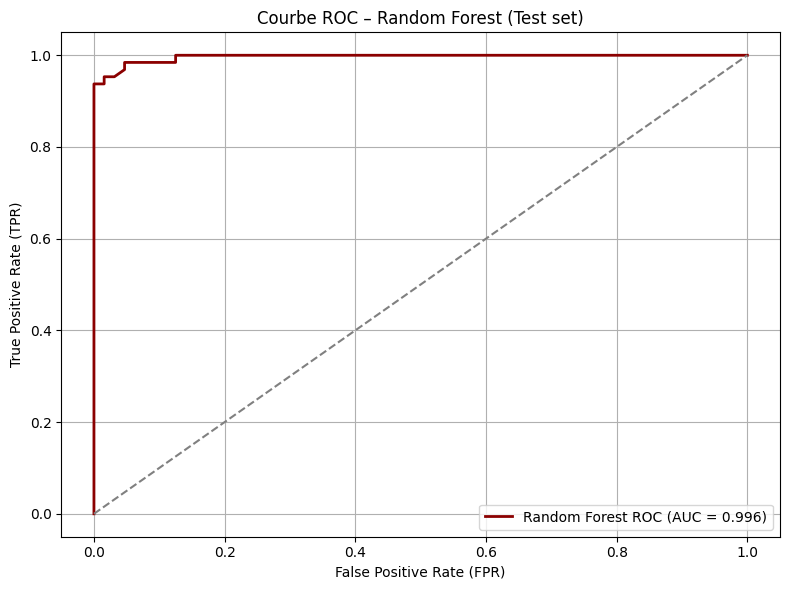

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilités pour la classe 1 (Malignant)
y_test_proba = rf.predict_proba(X_test_bal)[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test_bal, y_test_proba)
auc_rf = roc_auc_score(y_test_bal, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest ROC (AUC = {auc_rf:.3f})", color="darkred", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC – Random Forest (Test set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

knn

In [ ]:
y_pred = knn.predict(X_test_bal)
print("Accuracy:", accuracy_score(y_test_bal, y_pred))
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_bal, y_pred))

Accuracy: 0.9453125

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95        64
           1       0.98      0.91      0.94        64

    accuracy                           0.95       128
   macro avg       0.95      0.95      0.95       128
weighted avg       0.95      0.95      0.95       128


Confusion Matrix:
 [[63  1]
 [ 6 58]]


linear regression

In [ ]:
# Prédiction

y_pred_continuous = modelLR.predict(X_test_bal)
y_pred = (y_pred_continuous >= 0.5).astype(int)

# Évaluation
acc = accuracy_score(y_test_bal, y_pred)
print("Accuracy régression linéaire :", acc)
print("\nRapport de classification :\n", classification_report(y_test_bal, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test_bal, y_pred))

Accuracy régression linéaire : 0.9765625

Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        64
           1       1.00      0.95      0.98        64

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128


Matrice de confusion :
 [[64  0]
 [ 3 61]]


softmax regression


Softmax Regression Accuracy: 0.9609 → 96.09%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.97      0.95      0.96        64

    accuracy                           0.96       128
   macro avg       0.96      0.96      0.96       128
weighted avg       0.96      0.96      0.96       128



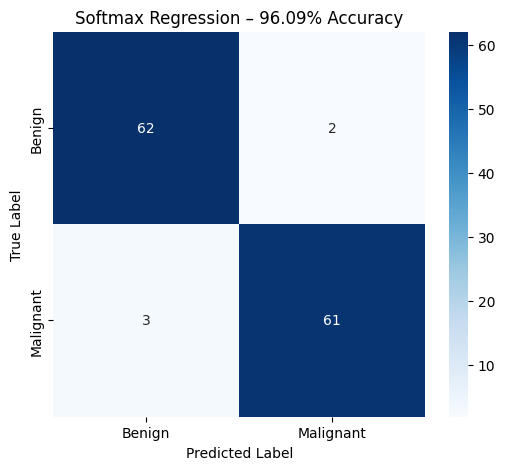

In [ ]:
y_pred = softmax_model.predict(X_test_ready)

accuracy = accuracy_score(y_test_bal, y_pred)
print(f"\nSoftmax Regression Accuracy: {accuracy:.4f} → {accuracy*100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test_bal, y_pred))

# confusion matrix
cm = confusion_matrix(y_test_bal, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title(f"Softmax Regression – {accuracy*100:.2f}% Accuracy")
plt.show()

svm

*the whole features

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("\n=== Evaluation : SVM avec TOUTES les features ===")
for k, model in svm_all_models.items():
    y_pred = model.predict(X_test_bal)
    print(f"{k} → Accuracy = {accuracy_score(y_test_bal, y_pred):.4f}")





=== Evaluation : SVM avec TOUTES les features ===
linear → Accuracy = 0.9531
rbf → Accuracy = 0.9766
poly → Accuracy = 0.8672
sigmoid → Accuracy = 0.9531


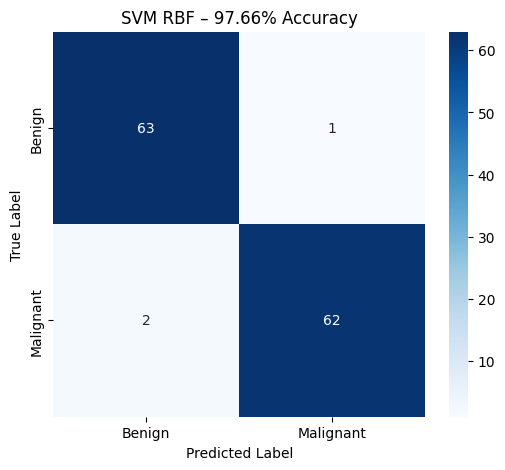


=== Détails du SVM (kernel RBF) ===
Accuracy: 0.9765625

Confusion Matrix:
 [[63  1]
 [ 2 62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        64
           1       0.98      0.97      0.98        64

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Prédiction avec le meilleur modèle SVM (ici RBF)
best_model_all = svm_all_models['rbf']
y_pred_all = best_model_all.predict(X_test_bal)

# Calcul de la confusion matrix et de l'accuracy
cm = confusion_matrix(y_test_bal, y_pred_all)
accuracy = accuracy_score(y_test_bal, y_pred_all)

# Graphique de la confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title(f"SVM RBF – {accuracy*100:.2f}% Accuracy")
plt.show()

# Rapport de classification détaillé
print("\n=== Détails du SVM (kernel RBF) ===")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_all))


*10 features

In [ ]:
print("\n=== Evaluation : SVM avec TOP 10 features ===")
for k, model in svm_top10_models.items():
    y_pred_k = model.predict(X_test_scaled)
    acc = accuracy_score(y_test_bal, y_pred_k)
    print(f"{k} → Accuracy = {acc:.4f}")


=== Evaluation : SVM avec TOP 10 features ===
linear → Accuracy = 0.9609
rbf → Accuracy = 0.9297
poly → Accuracy = 0.8906
sigmoid → Accuracy = 0.9375


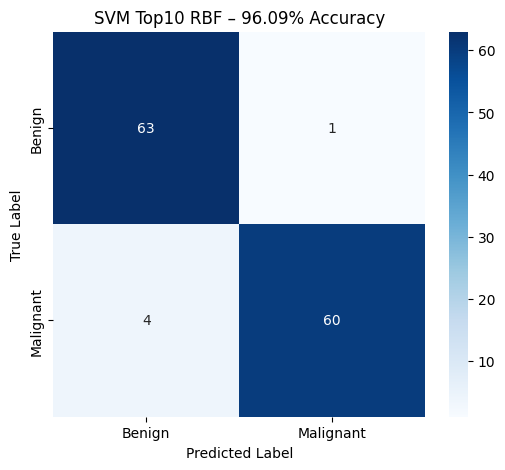


=== Détails du SVM (Top10 features, kernel RBF) ===
Accuracy: 0.9609375

Confusion Matrix:
 [[63  1]
 [ 4 60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        64
           1       0.98      0.94      0.96        64

    accuracy                           0.96       128
   macro avg       0.96      0.96      0.96       128
weighted avg       0.96      0.96      0.96       128



In [ ]:


# Prédiction avec le meilleur modèle SVM (Top10 features, kernel Linear)
best_model_top10 = svm_top10_models['linear']
y_pred_top10 = best_model_top10.predict(X_test_scaled)

# Calcul de la confusion matrix et de l'accuracy
cm_top10 = confusion_matrix(y_test_bal, y_pred_top10)
accuracy_top10 = accuracy_score(y_test_bal, y_pred_top10)

# Graphique de la confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_top10, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title(f"SVM Top10 RBF – {accuracy_top10*100:.2f}% Accuracy")
plt.show()

# Rapport de classification détaillé
print("\n=== Détails du SVM (Top10 features, kernel RBF) ===")
print("Accuracy:", accuracy_top10)
print("\nConfusion Matrix:\n", cm_top10)
print("\nClassification Report:\n", classification_report(y_test_bal, y_pred_top10))


*courbe ROC SVM

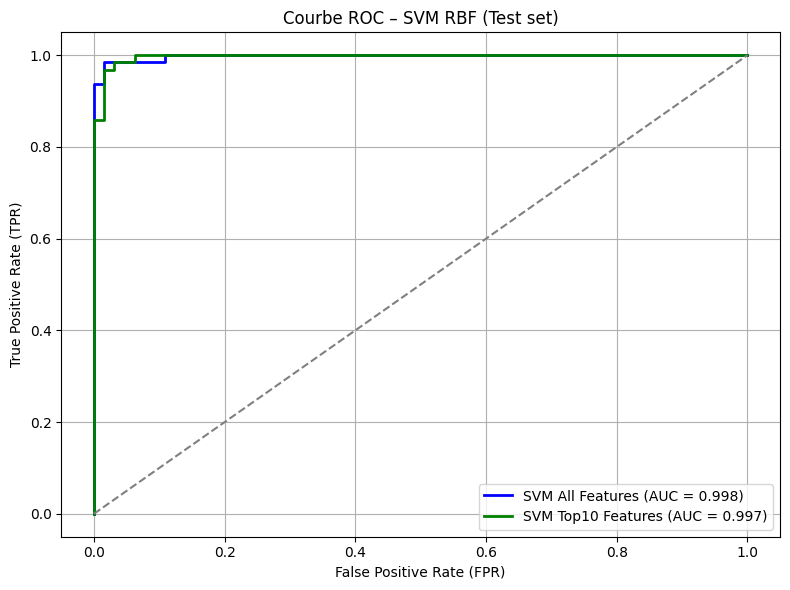

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# --- SVM avec toutes les features ---
best_model_all = svm_all_models['rbf']
# Decision scores pour la classe 1
y_scores_all = best_model_all.decision_function(X_test_bal)
fpr_all, tpr_all, _ = roc_curve(y_test_bal, y_scores_all)
auc_all = roc_auc_score(y_test_bal, y_scores_all)

# --- SVM avec Top10 features ---
best_model_top10 = svm_top10_models['rbf']
y_scores_top10 = best_model_top10.decision_function(X_test_scaled)
fpr_top10, tpr_top10, _ = roc_curve(y_test_bal, y_scores_top10)
auc_top10 = roc_auc_score(y_test_bal, y_scores_top10)

# --- Plot ROC curves ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_all, tpr_all, label=f"SVM All Features (AUC = {auc_all:.3f})", color="blue", linewidth=2)
plt.plot(fpr_top10, tpr_top10, label=f"SVM Top10 Features (AUC = {auc_top10:.3f})", color="green", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonale

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC – SVM RBF (Test set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


mlp

In [ ]:
y_pred_prob = mlp_paper.predict(X_test_bal)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

acc = accuracy_score(y_test_bal, y_pred) # Changed y_test to y_test_mlp
print(f"\nMLP Test Accuracy: {acc:.4f} → {acc*100:.3f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step 

MLP Test Accuracy: 0.9766 → 97.656%


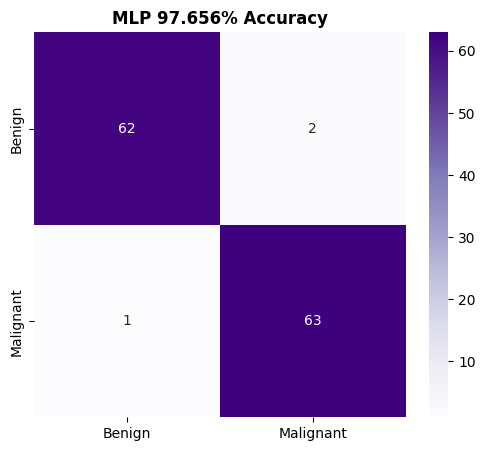

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_bal, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title(f'MLP {acc*100:.3f}% Accuracy', fontweight='bold')
plt.show()



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


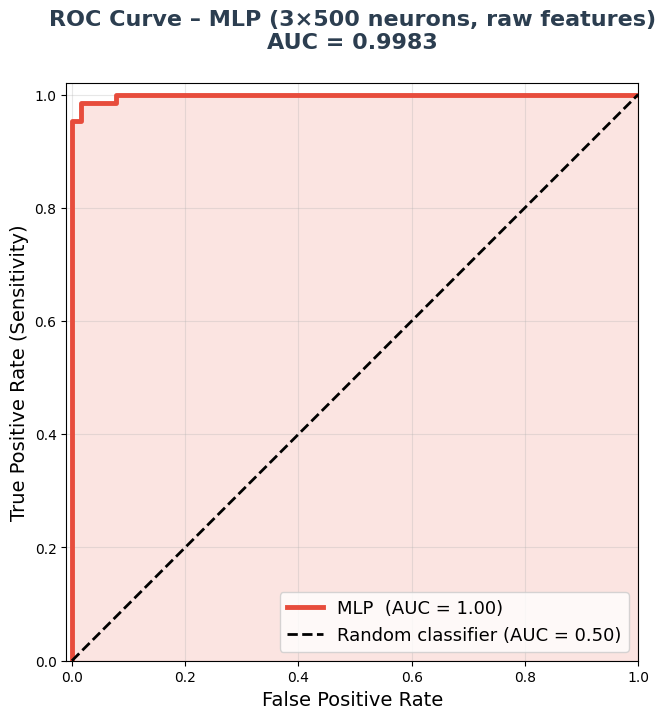

MLP  AUC = 0.9983


In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get probability scores from the MLP
y_prob_mlp = mlp_paper.predict(X_test_bal).flatten()

fpr, tpr, thresholds = roc_curve(y_test_bal, y_prob_mlp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8.5, 7.5))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                estimator_name='MLP ').plot(ax=plt.gca(), lw=3.5, color='#e74c3c')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random classifier (AUC = 0.50)')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('ROC Curve – MLP (3×500 neurons, raw features)\nAUC = {:.4f}'.format(roc_auc),
          fontsize=16, fontweight='bold', pad=25, color='#2c3e50')
plt.legend(loc="lower right", fontsize=13)
plt.grid(True, alpha=0.3)
plt.fill_between(fpr, tpr, alpha=0.15, color='#e74c3c')
plt.show()

print(f"MLP  AUC = {roc_auc:.4f}")

gru-svm

In [ ]:
y_pred = svm_gru.predict(X_test_features)
acc = accuracy_score(y_test_bal, y_pred)

print(f"\nGRU-SVM FINAL RESULT")
print(f"Test Accuracy : {acc:.4f} → {acc*100:.2f}%")


GRU-SVM FINAL RESULT
Test Accuracy : 0.9453 → 94.53%


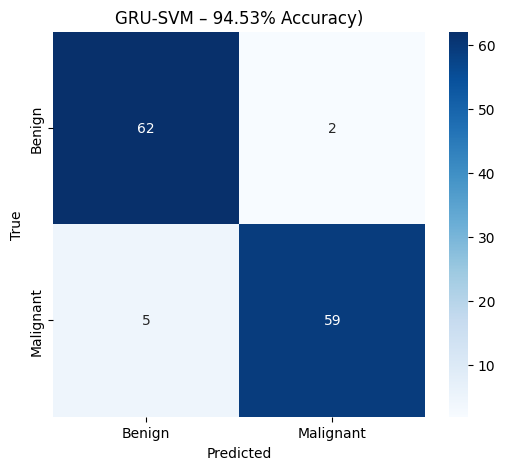

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test_bal, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title(f'GRU-SVM – {acc*100:.2f}% Accuracy)')
plt.ylabel('True'), plt.xlabel('Predicted')
plt.show()

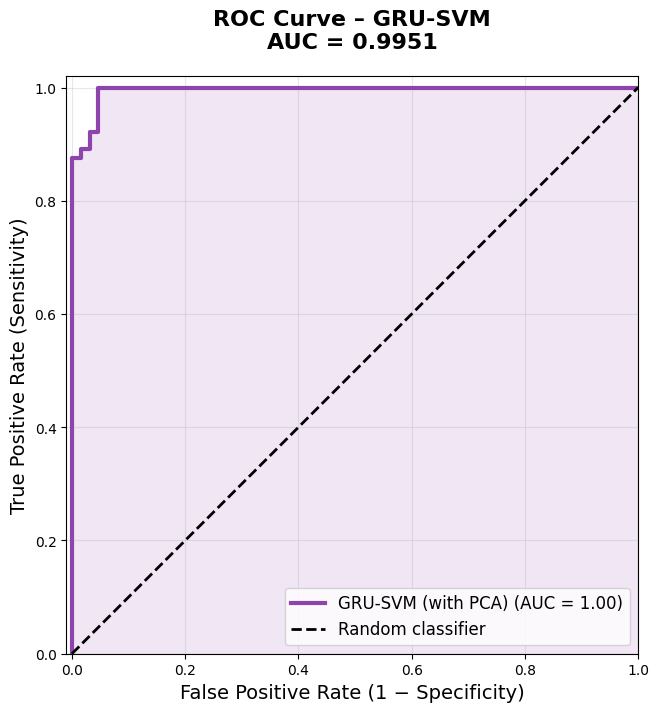

GRU-SVM AUC on test set = 0.9951


In [ ]:
# ROC Curve GRU-SVM (with PCA features)
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

y_score = svm_gru.decision_function(X_test_features)

fpr, tpr, thresholds = roc_curve(y_test_bal, y_score)
roc_auc = auc(fpr, tpr)

# Plot – publication quality
plt.figure(figsize=(8.5, 7.5))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                estimator_name='GRU-SVM (with PCA)').plot(ax=plt.gca(), lw=3, color='#8e44ad')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate (1 − Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('ROC Curve – GRU-SVM\nAUC = {:.4f}'.format(roc_auc), fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.fill_between(fpr, tpr, alpha=0.15, color='#9b59b6')
plt.show()

print(f"GRU-SVM AUC on test set = {roc_auc:.4f}")

Comparaison of all models with Roc curve


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


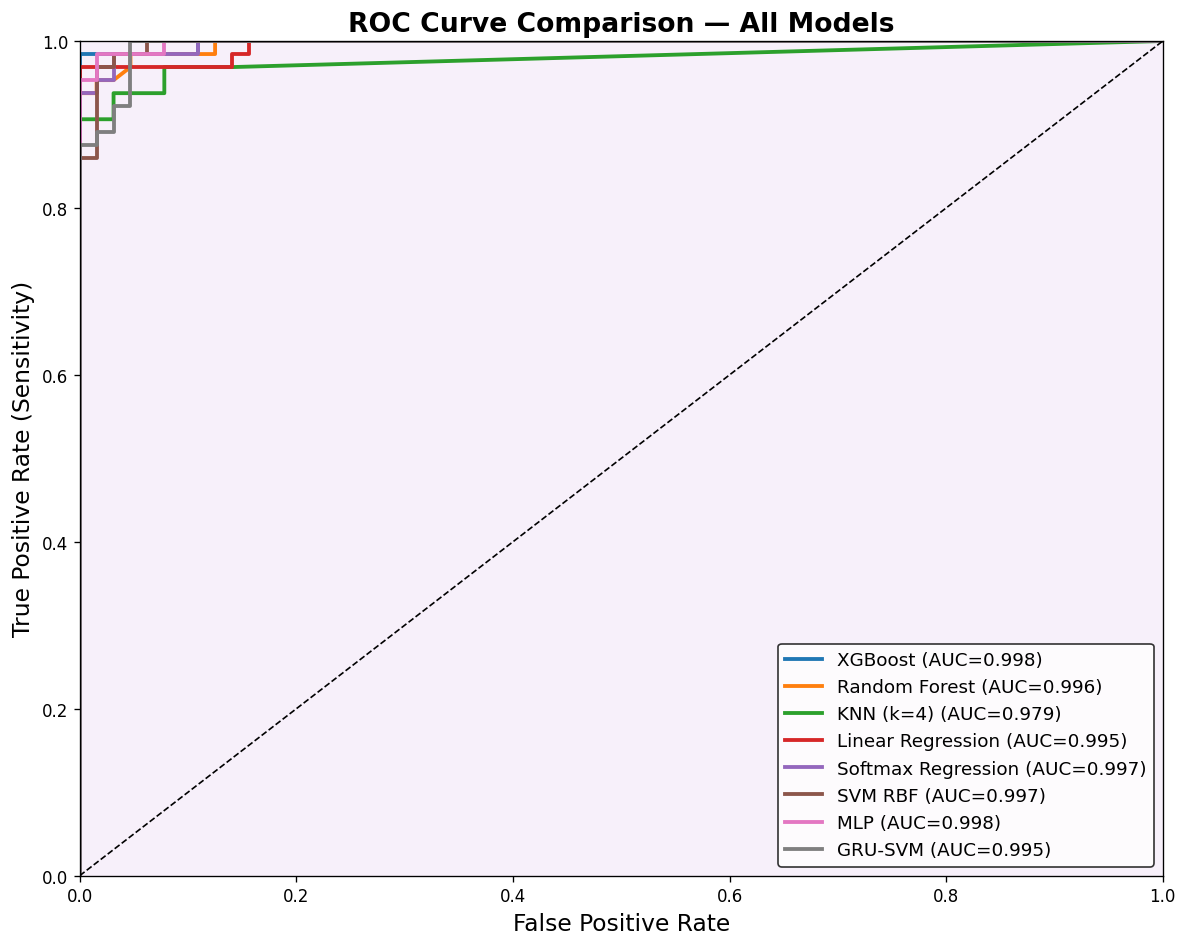

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# 1. COLLECT MODEL PROBABILITY SCORES

# XGBoost (tuned)
xgb_best = rnd_search_xgb.best_estimator_
y_prob_xgb = xgb_best.predict_proba(X_test_bal)[:, 1]

# Balanced Random Forest
y_prob_rf = rf.predict_proba(X_test_bal)[:, 1]

# KNN k = 4
y_prob_knn = knn.predict_proba(X_test_bal)[:, 1]

# Linear Regression
y_prob_lr = modelLR.predict(X_test_bal)

# Softmax Regression (Logistic Regression + PCA)
y_prob_soft = softmax_model.predict_proba(X_test_ready)[:, 1]

# SVM RBF (probability enabled)
svm_rbf = SVC(kernel='rbf', C=1, probability=True)
svm_rbf.fit(X_train_scaled, y_train_bal)
y_prob_svm = svm_rbf.predict_proba(X_test_scaled)[:, 1]

# MLP
y_prob_mlp = mlp_paper.predict(X_test_bal).flatten()

# GRU-SVM
svm_gru = SVC(kernel='rbf', C=5.0, probability=True)
svm_gru.fit(X_train_features, y_train_bal)
y_prob_gru = svm_gru.predict_proba(X_test_features)[:, 1]


# 2. DICTIONARY OF ALL MODELS FOR LOOPING

roc_models = {
    "XGBoost": y_prob_xgb,
    "Random Forest": y_prob_rf,
    "KNN (k=4)": y_prob_knn,
    "Linear Regression": y_prob_lr,
    "Softmax Regression": y_prob_soft,
    "SVM RBF": y_prob_svm,
    "MLP": y_prob_mlp,
    "GRU-SVM": y_prob_gru
}


# 3. FINAL CLEAN ROC CURVE (LIKE YOUR GOOD EXAMPLE)

plt.figure(figsize=(10, 8), dpi=120)

# Soft clean background
plt.gca().set_facecolor('#f7f0fa')  # pale lavender style

# Plot ROC curves
for name, y_prob in roc_models.items():
    fpr, tpr, _ = roc_curve(y_test_bal, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr, tpr,
        linewidth=2.3,
        label=f"{name} (AUC={roc_auc:.3f})"
    )

# Random baseline
plt.plot([0, 1], [0, 1], "--", color="black", linewidth=1)

# Labels and title
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=14)
plt.title("ROC Curve Comparison — All Models", fontsize=16, fontweight="bold")

# Legend clean + readable
plt.legend(
    loc="lower right",
    fontsize=11,
    frameon=True,
    facecolor="white",
    edgecolor="black"
)

# Full (no zoom)
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# DICTIONARY TO STORE RESULTS

results = {}
conf_matrices = {}

# XGBOOST

xgb_best = rnd_search_xgb.best_estimator_
y_prob_xgb = xgb_best.predict_proba(X_test_bal)[:, 1]
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)

results["XGBoost"] = [
    accuracy_score(y_test_bal, y_pred_xgb),
    precision_score(y_test_bal, y_pred_xgb),
    recall_score(y_test_bal, y_pred_xgb),
    f1_score(y_test_bal, y_pred_xgb),
    roc_auc_score(y_test_bal, y_prob_xgb)
]

conf_matrices["XGBoost"] = confusion_matrix(y_test_bal, y_pred_xgb)

# BALANCED RANDOM FOREST

y_prob_rf = rf.predict_proba(X_test_bal)[:, 1]
y_pred_rf = rf.predict(X_test_bal)

results["Random forest"] = [
    accuracy_score(y_test_bal, y_pred_rf),
    precision_score(y_test_bal, y_pred_rf),
    recall_score(y_test_bal, y_pred_rf),
    f1_score(y_test_bal, y_pred_rf),
    roc_auc_score(y_test_bal, y_prob_rf)
]

conf_matrices["Random forest"] = confusion_matrix(y_test_bal, y_pred_rf)


# KNN (k=4)

y_prob_knn = knn.predict_proba(X_test_bal)[:, 1]
y_pred_knn = knn.predict(X_test_bal)

results["KNN (k=4)"] = [
    accuracy_score(y_test_bal, y_pred_knn),
    precision_score(y_test_bal, y_pred_knn),
    recall_score(y_test_bal, y_pred_knn),
    f1_score(y_test_bal, y_pred_knn),
    roc_auc_score(y_test_bal, y_prob_knn)
]

conf_matrices["KNN (k=4)"] = confusion_matrix(y_test_bal, y_pred_knn)


# LINEAR REGRESSION

y_prob_lr = modelLR.predict(X_test_bal)
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

results["Linear Regression"] = [
    accuracy_score(y_test_bal, y_pred_lr),
    precision_score(y_test_bal, y_pred_lr),
    recall_score(y_test_bal, y_pred_lr),
    f1_score(y_test_bal, y_pred_lr),
    roc_auc_score(y_test_bal, y_prob_lr)
]

conf_matrices["Linear Regression"] = confusion_matrix(y_test_bal, y_pred_lr)


# SOFTMAX REGRESSION (LOGISTIC WITH PCA)

y_prob_soft = softmax_model.predict_proba(X_test_ready)[:, 1]
y_pred_soft = (y_prob_soft >= 0.5).astype(int)

results["Softmax Regression"] = [
    accuracy_score(y_test_bal, y_pred_soft),
    precision_score(y_test_bal, y_pred_soft),
    recall_score(y_test_bal, y_pred_soft),
    f1_score(y_test_bal, y_pred_soft),
    roc_auc_score(y_test_bal, y_prob_soft)
]

conf_matrices["Softmax Regression"] = confusion_matrix(y_test_bal, y_pred_soft)


# SVM (RBF)

svm_rbf = SVC(kernel='rbf', C=1, probability=True)
svm_rbf.fit(X_train_scaled, y_train_bal)

y_prob_svm = svm_rbf.predict_proba(X_test_scaled)[:, 1]
y_pred_svm = svm_rbf.predict(X_test_scaled)

results["SVM (RBF)"] = [
    accuracy_score(y_test_bal, y_pred_svm),
    precision_score(y_test_bal, y_pred_svm),
    recall_score(y_test_bal, y_pred_svm),
    f1_score(y_test_bal, y_pred_svm),
    roc_auc_score(y_test_bal, y_prob_svm)
]

conf_matrices["SVM (RBF)"] = confusion_matrix(y_test_bal, y_pred_svm)


# MLP

y_prob_mlp = mlp_paper.predict(X_test_bal).flatten()
y_pred_mlp = (y_prob_mlp >= 0.5).astype(int)

results["MLP"] = [
    accuracy_score(y_test_bal, y_pred_mlp),
    precision_score(y_test_bal, y_pred_mlp),
    recall_score(y_test_bal, y_pred_mlp),
    f1_score(y_test_bal, y_pred_mlp),
    roc_auc_score(y_test_bal, y_prob_mlp)
]

conf_matrices["MLP"] = confusion_matrix(y_test_bal, y_pred_mlp)


# GRU-SVM

svm_gru = SVC(kernel='rbf', C=5.0, probability=True)
svm_gru.fit(X_train_features, y_train_bal)

y_prob_gru = svm_gru.predict_proba(X_test_features)[:, 1]
y_pred_gru = svm_gru.predict(X_test_features)

results["GRU-SVM"] = [
    accuracy_score(y_test_bal, y_pred_gru),
    precision_score(y_test_bal, y_pred_gru),
    recall_score(y_test_bal, y_pred_gru),
    f1_score(y_test_bal, y_pred_gru),
    roc_auc_score(y_test_bal, y_prob_gru)
]

conf_matrices["GRU-SVM"] = confusion_matrix(y_test_bal, y_pred_gru)


# FINAL COMPARISON TABLE

df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-score", "AUC"]).T
print("\n=== FINAL MODEL COMPARISON TABLE ===\n")
print(df_results)


# SHOW CONFUSION MATRICES

print("\n=== CONFUSION MATRICES ===\n")
for model_name, cm in conf_matrices.items():
    print(f"\n{model_name}:\n{cm}\n")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

=== FINAL MODEL COMPARISON TABLE ===

                    Accuracy  Precision    Recall  F1-score       AUC
XGBoost             0.968750   1.000000  0.937500  0.967742  0.998291
Random forest       0.968750   0.983871  0.953125  0.968254  0.996460
KNN (k=4)           0.945312   0.983051  0.906250  0.943089  0.978760
Linear Regression   0.976562   1.000000  0.953125  0.976000  0.995361
Softmax Regression  0.960938   0.968254  0.953125  0.960630  0.997070
SVM (RBF)           0.929688   0.982456  0.875000  0.925620  0.996826
MLP                 0.976562   0.969231  0.984375  0.976744  0.998291
GRU-SVM             0.945312   0.967213  0.921875  0.944000  0.995117

=== CONFUSION MATRICES ===


XGBoost:
[[64  0]
 [ 4 60]]


Random forest:
[[63  1]
 [ 3 61]]


KNN (k=4):
[[63  1]
 [ 6 58]]


Linear Regression:
[[64  0]
 [ 3 61]]


Softmax Regression:
[[62  2]
 [ 3 61]]


SVM (RBF):
[[63  1]
 [ 8 56]]


MLP:
[[62  2]
 [ 1 63]]


GRU-SVM:
[[62  2]
 [ 5 59]

##V.2. DSO2 : Cluster diagnosis patterns (types of cancers)

In [ ]:
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score,
    homogeneity_score, completeness_score, v_measure_score
)

def evaluate_clustering(X, labels):
    results = {}

    # Internal metrics
    results["silhouette"] = silhouette_score(X, labels)
    results["davies_bouldin"] = davies_bouldin_score(X, labels)
    results["calinski_harabasz"] = calinski_harabasz_score(X, labels)


    return results


In [ ]:
results_kmeans_3 = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_kmeans_cancer_3"]
)
print("Évaluation KMeans k=3 :")
print(results_kmeans_3)


Évaluation KMeans k=3 :
{'silhouette': np.float64(0.21868320395349716), 'davies_bouldin': np.float64(1.536041600853445), 'calinski_harabasz': np.float64(17.5139969952865)}


In [ ]:
results_agg = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_agg_3"]
)
print("Évaluation Agglomératif :")
print(results_agg)


Évaluation Agglomératif :
{'silhouette': np.float64(0.16333552353660807), 'davies_bouldin': np.float64(1.4241494410103923), 'calinski_harabasz': np.float64(15.335836102104611)}


In [ ]:
results_gmm = evaluate_clustering(
    X_cancer_scaled,
    df_cancer["cluster_gmm"]
)
print("Évaluation GMM :")
print(results_gmm)


Évaluation GMM :
{'silhouette': np.float64(0.16794200374270676), 'davies_bouldin': np.float64(1.6872830445113796), 'calinski_harabasz': np.float64(12.035539400172546)}


##V.3. DSO3 : Recommandation system

In [ ]:
recsys = HybridMetabolicRecommendationSystem(
    baseline_stats=baseline_stats,
    cluster_strategies=cluster_strategies,
    biological_meaning=biological_meaning,
    kmeans_model=kmeans_cancer_3,
    scaler=scaler_cancer,
)


✓ Recommendation system initialized
  Baseline stats loaded for 9 features
  Knowledge base contains 4 cluster strategies


In [ ]:
import pandas as pd

single_patient = pd.Series({
    'Age': 55,
    'BMI': 28,
    'Glucose': 120,
    'Insulin': 25,
    'HOMA': 7,
    'Leptin': 15,
    'Adiponectin': 8,
    'Resistin': 10,
    'MCP.1': 3
})

# Define cancer status for this patient
is_cancer = False  # or False if healthy

# Generate recommendations
result = recsys.generate_recommendations(single_patient, is_cancer=is_cancer)

# View main output
print("Patient Profile:")
print(result['patient_profile'])

print("\nPriority Interventions:")
for r in result['recommendations']['priority_interventions']:
    print("-", r)

print("\nFeature Explanations:")
for e in result['explanations']:
    print("-", e)


Patient Profile:
{'cluster': 3, 'cluster_name': 'Healthy Reference Group', 'severity_score': 1.2222222222222223, 'cancer_status': 'Healthy', 'interpretation': 'High Risk/Urgent Intervention'}

Priority Interventions:
- Regular exercise per CDC guidelines (150min/week moderate intensity)
- Continue current healthy lifestyle habits
- Insulin-sensitizing drugs may reduce cancer risk and progression
- Annual breast cancer screening per guidelines (mammography)
- Target glycemic control to reduce cancer progression risk
- Lifestyle modification and metformin can improve insulin sensitivity
- Maintain healthy weight (BMI 18.5-24.9)
- Reduced inflammatory signaling; favorable
- Annual metabolic screening to detect early changes

Feature Explanations:
- Patient assigned to 'Healthy Reference Group' based on metabolic profile. Primary strategy: Patients without breast cancer diagnosis. Metabolic parameters within normal range....
- Glucose: 120.00 (Severe, 3.12σ elevated) - Hyperglycemia fuels 

#VI. Deployment